# BHANU PRATAP REDDY - CAPSTONE PROJECT - HEALTHCARE

## Table of Contents
1. [Library Imports and QoL Settings](#Library)
2. [Data Dictionary](#Data-Dictionary)
3. [Data Loading](#Data-Loading)
4. [Data Summary and Preprocessing](#Data-Summary-and-Preprocessing)
    - [Summary](#Summary)
    - [Univariate Analysis](#Univariate-Analysis)
    - [Null Value Treatment](#Null-Value-Treatment)
    - [Outlier Treatment](#Outlier-Treatment)
    - [Variable Creation](#Variable-Creation)<br><br>

5. [Exploratory Data Analysis](#Exploratory-Data-Analysis)

6. [Clustering](#Clustering)

7. [Model Building](#Model-Building)
    - [Finding VIF](#Finding-VIF)
    - [Scaling](#Scaling)
    - [Train Test Split](#Train-Test-Split)
    - [Linear Regression](#Linear-Regression)
    - [Polynomial regression](#Polynomial-regression)
    - [Decision tree Regression](#Decision-tree-Regression)
    - [XG Boost](#XG-Boost)<br><br>
    
8. [Ensemble Models](#Ensemble-Models)
    - [Random Forest](#Random-Forest)
    - [Gradient Boosting](#Gradient-Boosting)
    - [Ada Boost](#Ada-Boost)
    - [Bagging Regressor](#Bagging-Regressor)<br><br>


## Library Imports and QoL Settings
<a id='Library'></a>

In [1]:
#Importing all necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pnx
import scipy.stats as stats

# For checking errors
from sklearn import metrics

#For Scaling the dataset
from sklearn.preprocessing import scale

#For EDA
from sci_analysis import analyze

#Univariate Analysis
from scipy.stats import skew, kurtosis, shapiro

#Imputation
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

#Train -  Test Split
from sklearn.model_selection import train_test_split

#Scaler
from sklearn.preprocessing import StandardScaler

#AUC and Confusion Matrix
from sklearn.metrics import roc_auc_score,roc_curve,classification_report

#Librares for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from scipy.stats import t

#Librares for polunomial Regression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

#XG Boost Regressor
from xgboost import XGBRegressor

#Clustering
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

#Ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

#Oversampling/Undersampling
from imblearn.over_sampling import SMOTE

# Declaring this to show graphs after inline command instead of plt.show() after every instance of plotting
%matplotlib inline

#Set the max number of rows in output cell to 30
pd.options.display.max_rows = 100


#Ignore unnecessary warnings
from warnings import filterwarnings
filterwarnings("ignore")

## Data Dictionary
<a id='Data-Dictionary'></a>

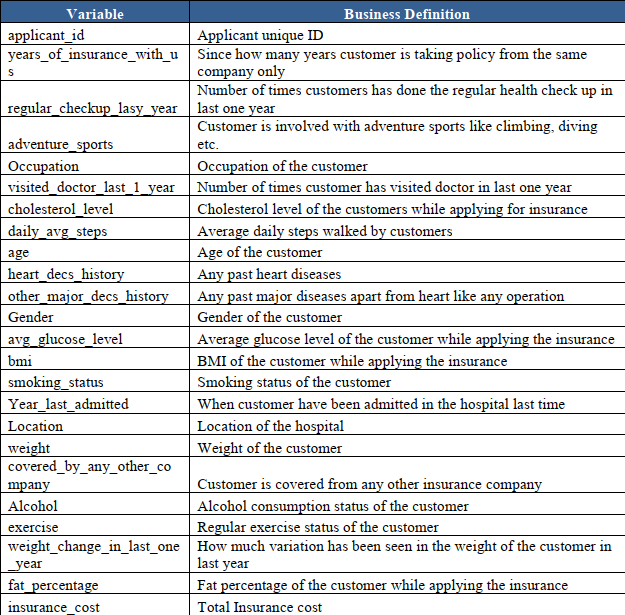

## Data Loading
<a id='Data-Loading'></a>

In [2]:
health_df = pd.read_csv("D:/Visual Studio Projects/Python/Great Learning Data Science/Projects/Capstone/Data.csv")
health_df.head()

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,...,smoking_status,Year_last_admitted,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,5000,3,1,1,Salried,2,125 to 150,4866,28,1,...,Unknown,NaN,Chennai,67,N,Rare,Moderate,1,25,20978
1,5001,0,0,0,Student,4,150 to 175,6411,50,0,...,formerly smoked,NaN,Jaipur,58,N,Rare,Moderate,3,27,6170
2,5002,1,0,0,Business,4,200 to 225,4509,68,0,...,formerly smoked,NaN,Jaipur,73,N,Daily,Extreme,0,32,28382
3,5003,7,4,0,Business,2,175 to 200,6214,51,0,...,Unknown,NaN,Chennai,71,Y,Rare,No,3,37,27148
4,5004,3,1,0,Student,2,150 to 175,4938,44,0,...,never smoked,2004.0,Bangalore,74,N,No,Extreme,0,34,29616


## Data Summary and Preprocessing
<a id='Data-Summary-and-Preprocessing'></a>

### Summary
<a id='Summary'></a>

In [3]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   applicant_id                    25000 non-null  int64  
 1   years_of_insurance_with_us      25000 non-null  int64  
 2   regular_checkup_lasy_year       25000 non-null  int64  
 3   adventure_sports                25000 non-null  int64  
 4   Occupation                      25000 non-null  object 
 5   visited_doctor_last_1_year      25000 non-null  int64  
 6   cholesterol_level               25000 non-null  object 
 7   daily_avg_steps                 25000 non-null  int64  
 8   age                             25000 non-null  int64  
 9   heart_decs_history              25000 non-null  int64  
 10  other_major_decs_history        25000 non-null  int64  
 11  Gender                          25000 non-null  object 
 12  avg_glucose_level               

In [4]:
health_df = health_df.rename(columns={'regular_checkup_lasy_year': 'regular_checkup_last_year'})

In [5]:
health_df.isnull().sum()

applicant_id                          0
years_of_insurance_with_us            0
regular_checkup_last_year             0
adventure_sports                      0
Occupation                            0
visited_doctor_last_1_year            0
cholesterol_level                     0
daily_avg_steps                       0
age                                   0
heart_decs_history                    0
other_major_decs_history              0
Gender                                0
avg_glucose_level                     0
bmi                                 990
smoking_status                        0
Year_last_admitted                11881
Location                              0
weight                                0
covered_by_any_other_company          0
Alcohol                               0
exercise                              0
weight_change_in_last_one_year        0
fat_percentage                        0
insurance_cost                        0
dtype: int64

In [6]:
#Percentage null in each col.
round((health_df.isnull().sum()/len(health_df))*100,2)

applicant_id                       0.00
years_of_insurance_with_us         0.00
regular_checkup_last_year          0.00
adventure_sports                   0.00
Occupation                         0.00
visited_doctor_last_1_year         0.00
cholesterol_level                  0.00
daily_avg_steps                    0.00
age                                0.00
heart_decs_history                 0.00
other_major_decs_history           0.00
Gender                             0.00
avg_glucose_level                  0.00
bmi                                3.96
smoking_status                     0.00
Year_last_admitted                47.52
Location                           0.00
weight                             0.00
covered_by_any_other_company       0.00
Alcohol                            0.00
exercise                           0.00
weight_change_in_last_one_year     0.00
fat_percentage                     0.00
insurance_cost                     0.00
dtype: float64

In [7]:
health_df.duplicated().sum()

0

In [8]:
health_df.drop("Year_last_admitted", axis=1,inplace=True)
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   applicant_id                    25000 non-null  int64  
 1   years_of_insurance_with_us      25000 non-null  int64  
 2   regular_checkup_last_year       25000 non-null  int64  
 3   adventure_sports                25000 non-null  int64  
 4   Occupation                      25000 non-null  object 
 5   visited_doctor_last_1_year      25000 non-null  int64  
 6   cholesterol_level               25000 non-null  object 
 7   daily_avg_steps                 25000 non-null  int64  
 8   age                             25000 non-null  int64  
 9   heart_decs_history              25000 non-null  int64  
 10  other_major_decs_history        25000 non-null  int64  
 11  Gender                          25000 non-null  object 
 12  avg_glucose_level               

In [9]:
health_df.drop("applicant_id", axis=1,inplace=True)
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_of_insurance_with_us      25000 non-null  int64  
 1   regular_checkup_last_year       25000 non-null  int64  
 2   adventure_sports                25000 non-null  int64  
 3   Occupation                      25000 non-null  object 
 4   visited_doctor_last_1_year      25000 non-null  int64  
 5   cholesterol_level               25000 non-null  object 
 6   daily_avg_steps                 25000 non-null  int64  
 7   age                             25000 non-null  int64  
 8   heart_decs_history              25000 non-null  int64  
 9   other_major_decs_history        25000 non-null  int64  
 10  Gender                          25000 non-null  object 
 11  avg_glucose_level               25000 non-null  int64  
 12  bmi                             

In [10]:
health_df.isin([0]).sum()

years_of_insurance_with_us         2912
regular_checkup_last_year         15215
adventure_sports                  22957
Occupation                            0
visited_doctor_last_1_year            1
cholesterol_level                     0
daily_avg_steps                       0
age                                   0
heart_decs_history                23634
other_major_decs_history          22546
Gender                                0
avg_glucose_level                     0
bmi                                   0
smoking_status                        0
Location                              0
weight                                0
covered_by_any_other_company          0
Alcohol                               0
exercise                              0
weight_change_in_last_one_year     4012
fat_percentage                        0
insurance_cost                        0
dtype: int64

In [11]:
health_df['adventure_sports'] = np.where(health_df['adventure_sports'] == 1, 'Yes', 'No')
health_df['heart_decs_history'] = np.where(health_df['heart_decs_history'] == 1, 'Yes', 'No')
health_df['other_major_decs_history'] = np.where(health_df['other_major_decs_history'] == 1, 'Yes', 'No')

In [12]:
cat=[]
num=[]
for i in health_df.columns:
    if ((health_df[i].dtype=="int64") or (health_df[i].dtype=="float64")):
        num.append(i)
    else:
        cat.append(i)
print(cat) 
print(num)

['adventure_sports', 'Occupation', 'cholesterol_level', 'heart_decs_history', 'other_major_decs_history', 'Gender', 'smoking_status', 'Location', 'covered_by_any_other_company', 'Alcohol', 'exercise']
['years_of_insurance_with_us', 'regular_checkup_last_year', 'visited_doctor_last_1_year', 'daily_avg_steps', 'age', 'avg_glucose_level', 'bmi', 'weight', 'weight_change_in_last_one_year', 'fat_percentage', 'insurance_cost']


In [13]:
for col in cat:
    print('\n')
    print(health_df[col].value_counts())



No     22957
Yes     2043
Name: adventure_sports, dtype: int64


Student     10169
Business    10020
Salried      4811
Name: Occupation, dtype: int64


150 to 175    8763
125 to 150    8339
200 to 225    2963
175 to 200    2881
225 to 250    2054
Name: cholesterol_level, dtype: int64


No     23634
Yes     1366
Name: heart_decs_history, dtype: int64


No     22546
Yes     2454
Name: other_major_decs_history, dtype: int64


Male      16422
Female     8578
Name: Gender, dtype: int64


never smoked       9249
Unknown            7555
formerly smoked    4329
smokes             3867
Name: smoking_status, dtype: int64


Bangalore      1742
Jaipur         1706
Bhubaneswar    1704
Mangalore      1697
Delhi          1680
Ahmedabad      1677
Guwahati       1672
Chennai        1669
Kanpur         1664
Nagpur         1663
Mumbai         1658
Lucknow        1637
Pune           1622
Kolkata        1620
Surat          1589
Name: Location, dtype: int64


N    17418
Y     7582
Name: covered_by_any_oth

In [14]:
num.pop(-1)
num

['years_of_insurance_with_us',
 'regular_checkup_last_year',
 'visited_doctor_last_1_year',
 'daily_avg_steps',
 'age',
 'avg_glucose_level',
 'bmi',
 'weight',
 'weight_change_in_last_one_year',
 'fat_percentage']

In [15]:
X = pd.DataFrame(health_df,columns=num)
X.head()

,years_of_insurance_with_us,regular_checkup_last_year,visited_doctor_last_1_year,daily_avg_steps,age,avg_glucose_level,bmi,weight,weight_change_in_last_one_year,fat_percentage
0,3,1,2,4866,28,97,31.2,67,1,25
1,0,0,4,6411,50,212,34.2,58,3,27
2,1,0,4,4509,68,166,40.4,73,0,32
3,7,4,2,6214,51,109,22.9,71,3,37
4,3,1,2,4938,44,118,26.5,74,0,34


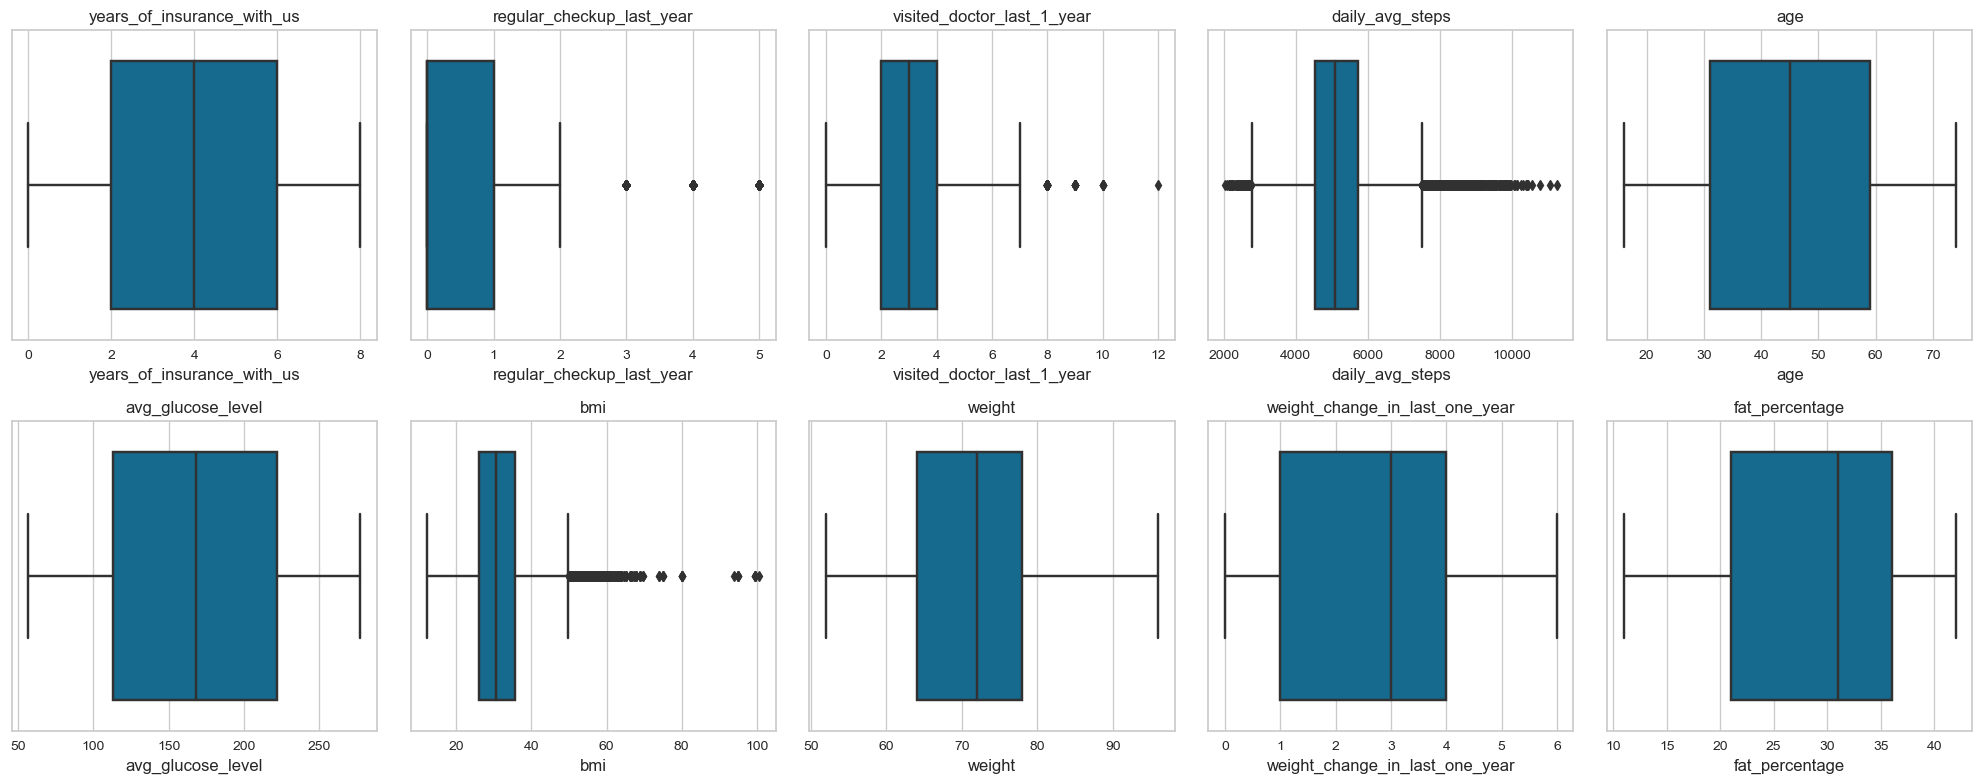

In [16]:
# columns to plot
columns_to_plot = num

# create subplots
fig, axes = plt.subplots(nrows=2, ncols=int(len(columns_to_plot)/2), figsize=(20,8))

# plot box plots for each column
for i, col in enumerate(columns_to_plot):
    if i < 5:
        sns.boxplot(x=health_df[col], ax=axes[0,i])
        axes[0,i].set_title(col)
    else:
        sns.boxplot(x=health_df[col], ax=axes[1,i-5])
        axes[1,i-5].set_title(col)


plt.tight_layout()
plt.show()

In [17]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3-Q1
lower_lim = Q1 - (1.5 * IQR)
upper_lim = Q3 + (1.5 * IQR)

In [18]:
#Outliers in Numerical Data
((X > upper_lim) | (X < lower_lim)).sum()

years_of_insurance_with_us           0
regular_checkup_last_year         2943
visited_doctor_last_1_year          96
daily_avg_steps                    952
age                                  0
avg_glucose_level                    0
bmi                                549
weight                               0
weight_change_in_last_one_year       0
fat_percentage                       0
dtype: int64

In [19]:
#Outliers as a percentage in Numerical data
round((((X > upper_lim) | (X < lower_lim)).sum()/len(X))*100,2)

years_of_insurance_with_us         0.00
regular_checkup_last_year         11.77
visited_doctor_last_1_year         0.38
daily_avg_steps                    3.81
age                                0.00
avg_glucose_level                  0.00
bmi                                2.20
weight                             0.00
weight_change_in_last_one_year     0.00
fat_percentage                     0.00
dtype: float64

### Univariate Analysis
<a id='Univariate-Analysis'></a>


Distribution of adventure_sports



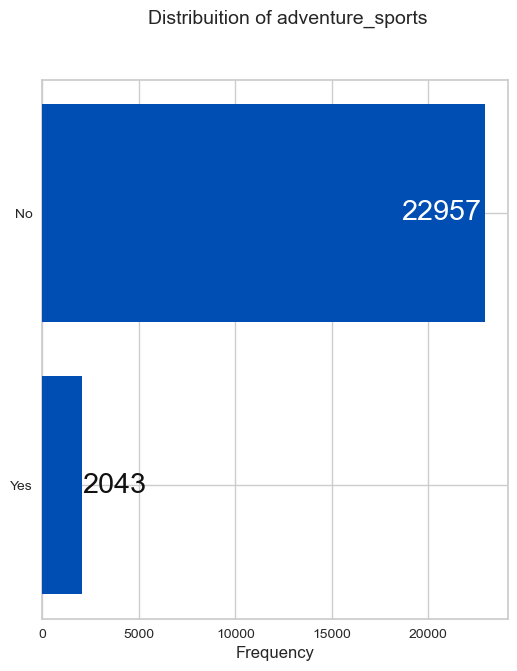



Overall Statistics
------------------

Total            =  25000
Number of Groups =  2


Statistics
----------

Rank          Frequency     Percent       Category      
--------------------------------------------------------
1             22957          91.8280      No            
2             2043           8.1720       Yes           

Distribution of Occupation



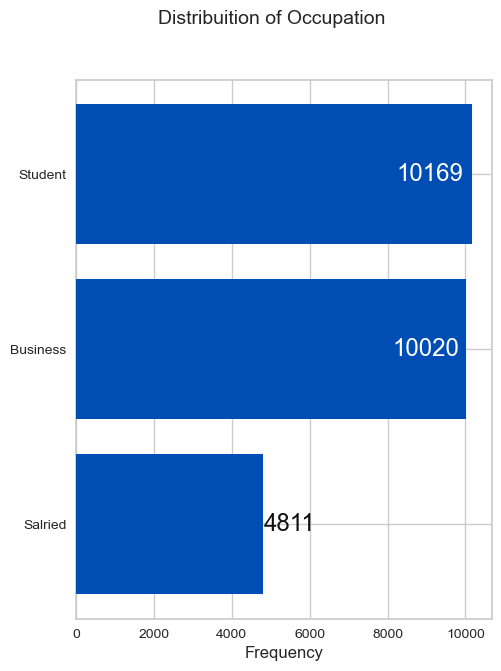



Overall Statistics
------------------

Total            =  25000
Number of Groups =  3


Statistics
----------

Rank          Frequency     Percent       Category      
--------------------------------------------------------
1             10169          40.6760      Student       
2             10020          40.0800      Business      
3             4811           19.2440      Salried       

Distribution of cholesterol_level



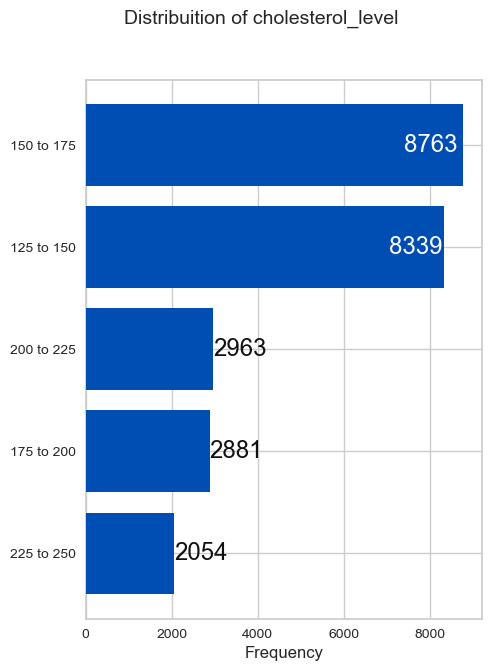



Overall Statistics
------------------

Total            =  25000
Number of Groups =  5


Statistics
----------

Rank          Frequency     Percent       Category      
--------------------------------------------------------
1             8763           35.0520      150 to 175    
2             8339           33.3560      125 to 150    
3             2963           11.8520      200 to 225    
4             2881           11.5240      175 to 200    
5             2054           8.2160       225 to 250    

Distribution of heart_decs_history



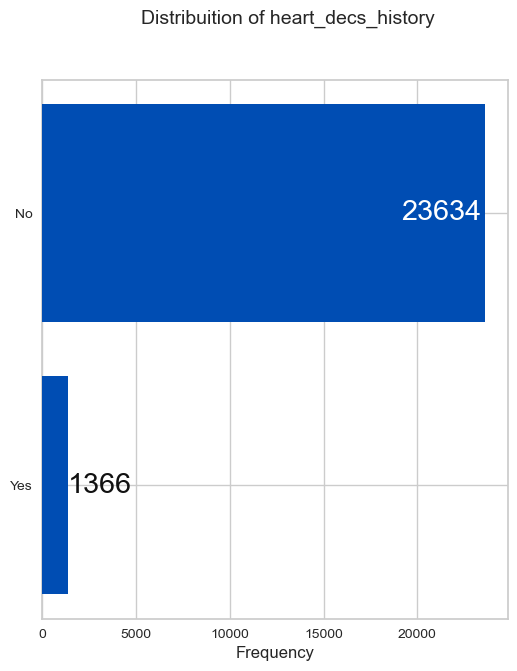



Overall Statistics
------------------

Total            =  25000
Number of Groups =  2


Statistics
----------

Rank          Frequency     Percent       Category      
--------------------------------------------------------
1             23634          94.5360      No            
2             1366           5.4640       Yes           

Distribution of other_major_decs_history



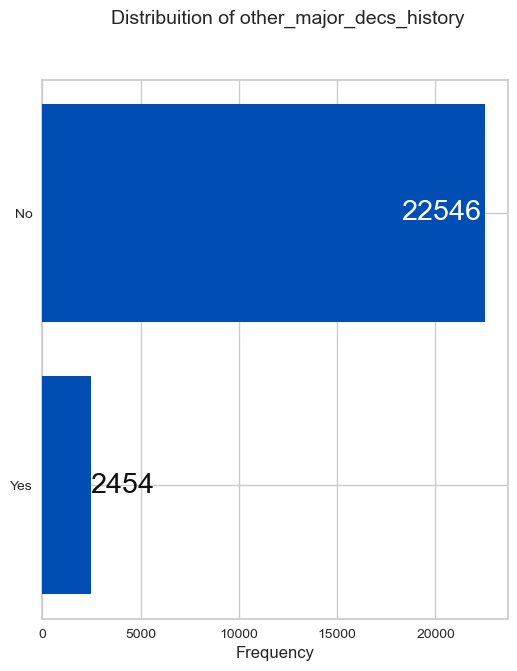



Overall Statistics
------------------

Total            =  25000
Number of Groups =  2


Statistics
----------

Rank          Frequency     Percent       Category      
--------------------------------------------------------
1             22546          90.1840      No            
2             2454           9.8160       Yes           

Distribution of Gender



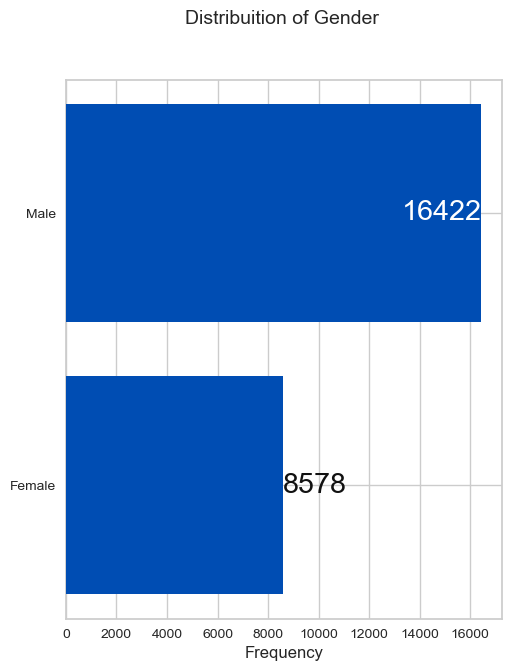



Overall Statistics
------------------

Total            =  25000
Number of Groups =  2


Statistics
----------

Rank          Frequency     Percent       Category      
--------------------------------------------------------
1             16422          65.6880      Male          
2             8578           34.3120      Female        

Distribution of smoking_status



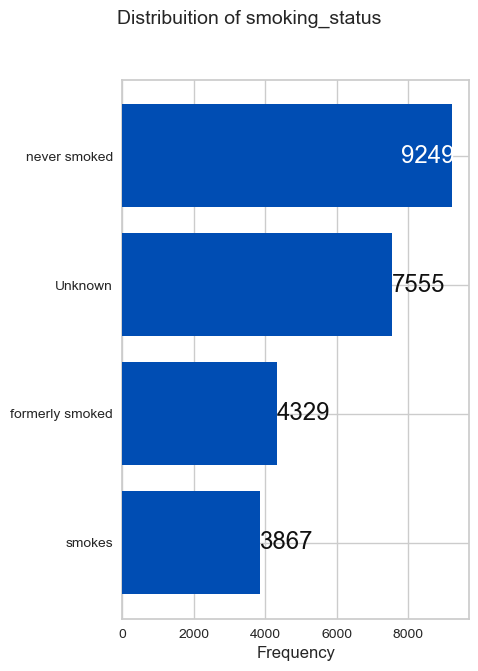



Overall Statistics
------------------

Total            =  25000
Number of Groups =  4


Statistics
----------

Rank          Frequency     Percent       Category      
--------------------------------------------------------
1             9249           36.9960      never smoked  
2             7555           30.2200      Unknown       
3             4329           17.3160      formerly smoked
4             3867           15.4680      smokes        

Distribution of Location



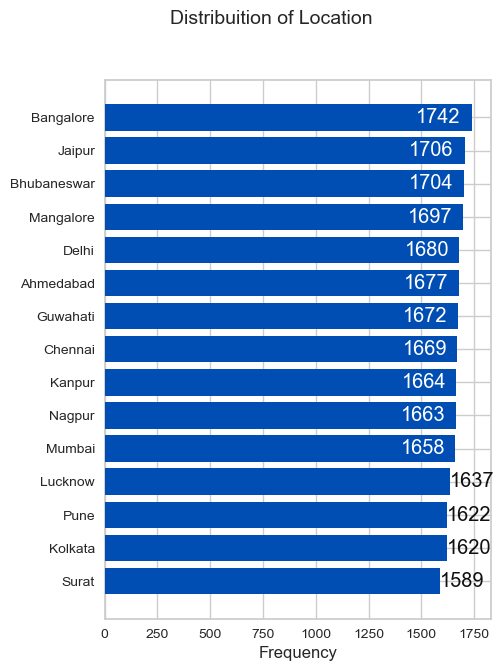



Overall Statistics
------------------

Total            =  25000
Number of Groups =  15


Statistics
----------

Rank          Frequency     Percent       Category      
--------------------------------------------------------
1             1742           6.9680       Bangalore     
2             1706           6.8240       Jaipur        
3             1704           6.8160       Bhubaneswar   
4             1697           6.7880       Mangalore     
5             1680           6.7200       Delhi         
6             1677           6.7080       Ahmedabad     
7             1672           6.6880       Guwahati      
8             1669           6.6760       Chennai       
9             1664           6.6560       Kanpur        
10            1663           6.6520       Nagpur        
11            1658           6.6320       Mumbai        
12            1637           6.5480       Lucknow       
13            1622           6.4880       Pune          
14            1620           6

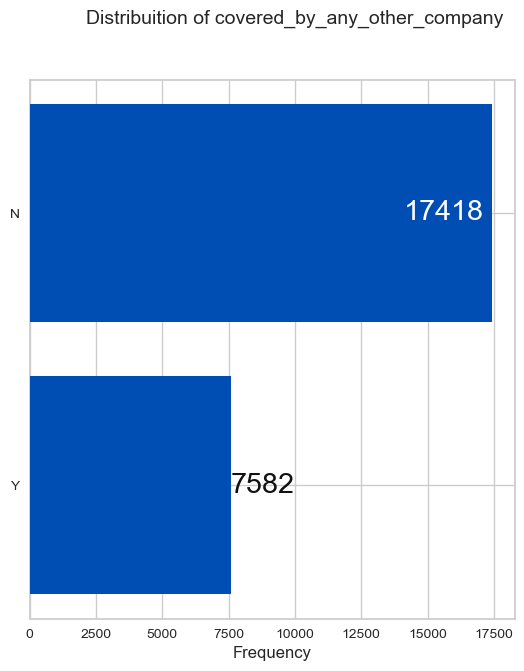



Overall Statistics
------------------

Total            =  25000
Number of Groups =  2


Statistics
----------

Rank          Frequency     Percent       Category      
--------------------------------------------------------
1             17418          69.6720      N             
2             7582           30.3280      Y             

Distribution of Alcohol



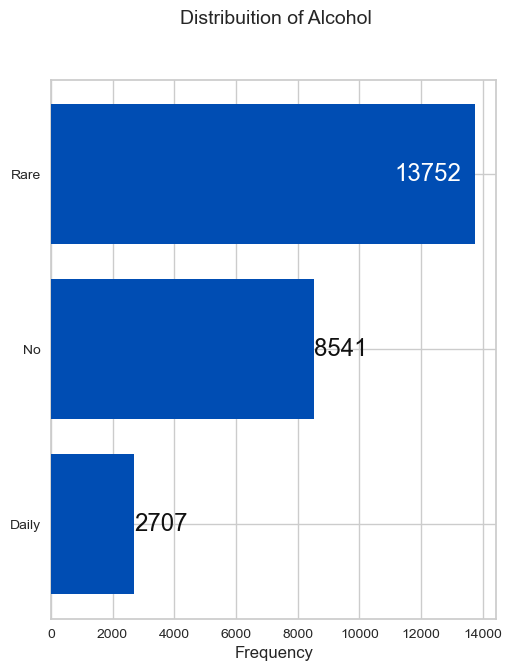



Overall Statistics
------------------

Total            =  25000
Number of Groups =  3


Statistics
----------

Rank          Frequency     Percent       Category      
--------------------------------------------------------
1             13752          55.0080      Rare          
2             8541           34.1640      No            
3             2707           10.8280      Daily         

Distribution of exercise



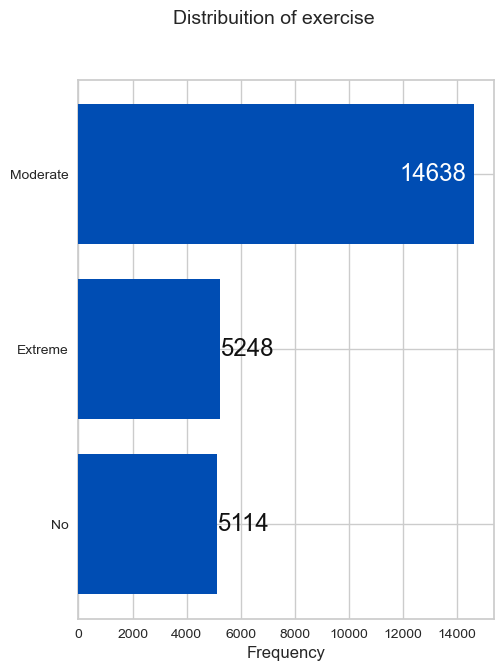



Overall Statistics
------------------

Total            =  25000
Number of Groups =  3


Statistics
----------

Rank          Frequency     Percent       Category      
--------------------------------------------------------
1             14638          58.5520      Moderate      
2             5248           20.9920      Extreme       
3             5114           20.4560      No            


In [20]:
for col in cat:
    print(f"\nDistribution of {col}\n")
    analyze(health_df[col],title=f'Distribuition of {col}')

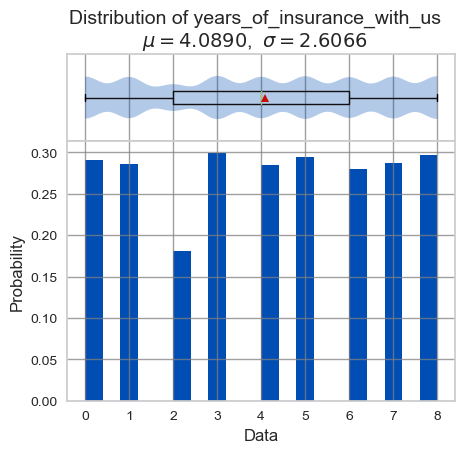



Statistics
----------

n         =  25000
Mean      =  4.0890
Std Dev   =  2.6066
Std Error =  0.0165
Skewness  = -0.0752
Kurtosis  = -1.2207
Maximum   =  8.0000
75%       =  6.0000
50%       =  4.0000
25%       =  2.0000
Minimum   =  0.0000
IQR       =  4.0000
Range     =  8.0000


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9286
p value =  0.0000

HA: Data is not normally distributed



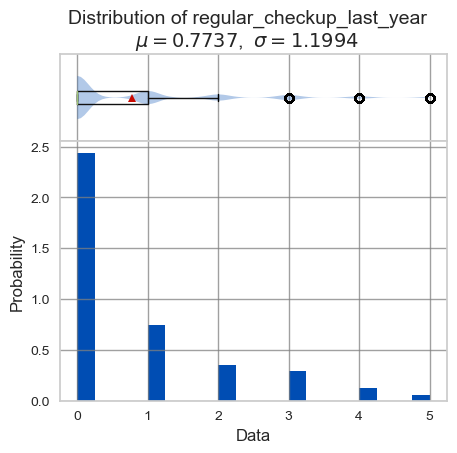



Statistics
----------

n         =  25000
Mean      =  0.7737
Std Dev   =  1.1994
Std Error =  0.0076
Skewness  =  1.6108
Kurtosis  =  1.8378
Maximum   =  5.0000
75%       =  1.0000
50%       =  0.0000
25%       =  0.0000
Minimum   =  0.0000
IQR       =  1.0000
Range     =  5.0000


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.6900
p value =  0.0000

HA: Data is not normally distributed



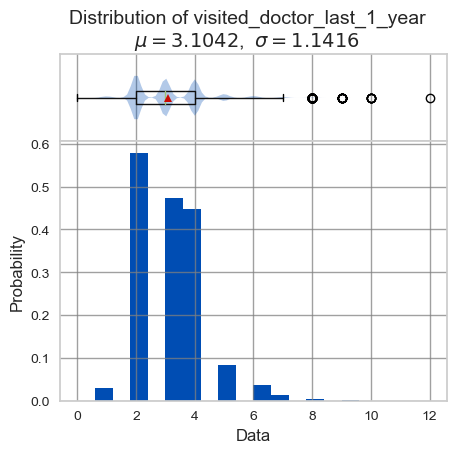



Statistics
----------

n         =  25000
Mean      =  3.1042
Std Dev   =  1.1416
Std Error =  0.0072
Skewness  =  0.9784
Kurtosis  =  1.7858
Maximum   =  12.0000
75%       =  4.0000
50%       =  3.0000
25%       =  2.0000
Minimum   =  0.0000
IQR       =  2.0000
Range     =  12.0000


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.8675
p value =  0.0000

HA: Data is not normally distributed



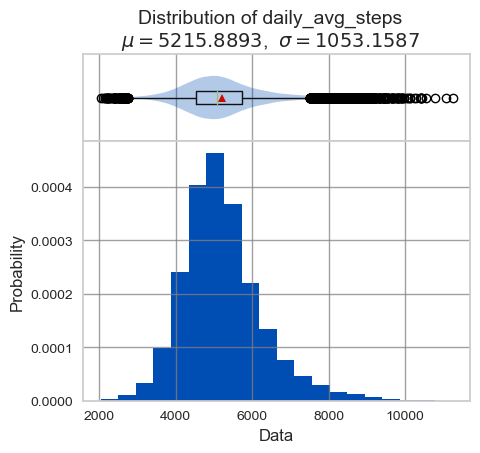



Statistics
----------

n         =  25000
Mean      =  5215.8893
Std Dev   =  1053.1587
Std Error =  6.6608
Skewness  =  0.9088
Kurtosis  =  1.8538
Maximum   =  11255.0000
75%       =  5730.0000
50%       =  5089.0000
25%       =  4543.0000
Minimum   =  2034.0000
IQR       =  1187.0000
Range     =  9221.0000


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9577
p value =  0.0000

HA: Data is not normally distributed



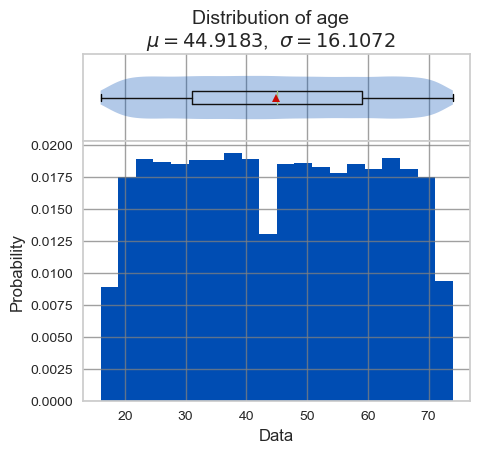



Statistics
----------

n         =  25000
Mean      =  44.9183
Std Dev   =  16.1072
Std Error =  0.1019
Skewness  =  0.0139
Kurtosis  = -1.1765
Maximum   =  74.0000
75%       =  59.0000
50%       =  45.0000
25%       =  31.0000
Minimum   =  16.0000
IQR       =  28.0000
Range     =  58.0000


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9582
p value =  0.0000

HA: Data is not normally distributed



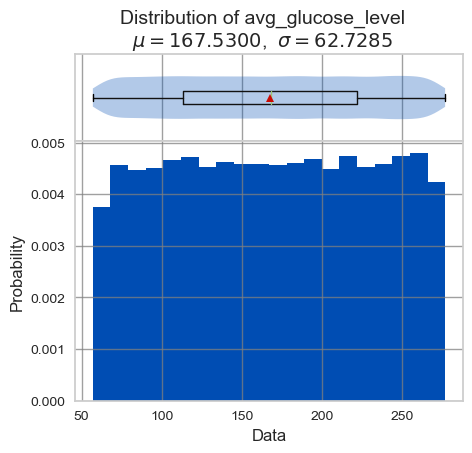



Statistics
----------

n         =  25000
Mean      =  167.5300
Std Dev   =  62.7285
Std Error =  0.3967
Skewness  = -0.0064
Kurtosis  = -1.1992
Maximum   =  277.0000
75%       =  222.0000
50%       =  168.0000
25%       =  113.0000
Minimum   =  57.0000
IQR       =  109.0000
Range     =  220.0000


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9551
p value =  0.0000

HA: Data is not normally distributed



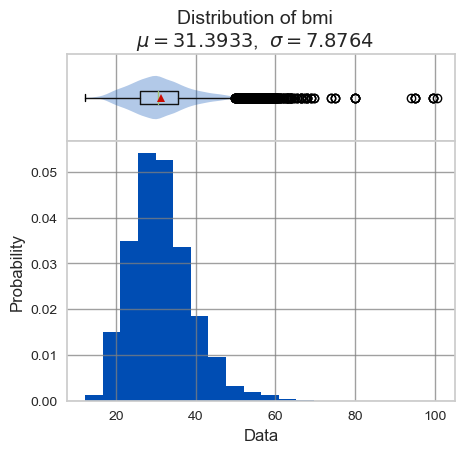



Statistics
----------

n         =  24010
Mean      =  31.3933
Std Dev   =  7.8764
Std Error =  0.0508
Skewness  =  1.0564
Kurtosis  =  3.3673
Maximum   =  100.6000
75%       =  35.6000
50%       =  30.5000
25%       =  26.1000
Minimum   =  12.3000
IQR       =  9.5000
Range     =  88.3000


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9534
p value =  0.0000

HA: Data is not normally distributed



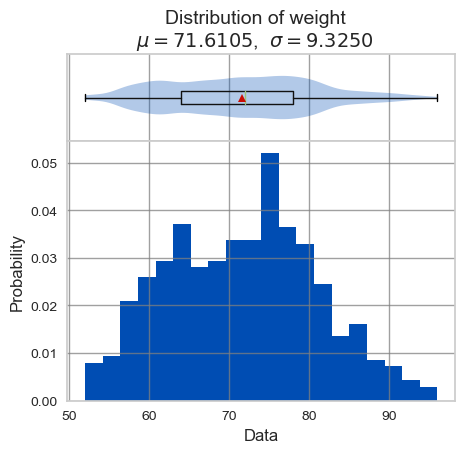



Statistics
----------

n         =  25000
Mean      =  71.6105
Std Dev   =  9.3250
Std Error =  0.0590
Skewness  =  0.1091
Kurtosis  = -0.6382
Maximum   =  96.0000
75%       =  78.0000
50%       =  72.0000
25%       =  64.0000
Minimum   =  52.0000
IQR       =  14.0000
Range     =  44.0000


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9869
p value =  0.0000

HA: Data is not normally distributed



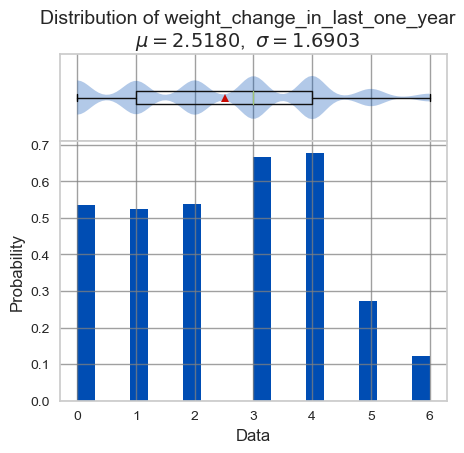



Statistics
----------

n         =  25000
Mean      =  2.5180
Std Dev   =  1.6903
Std Error =  0.0107
Skewness  =  0.0680
Kurtosis  = -0.9522
Maximum   =  6.0000
75%       =  4.0000
50%       =  3.0000
25%       =  1.0000
Minimum   =  0.0000
IQR       =  3.0000
Range     =  6.0000


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9339
p value =  0.0000

HA: Data is not normally distributed



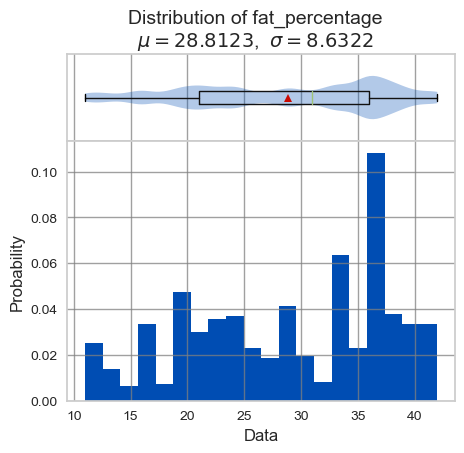



Statistics
----------

n         =  25000
Mean      =  28.8123
Std Dev   =  8.6322
Std Error =  0.0546
Skewness  = -0.3632
Kurtosis  = -1.0574
Maximum   =  42.0000
75%       =  36.0000
50%       =  31.0000
25%       =  21.0000
Minimum   =  11.0000
IQR       =  15.0000
Range     =  31.0000


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9387
p value =  0.0000

HA: Data is not normally distributed



In [21]:
for col in X:
    if health_df[col].dtype != "object":
        analyze(health_df[col], title=f"Distribution of {col}")

In [22]:
# Loop over the numerical columns and perform the analysis
results = pd.DataFrame()
for col in X:
    # Calculate summary statistics
    summary_stats = health_df[col].describe().to_frame().rename(columns={col: 'Summary Stats'})

    # Calculate skewness and kurtosis
    skewness = skew(health_df[col])
    kurtosis_val = kurtosis(health_df[col])

    # Calculate Shapiro-Wilk test
    stat, p = shapiro(health_df[col])
    sw_test = 'Normal' if p > 0.05 else 'Non-normal'

    # Add additional statistics to the summary statistics DataFrame
    summary_stats.loc['Skewness'] = skewness
    summary_stats.loc['Kurtosis'] = kurtosis_val
    summary_stats.loc['Shapiro-Wilk Test'] = sw_test

    # Add the results for this column to the overall results DataFrame
    results[col] = summary_stats['Summary Stats']


results.T

,count,mean,std,min,25%,50%,75%,max,Skewness,Kurtosis,Shapiro-Wilk Test
years_of_insurance_with_us,25000.0,4.08904,2.606612,0.0,2.0,4.0,6.0,8.0,-0.075212,-1.220693,Non-normal
regular_checkup_last_year,25000.0,0.77368,1.199449,0.0,0.0,0.0,1.0,5.0,1.61081,1.837831,Non-normal
visited_doctor_last_1_year,25000.0,3.1042,1.141663,0.0,2.0,3.0,4.0,12.0,0.978397,1.785771,Non-normal
daily_avg_steps,25000.0,5215.88932,1053.179748,2034.0,4543.0,5089.0,5730.0,11255.0,0.908812,1.853775,Non-normal
age,25000.0,44.91832,16.107492,16.0,31.0,45.0,59.0,74.0,0.013859,-1.176539,Non-normal
avg_glucose_level,25000.0,167.53,62.729712,57.0,113.0,168.0,222.0,277.0,-0.006389,-1.199167,Non-normal
bmi,24010.0,31.393328,7.876535,12.3,26.1,30.5,35.6,100.6,NaN,NaN,Normal
weight,25000.0,71.61048,9.325183,52.0,64.0,72.0,78.0,96.0,0.10907,-0.63815,Non-normal
weight_change_in_last_one_year,25000.0,2.51796,1.690335,0.0,1.0,3.0,4.0,6.0,0.068022,-0.952198,Non-normal
fat_percentage,25000.0,28.81228,8.632382,11.0,21.0,31.0,36.0,42.0,-0.36324,-1.05737,Non-normal


### Null Value Treatment
<a id='Null-Value-Treatment'></a>

In [23]:
health_df.isnull().sum()

years_of_insurance_with_us          0
regular_checkup_last_year           0
adventure_sports                    0
Occupation                          0
visited_doctor_last_1_year          0
cholesterol_level                   0
daily_avg_steps                     0
age                                 0
heart_decs_history                  0
other_major_decs_history            0
Gender                              0
avg_glucose_level                   0
bmi                               990
smoking_status                      0
Location                            0
weight                              0
covered_by_any_other_company        0
Alcohol                             0
exercise                            0
weight_change_in_last_one_year      0
fat_percentage                      0
insurance_cost                      0
dtype: int64

In [24]:
imputer = KNNImputer(n_neighbors=5)
health_df["bmi"] = imputer.fit_transform(health_df[["bmi"]])

In [25]:
health_df.isnull().sum()

years_of_insurance_with_us        0
regular_checkup_last_year         0
adventure_sports                  0
Occupation                        0
visited_doctor_last_1_year        0
cholesterol_level                 0
daily_avg_steps                   0
age                               0
heart_decs_history                0
other_major_decs_history          0
Gender                            0
avg_glucose_level                 0
bmi                               0
smoking_status                    0
Location                          0
weight                            0
covered_by_any_other_company      0
Alcohol                           0
exercise                          0
weight_change_in_last_one_year    0
fat_percentage                    0
insurance_cost                    0
dtype: int64

In [26]:
health_df["Gender"].value_counts()

Male      16422
Female     8578
Name: Gender, dtype: int64

### Outlier Treatment
<a id='Outlier-Treatment'></a>

In [27]:
def outlier_treatment(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [28]:
col_df = num
for i in range(0,len(col_df)):
    lr,ur = outlier_treatment(health_df[col_df[i]])
    health_df[col_df[i]] =np.where(health_df[col_df[i]]>ur,ur,health_df[col_df[i]])
    health_df[col_df[i]] =np.where(health_df[col_df[i]]<lr,lr,health_df[col_df[i]])

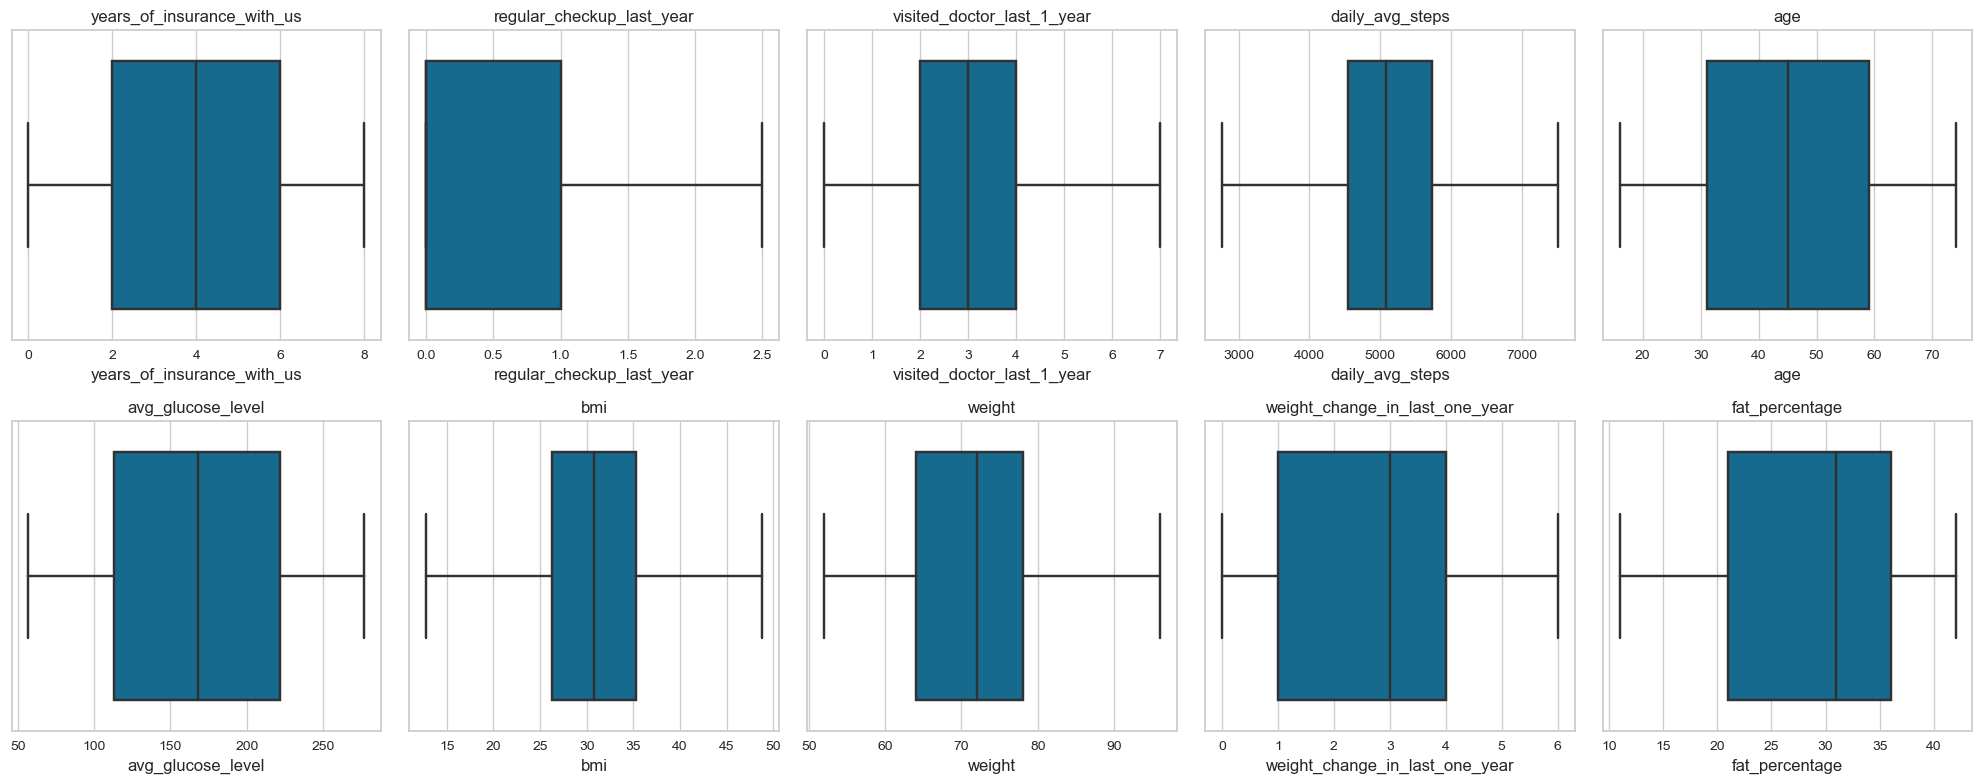

In [29]:
# columns to plot
columns_to_plot = num

# create subplots
fig, axes = plt.subplots(nrows=2, ncols=int(len(columns_to_plot)/2), figsize=(20,8))

# plot box plots for each column
for i, col in enumerate(columns_to_plot):
    if i < 5:
        sns.boxplot(x=health_df[col], ax=axes[0,i])
        axes[0,i].set_title(col)
    else:
        sns.boxplot(x=health_df[col], ax=axes[1,i-5])
        axes[1,i-5].set_title(col)


plt.tight_layout()
plt.show()

### Variable Creation
<a id='Variable-Creation'></a>

In [30]:
# Create a new column to store the classification
health_df["obesity_classification"] = ""

# Define the function to classify individuals as obese or not obese
def classify_obesity(row):
    if row["Gender"] == "Male":
        if row["fat_percentage"] >= 25:
            return "Obese"
        else:
            return "Not Obese"
    else:
        if row["fat_percentage"] >= 30:
            return "Obese"
        else:
            return "Not Obese"

# Apply the function to each row and store the classification in the new column
health_df["obesity_classification"] = health_df.apply(classify_obesity, axis=1)

# View the updated dataframe
health_df.head()

,years_of_insurance_with_us,regular_checkup_last_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,...,smoking_status,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost,obesity_classification
0,3.0,1.0,Yes,Salried,2.0,125 to 150,4866.0,28.0,Yes,No,...,Unknown,Chennai,67.0,N,Rare,Moderate,1.0,25.0,20978,Obese
1,0.0,0.0,No,Student,4.0,150 to 175,6411.0,50.0,No,No,...,formerly smoked,Jaipur,58.0,N,Rare,Moderate,3.0,27.0,6170,Obese
2,1.0,0.0,No,Business,4.0,200 to 225,4509.0,68.0,No,No,...,formerly smoked,Jaipur,73.0,N,Daily,Extreme,0.0,32.0,28382,Obese
3,7.0,2.5,No,Business,2.0,175 to 200,6214.0,51.0,No,No,...,Unknown,Chennai,71.0,Y,Rare,No,3.0,37.0,27148,Obese
4,3.0,1.0,No,Student,2.0,150 to 175,4938.0,44.0,No,Yes,...,never smoked,Bangalore,74.0,N,No,Extreme,0.0,34.0,29616,Obese



 Distribution of obesity_classification



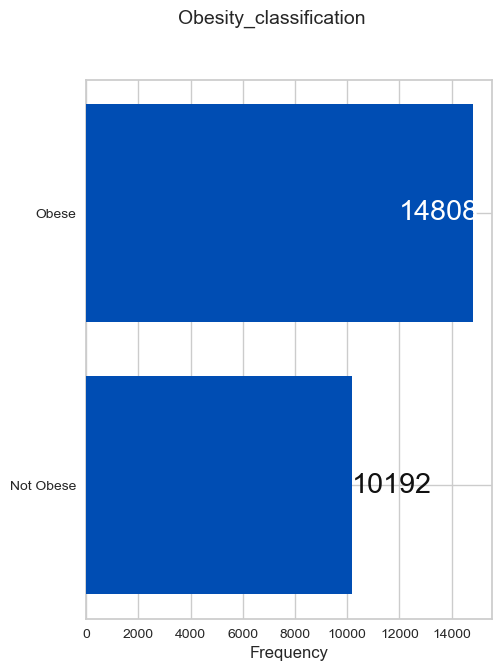



Overall Statistics
------------------

Total            =  25000
Number of Groups =  2


Statistics
----------

Rank          Frequency     Percent       Category      
--------------------------------------------------------
1             14808          59.2320      Obese         
2             10192          40.7680      Not Obese     


In [31]:
print("\n Distribution of obesity_classification\n")
analyze(health_df['obesity_classification'],title='Obesity_classification')

In [32]:
cat.append("obesity_classification")

In [33]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_of_insurance_with_us      25000 non-null  float64
 1   regular_checkup_last_year       25000 non-null  float64
 2   adventure_sports                25000 non-null  object 
 3   Occupation                      25000 non-null  object 
 4   visited_doctor_last_1_year      25000 non-null  float64
 5   cholesterol_level               25000 non-null  object 
 6   daily_avg_steps                 25000 non-null  float64
 7   age                             25000 non-null  float64
 8   heart_decs_history              25000 non-null  object 
 9   other_major_decs_history        25000 non-null  object 
 10  Gender                          25000 non-null  object 
 11  avg_glucose_level               25000 non-null  float64
 12  bmi                             

## Exploratory Data Analysis
<a id='Exploratory-Data-Analysis'></a>

Relationship between years of insurance and regular checkup

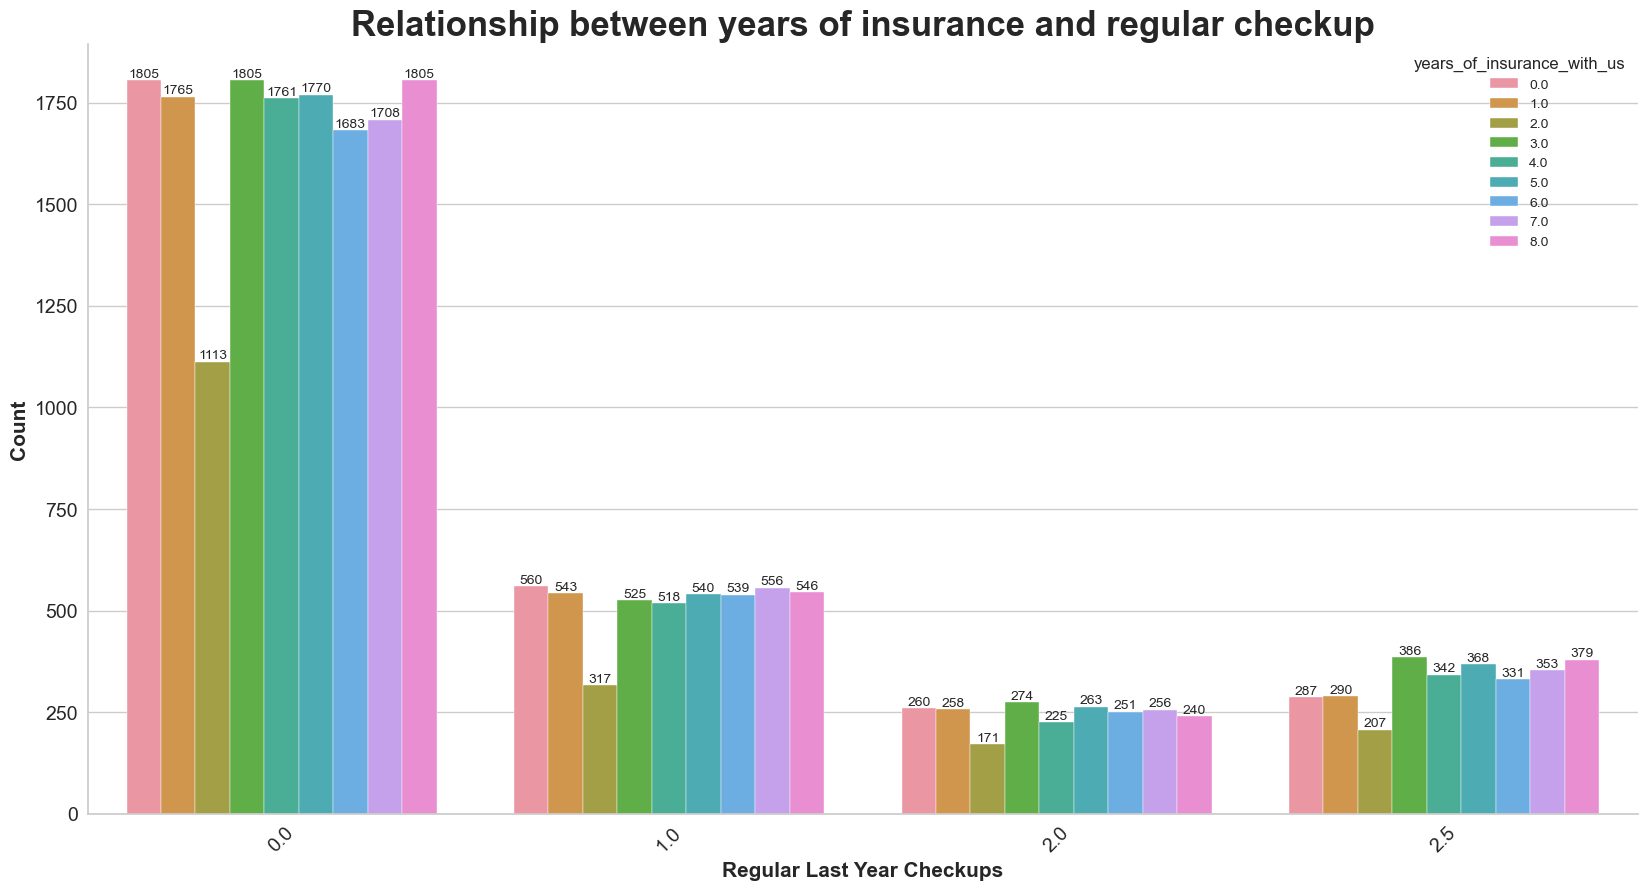

In [34]:
#Declare Figure and specify an appropriate size and title
plt.figure(figsize=(20,10))
plt.title("Relationship between years of insurance and regular checkup",fontsize=25, weight="bold")

#Remove outer border and set grid style 
sns.despine()
sns.set_style("whitegrid")

#Plotting relevant graph using seaborn
ax = sns.countplot(data= health_df,x="regular_checkup_last_year", hue= "years_of_insurance_with_us");
for i in range(0,len(ax.containers)):
    ax.bar_label(ax.containers[i],label_type="edge",fontsize= 10);

#Label the axes and rotate the label of the categories so that it is readable 
plt.xticks(rotation = 45)
plt.xlabel("Regular Last Year Checkups",fontsize=15, weight="bold");
plt.ylabel("Count",fontsize=15, weight="bold");
ax.tick_params(labelsize = 14)

Relationship between BMI and cholesterol level

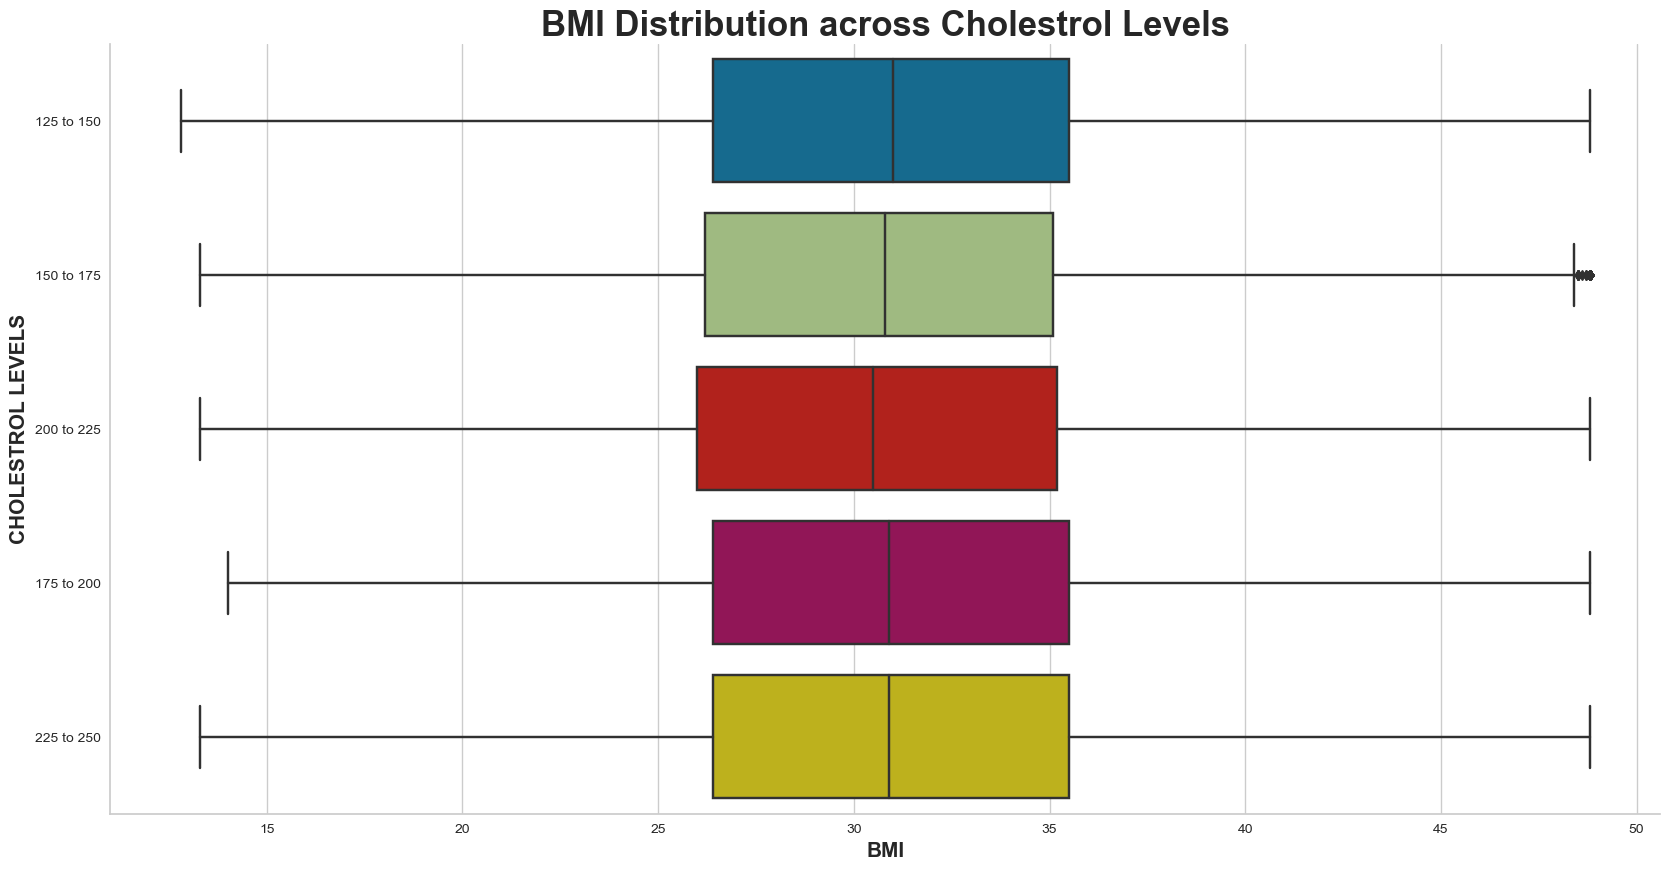

In [35]:
plt.figure(figsize=(20,10))
plt.title("BMI Distribution across Cholestrol Levels",fontsize=25, weight="bold")

#Remove outer border and set grid style 
sns.despine()
sns.set_style("whitegrid")

#Plotting relevant graph using seaborn
ax = sns.boxplot(data= health_df ,x="bmi",y= "cholesterol_level");

#Label the axes and rotate the label of the categories so that it is readable 
plt.xlabel("BMI",fontsize=15, weight="bold");
plt.ylabel("CHOLESTROL LEVELS",fontsize=15, weight="bold");

Distribution of smoking Status vs regular checkups in the past year

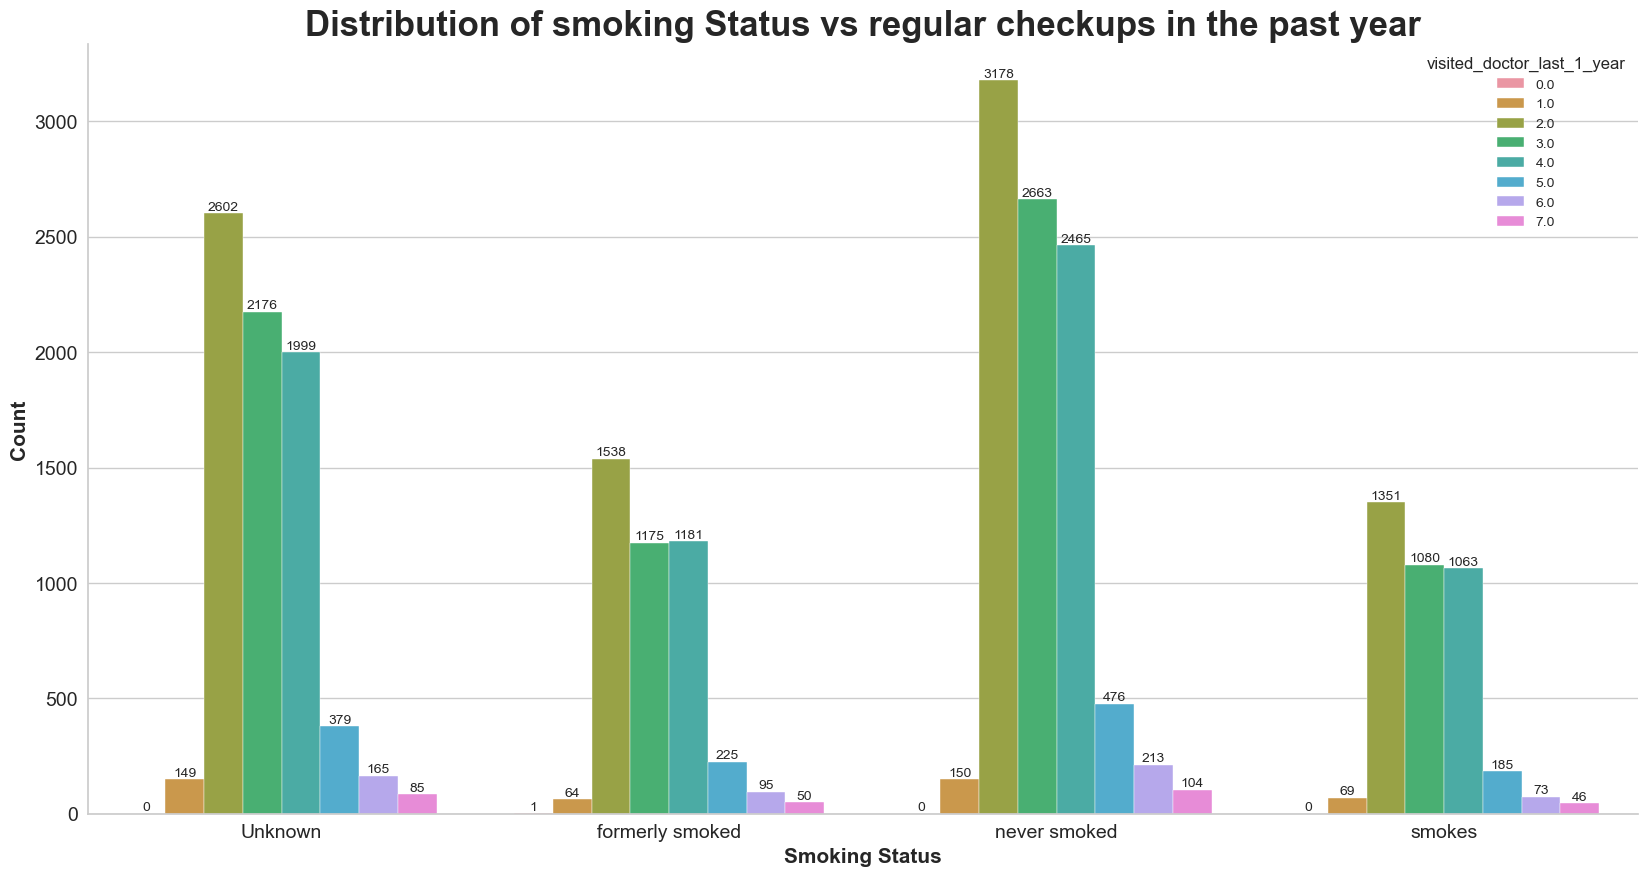

In [36]:
#Declare Figure and specify an appropriate size and title
plt.figure(figsize=(20,10))
plt.title("Distribution of smoking Status vs regular checkups in the past year",fontsize=25, weight="bold")

#Remove outer border and set grid style 
sns.despine()
sns.set_style("whitegrid")

#Plotting relevant graph using seaborn
ax = sns.countplot(data= health_df,x="smoking_status", hue= "visited_doctor_last_1_year");
for i in range(0,len(ax.containers)):
    ax.bar_label(ax.containers[i],label_type="edge",fontsize= 10);

#Label the axes and rotate the label of the categories so that it is readable 
plt.xticks(rotation = 0)
plt.xlabel("Smoking Status",fontsize=15, weight="bold");
plt.ylabel("Count",fontsize=15, weight="bold");
ax.tick_params(labelsize = 14)

Relationship between age and history of heart deceases

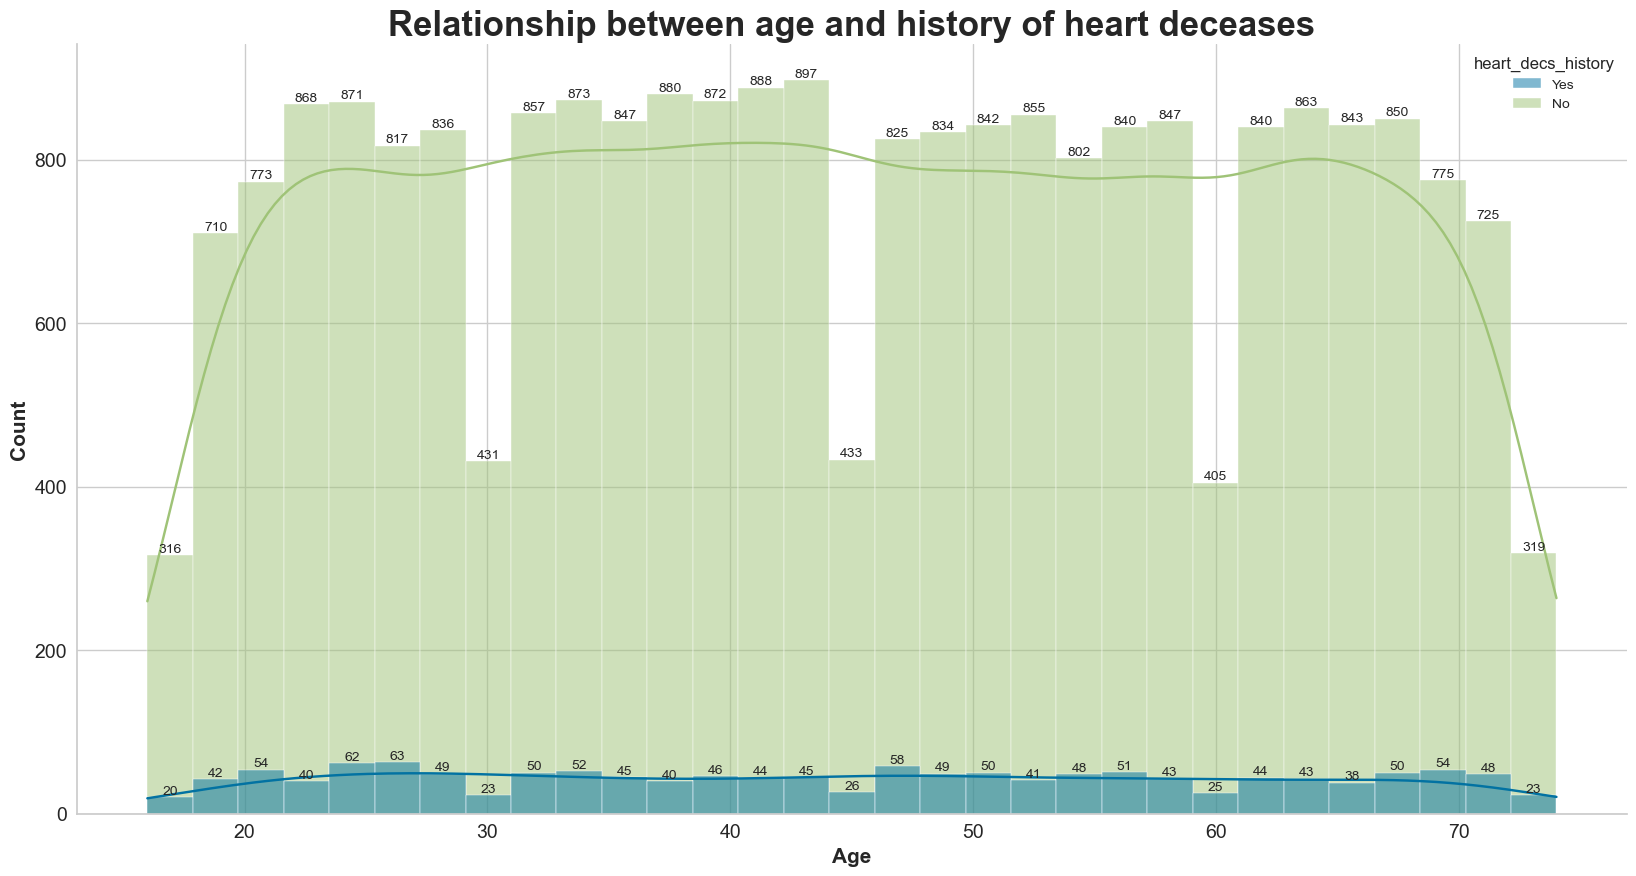

In [37]:
#Declare Figure and specify an appropriate size and title
plt.figure(figsize=(20,10))
plt.title("Relationship between age and history of heart deceases",fontsize=25, weight="bold")

#Remove outer border and set grid style 
sns.despine()
sns.set_style("whitegrid")

#Plotting relevant graph using seaborn
ax = sns.histplot(data= health_df,x="age", hue= "heart_decs_history",kde=True);
for i in range(0,len(ax.containers)):
    ax.bar_label(ax.containers[i],label_type="edge",fontsize= 10);

#Label the axes and rotate the label of the categories so that it is readable 
plt.xticks(rotation = 0)
plt.xlabel("Age",fontsize=15, weight="bold");
plt.ylabel("Count",fontsize=15, weight="bold");
ax.tick_params(labelsize = 14)

Relationship between coverage by other company and years of insurance coverage with the company

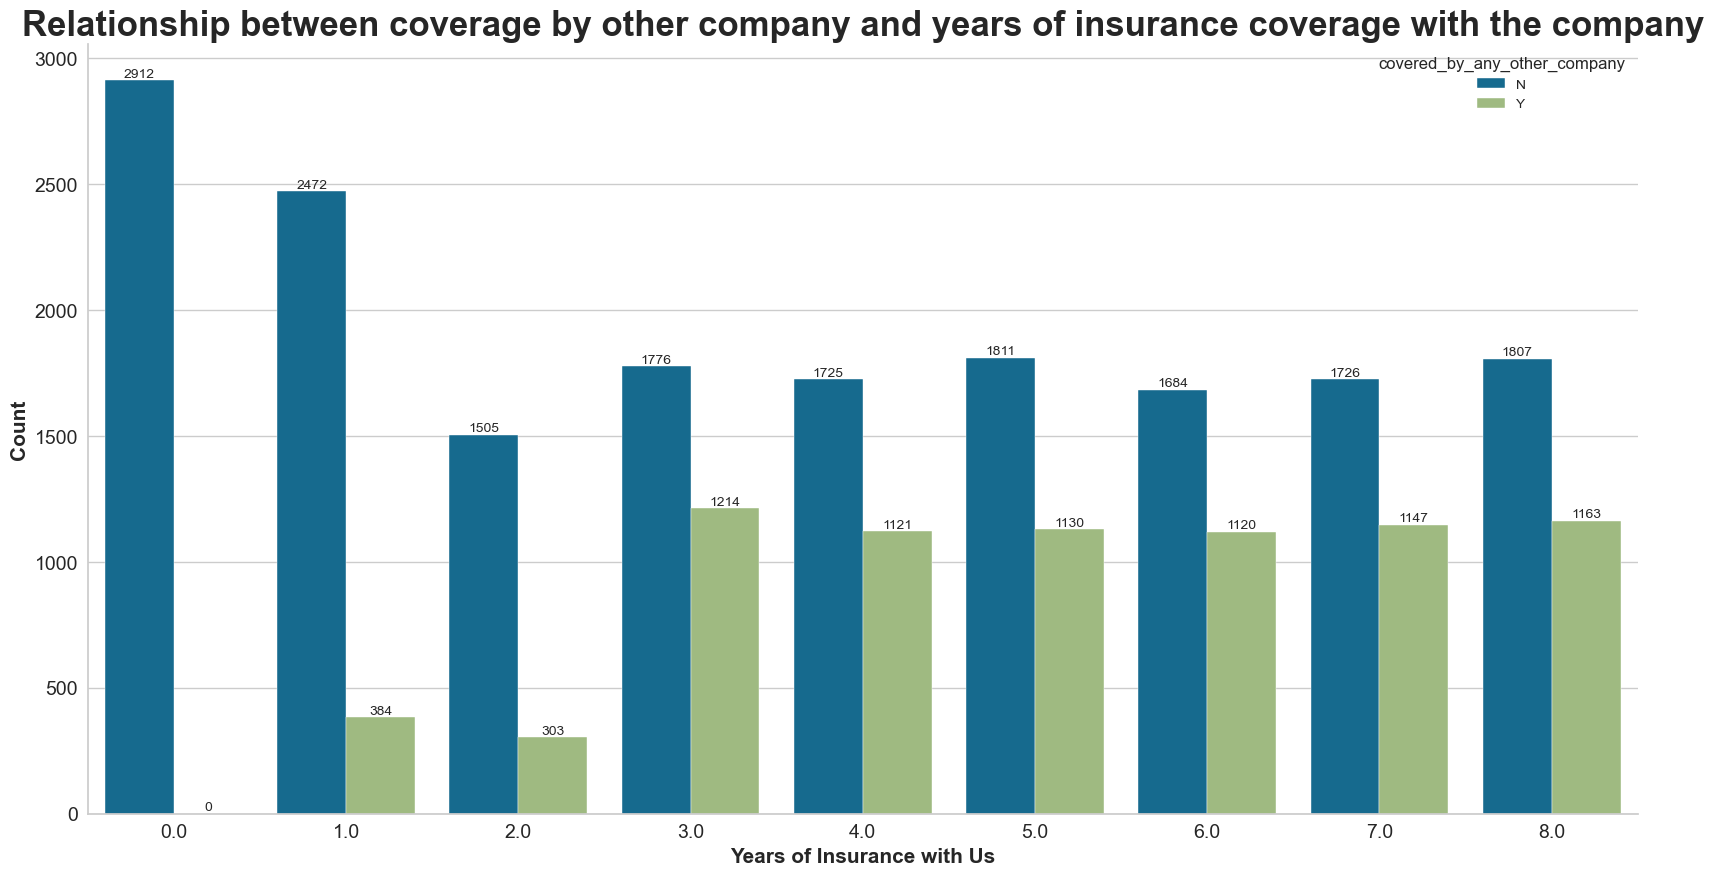

In [38]:
#Declare Figure and specify an appropriate size and title
plt.figure(figsize=(20,10))
plt.title("Relationship between coverage by other company and years of insurance coverage with the company",fontsize=25, weight="bold")

#Remove outer border and set grid style 
sns.despine()
sns.set_style("whitegrid")

#Plotting relevant graph using seaborn
ax = sns.countplot(data= health_df,x= "years_of_insurance_with_us",hue="covered_by_any_other_company");
for i in range(0,len(ax.containers)):
    ax.bar_label(ax.containers[i],label_type="edge",fontsize= 10);

#Label the axes and rotate the label of the categories so that it is readable 
plt.xticks(rotation = 0)
plt.xlabel("Years of Insurance with Us",fontsize=15, weight="bold");
plt.ylabel("Count",fontsize=15, weight="bold");
ax.tick_params(labelsize = 14)

Distribution of alcohol consumption based on gender

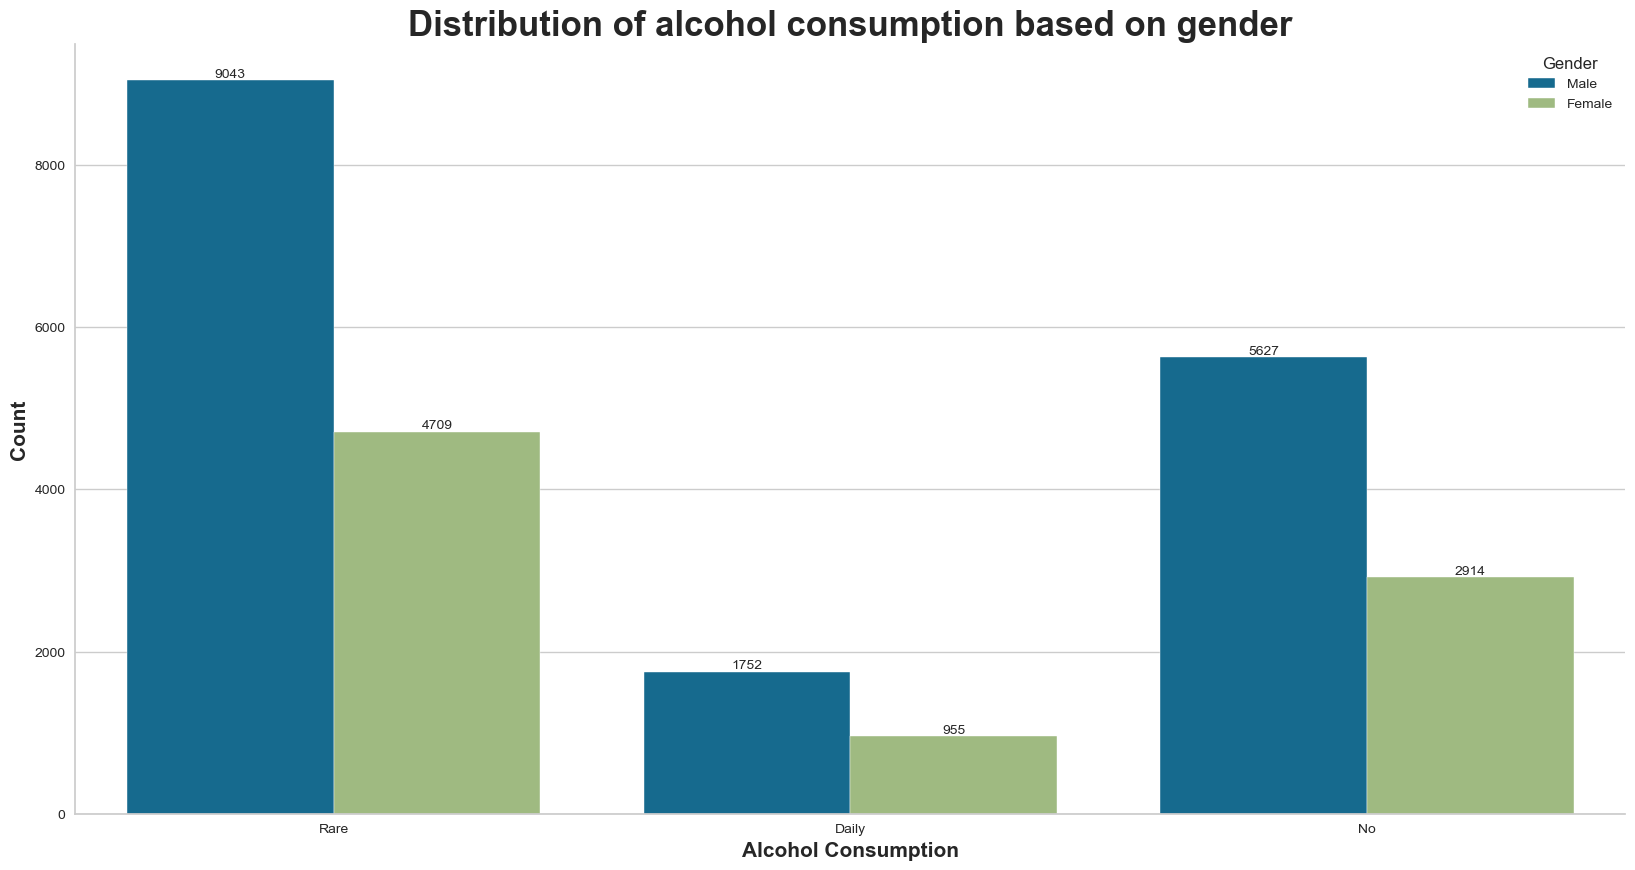

In [39]:
#Declare Figure and specify an appropriate size and title
plt.figure(figsize=(20,10))
plt.title("Distribution of alcohol consumption based on gender",fontsize=25, weight="bold")

#Remove outer border and set grid style 
sns.despine()
sns.set_style("whitegrid")

#Plotting relevant graph using seaborn
ax = sns.countplot(data= health_df,x="Alcohol", hue= "Gender");
for i in range(0,len(ax.containers)):
    ax.bar_label(ax.containers[i],label_type="edge",fontsize= 10);

#Label the axes and rotate the label of the categories so that it is readable 
plt.xticks(rotation = 0)
plt.xlabel("Alcohol Consumption",fontsize=15, weight="bold");
plt.ylabel("Count",fontsize=15, weight="bold");

Average Glucose Level Distribution across Cities

In [40]:
orderlist = list(health_df.groupby("Location")["avg_glucose_level"].median().sort_values(ascending=False).index)
health_df.groupby("Location")["avg_glucose_level"].median().sort_values(ascending=False)

Location
Guwahati       174.5
Lucknow        171.0
Mumbai         171.0
Chennai        169.0
Kolkata        169.0
Ahmedabad      168.0
Bangalore      168.0
Delhi          168.0
Bhubaneswar    167.0
Surat          167.0
Kanpur         166.0
Pune           166.0
Mangalore      164.0
Nagpur         164.0
Jaipur         163.0
Name: avg_glucose_level, dtype: float64

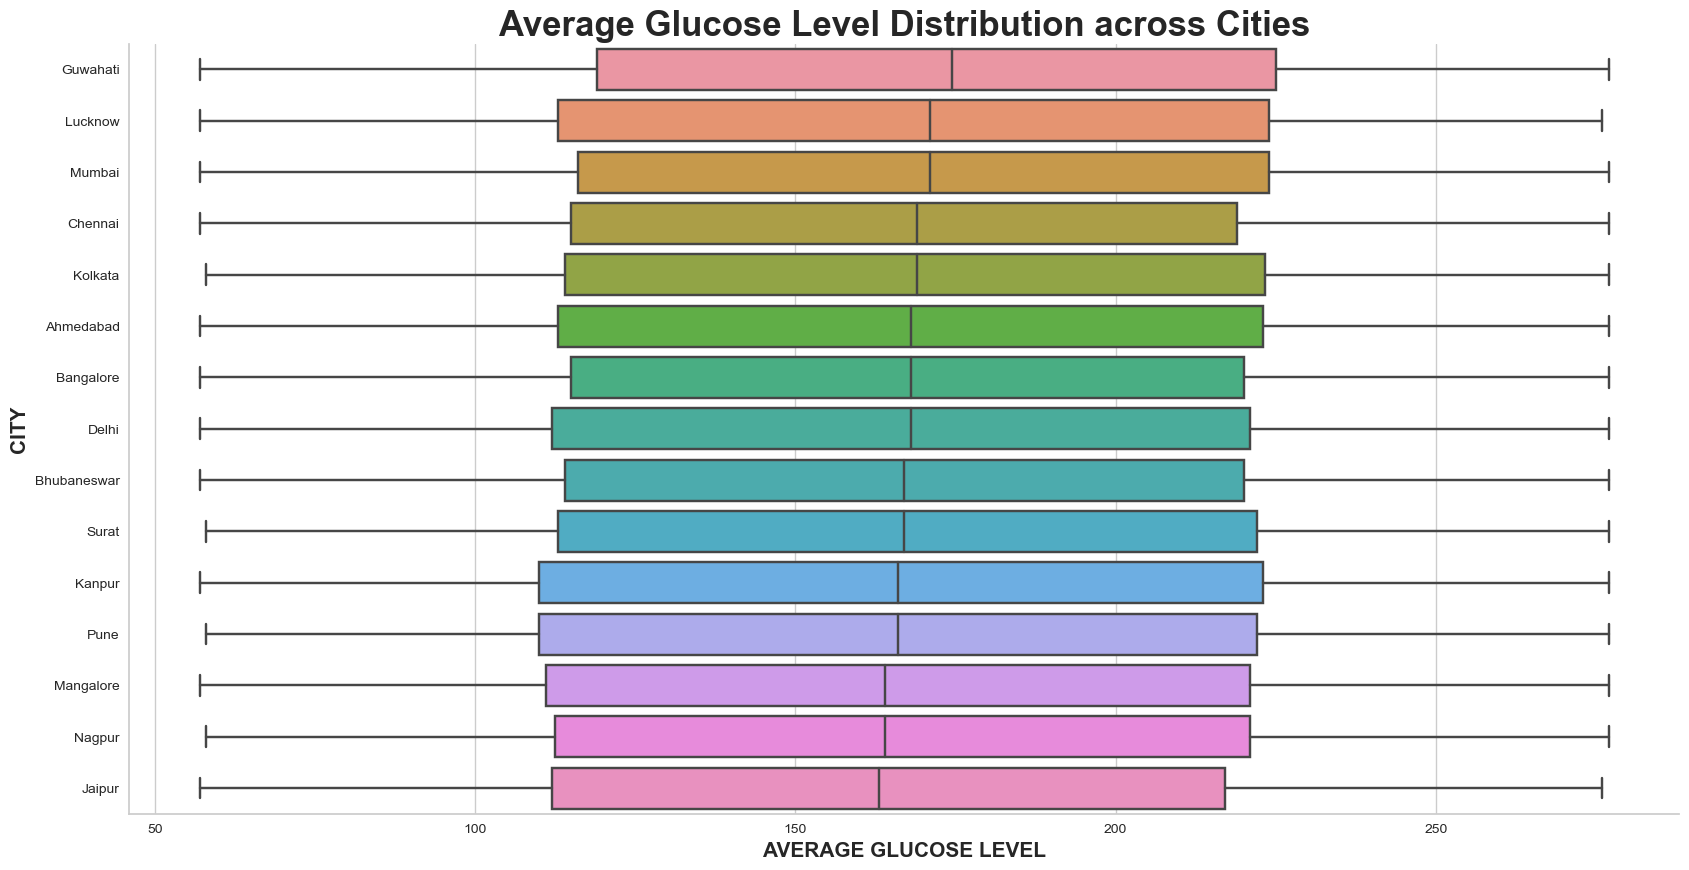

In [41]:
plt.figure(figsize=(20,10))
plt.title("Average Glucose Level Distribution across Cities",fontsize=25, weight="bold")

#Remove outer border and set grid style 
sns.despine()
sns.set_style("whitegrid")

#Plotting relevant graph using seaborn
ax = sns.boxplot(data= health_df ,x="avg_glucose_level",y= "Location",order=orderlist);

#Label the axes and rotate the label of the categories so that it is readable 
plt.xlabel("AVERAGE GLUCOSE LEVEL",fontsize=15, weight="bold");
plt.ylabel("CITY",fontsize=15, weight="bold");

Heat Map Visualizing correlation between numerical variables

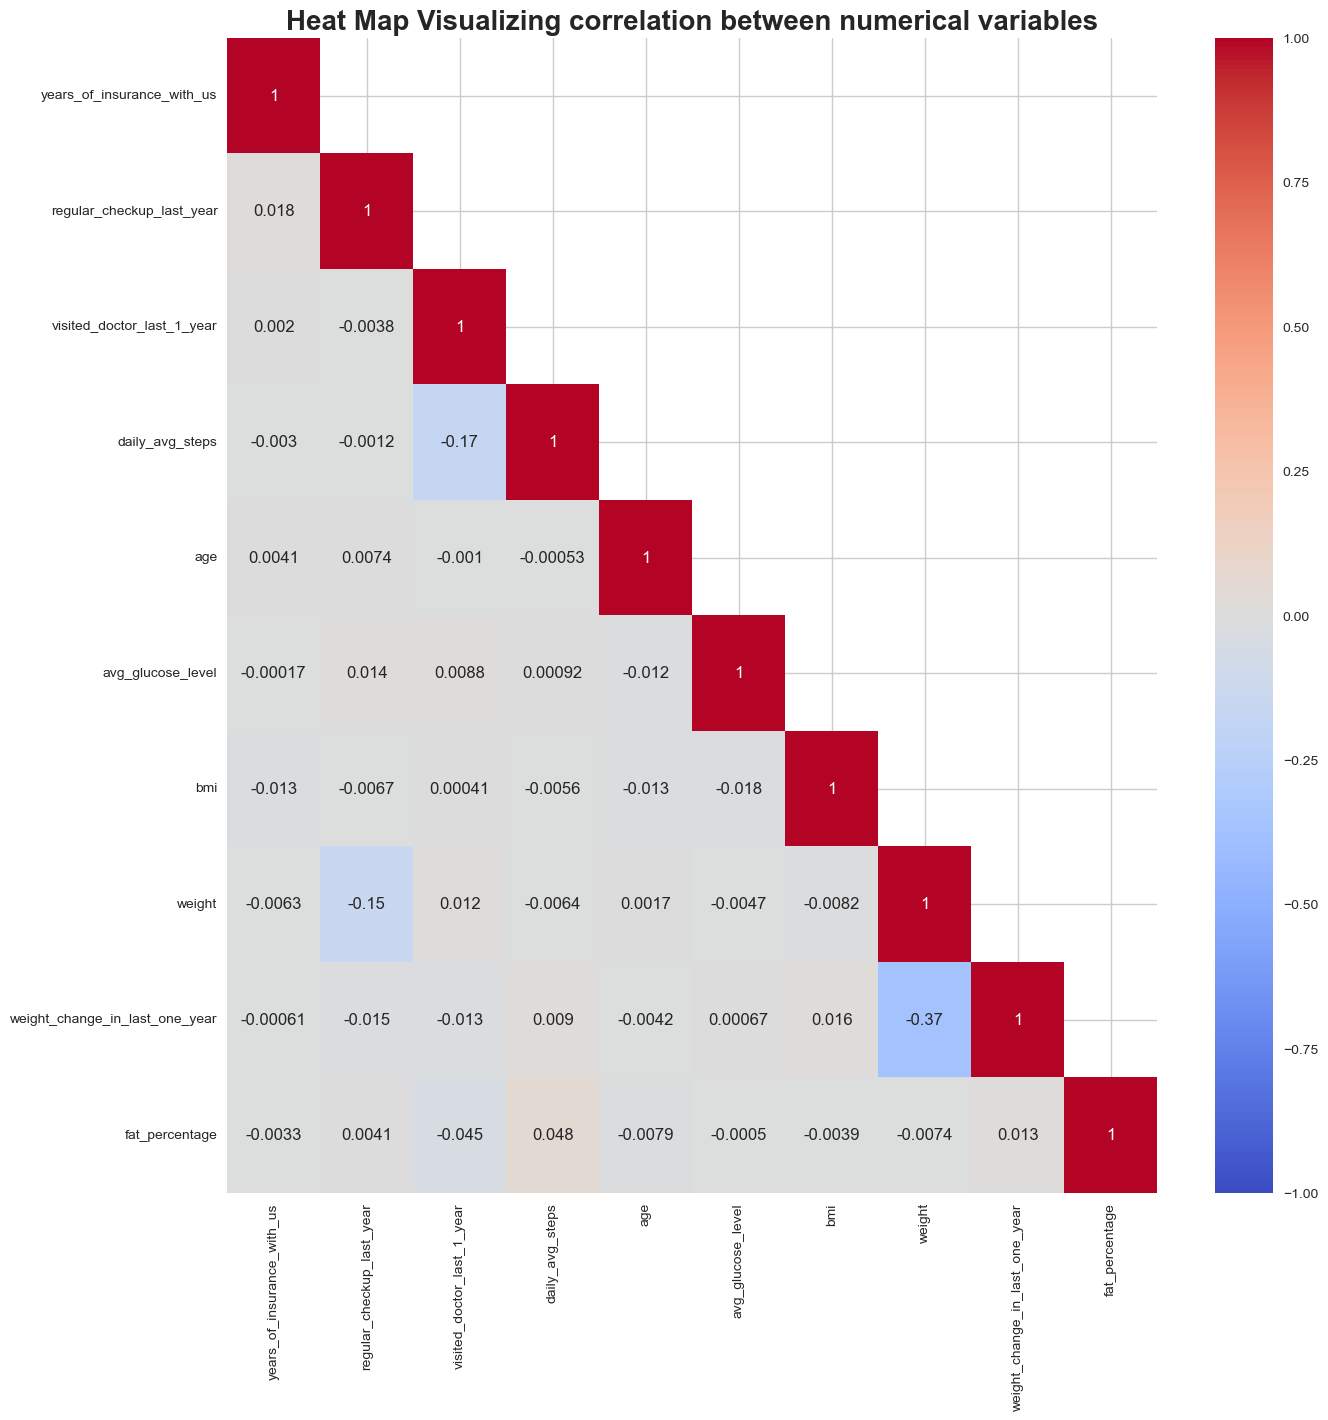

In [42]:
## Checking on the correlation between the variables
Cor = health_df[num].corr(method='pearson')
plt.figure(figsize=(15 ,15))
plt.title("Heat Map Visualizing correlation between numerical variables",fontsize=20, weight="bold")
mask = np.array(Cor)
mask[np.tril_indices_from(mask)] =False
sns.heatmap(data =Cor, annot =True, mask =mask,vmax =1, vmin=-1, cmap ='coolwarm');

## Clustering
<a id='Clustering'></a>

In [43]:
cat=[]
num=[]
for i in health_df.columns:
    if ((health_df[i].dtype=="int64") or (health_df[i].dtype=="float64")):
        num.append(i)
    else:
        cat.append(i)
print(cat) 
print(num)

['adventure_sports', 'Occupation', 'cholesterol_level', 'heart_decs_history', 'other_major_decs_history', 'Gender', 'smoking_status', 'Location', 'covered_by_any_other_company', 'Alcohol', 'exercise', 'obesity_classification']
['years_of_insurance_with_us', 'regular_checkup_last_year', 'visited_doctor_last_1_year', 'daily_avg_steps', 'age', 'avg_glucose_level', 'bmi', 'weight', 'weight_change_in_last_one_year', 'fat_percentage', 'insurance_cost']


In [44]:
num.pop(-1)
num

['years_of_insurance_with_us',
 'regular_checkup_last_year',
 'visited_doctor_last_1_year',
 'daily_avg_steps',
 'age',
 'avg_glucose_level',
 'bmi',
 'weight',
 'weight_change_in_last_one_year',
 'fat_percentage']

In [45]:
health_df[num].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_of_insurance_with_us      25000 non-null  float64
 1   regular_checkup_last_year       25000 non-null  float64
 2   visited_doctor_last_1_year      25000 non-null  float64
 3   daily_avg_steps                 25000 non-null  float64
 4   age                             25000 non-null  float64
 5   avg_glucose_level               25000 non-null  float64
 6   bmi                             25000 non-null  float64
 7   weight                          25000 non-null  float64
 8   weight_change_in_last_one_year  25000 non-null  float64
 9   fat_percentage                  25000 non-null  float64
dtypes: float64(10)
memory usage: 1.9 MB


In [46]:
scaler_clust = StandardScaler()
health_num_scaled = pd.DataFrame(scaler_clust.fit_transform(health_df[num]),columns=num)
health_num_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
years_of_insurance_with_us,25000.0,8.391510e-17,1.00002,-1.568750,-0.801455,-0.034160,0.733135,1.500430
regular_checkup_last_year,25000.0,-6.934897e-17,1.00002,-0.714377,-0.714377,-0.714377,0.374779,2.008512
visited_doctor_last_1_year,25000.0,-1.921308e-16,1.00002,-2.765292,-0.980772,-0.088512,0.803748,3.480528
daily_avg_steps,25000.0,6.536993e-17,1.00002,-2.502674,-0.666297,-0.103162,0.557955,2.394332
age,25000.0,-8.242296e-17,1.00002,-1.795369,-0.864107,0.005071,0.874249,1.805511
avg_glucose_level,25000.0,-1.705303e-17,1.00002,-1.762039,-0.869302,0.007493,0.868346,1.745141
bmi,25000.0,-5.940137e-17,1.00002,-2.581947,-0.689585,-0.058797,0.571990,2.464353
weight,25000.0,4.980194e-16,1.00002,-2.103001,-0.816138,0.041772,0.685203,2.615499
weight_change_in_last_one_year,25000.0,2.671641e-17,1.00002,-1.489652,-0.898041,0.285180,0.876791,2.060012
fat_percentage,25000.0,-1.443823e-16,1.00002,-2.063467,-0.905015,0.253437,0.832663,1.527734


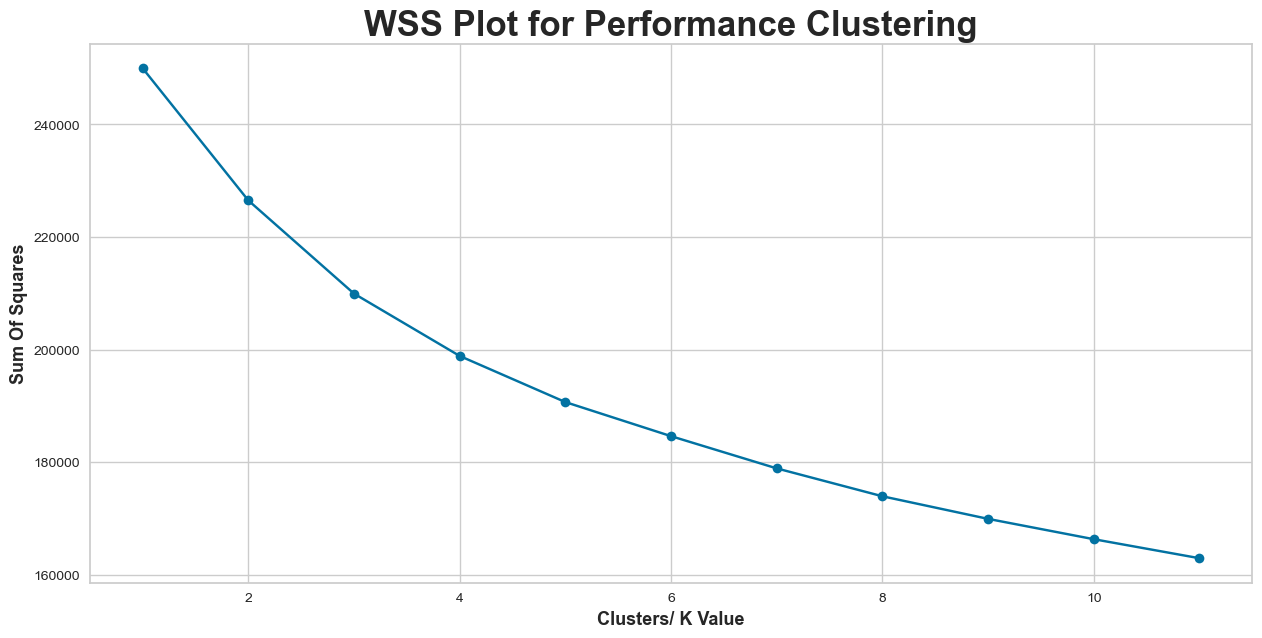

In [47]:
#Within Sum of Squares
wss=[]
for i in range(1,12):
    KM = KMeans(n_clusters=i,random_state=42)
    KM.fit(health_num_scaled)
    wss.append(KM.inertia_)
    
#WSS Plot
plt.figure(figsize=(15,7))
plt.title("WSS Plot for Performance Clustering",fontsize=25, weight="bold")

plt.plot(range(1,12), wss, 'o-');

plt.xlabel("Clusters/ K Value",fontsize=13, weight="bold");
plt.ylabel("Sum Of Squares",fontsize=13, weight="bold");

In [48]:
#Slihouette Scores
silhouette_scores = []

for k in range(2, 12):
    model_sil = KMeans(n_clusters=k,random_state=42)
    model_sil.fit(health_num_scaled)
    score = silhouette_score(health_num_scaled, model_sil.labels_)
    print("Silhouette Score for k = ", k, "is", score)
    silhouette_scores.append(score)

Silhouette Score for k =  2 is 0.09516847647539994
Silhouette Score for k =  3 is 0.09765170109148508
Silhouette Score for k =  4 is 0.08620484627044114
Silhouette Score for k =  5 is 0.0834612689238795
Silhouette Score for k =  6 is 0.0806433488593564
Silhouette Score for k =  7 is 0.08025141768802209
Silhouette Score for k =  8 is 0.0764804116378846
Silhouette Score for k =  9 is 0.07268118890838392
Silhouette Score for k =  10 is 0.07281455974182861
Silhouette Score for k =  11 is 0.07462718945655876


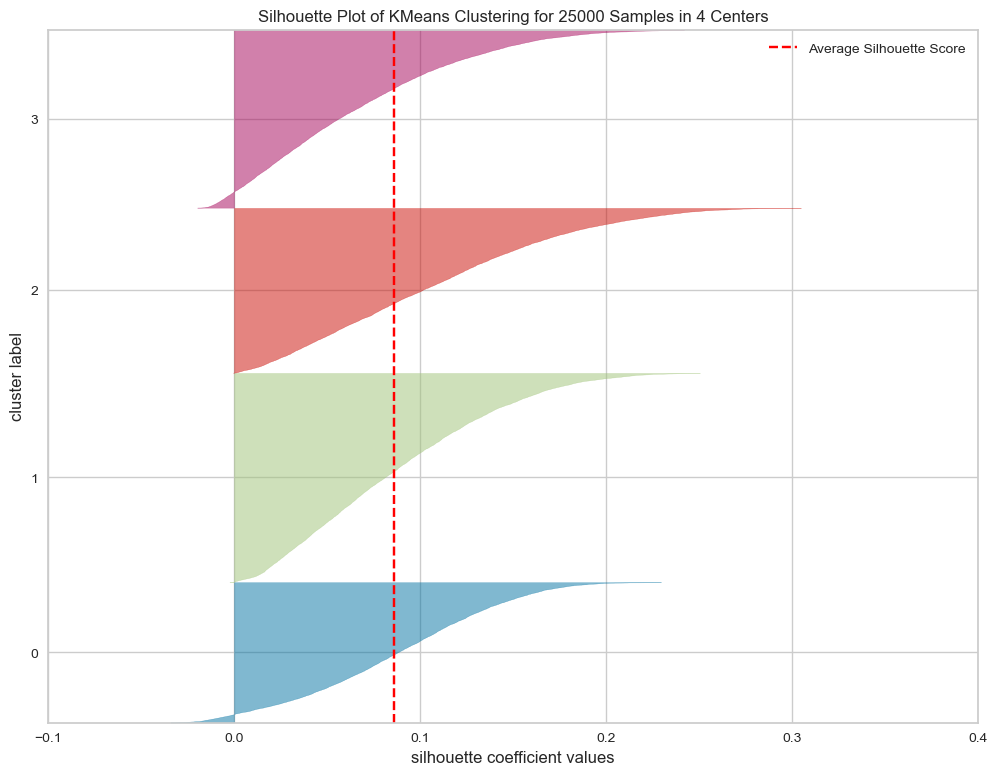

In [49]:
#k = 3/4 Seems to be the ideal value
plt.figure(figsize=(12,9))

k_means = KMeans(n_clusters = 4,random_state=42)
visualizer = SilhouetteVisualizer(k_means, colors='yellowbrick')

visualizer.fit(health_num_scaled)        # Fit the data to the visualizer
visualizer.show();     # Finalize and render the figure

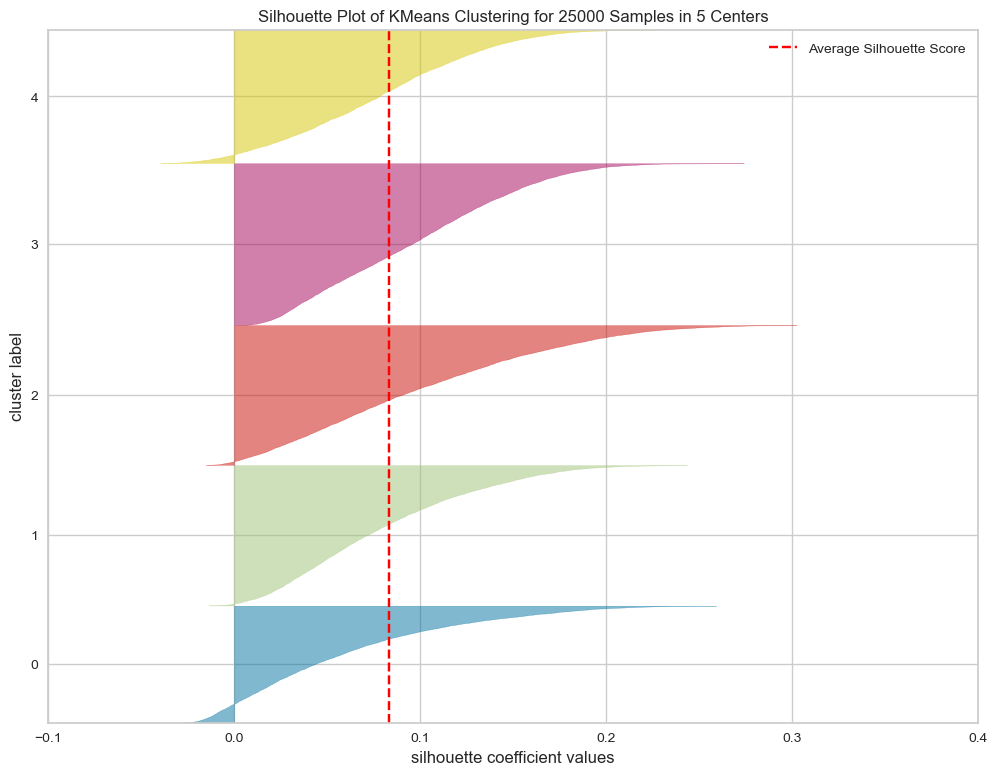

In [50]:
#k = 3/4 Seems to be the ideal value
plt.figure(figsize=(12,9))

k_means = KMeans(n_clusters = 5,random_state=42)
visualizer = SilhouetteVisualizer(k_means, colors='yellowbrick')

visualizer.fit(health_num_scaled)        # Fit the data to the visualizer
visualizer.show();     # Finalize and render the figure

In [51]:
health_clust_df = health_df.copy()

In [52]:
#Obtain Labels for k=4
k_means = KMeans(n_clusters = 5,random_state=42)
k_means.fit(health_num_scaled)
labels = k_means.labels_

health_clust_df["Cluster_Label"] = labels
health_clust_df.head(20)

,years_of_insurance_with_us,regular_checkup_last_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,...,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost,obesity_classification,Cluster_Label
0,3.0,1.0,Yes,Salried,2.0,125 to 150,4866.0,28.0,Yes,No,...,Chennai,67.0,N,Rare,Moderate,1.0,25.0,20978,Obese,1
1,0.0,0.0,No,Student,4.0,150 to 175,6411.0,50.0,No,No,...,Jaipur,58.0,N,Rare,Moderate,3.0,27.0,6170,Obese,2
2,1.0,0.0,No,Business,4.0,200 to 225,4509.0,68.0,No,No,...,Jaipur,73.0,N,Daily,Extreme,0.0,32.0,28382,Obese,0
3,7.0,2.5,No,Business,2.0,175 to 200,6214.0,51.0,No,No,...,Chennai,71.0,Y,Rare,No,3.0,37.0,27148,Obese,4
4,3.0,1.0,No,Student,2.0,150 to 175,4938.0,44.0,No,Yes,...,Bangalore,74.0,N,No,Extreme,0.0,34.0,29616,Obese,3
5,8.0,0.0,No,Salried,2.0,225 to 250,5306.0,39.0,No,No,...,Bhubaneswar,78.0,Y,Rare,No,3.0,13.0,39488,Not Obese,1
6,8.0,0.0,No,Student,4.0,125 to 150,4676.0,40.0,No,No,...,Guwahati,81.0,N,No,Moderate,3.0,16.0,37020,Not Obese,1
7,1.0,0.0,No,Student,4.0,150 to 175,7448.0,46.0,No,No,...,Chennai,72.0,N,Rare,Moderate,0.0,34.0,29616,Obese,3
8,8.0,1.0,No,Salried,4.0,125 to 150,5632.0,45.0,No,No,...,Mumbai,67.0,Y,Rare,No,1.0,12.0,22212,Not Obese,1
9,4.0,2.5,No,Salried,3.0,125 to 150,4130.0,38.0,No,No,...,Nagpur,63.0,N,Daily,Moderate,0.0,12.0,8638,Not Obese,4


In [53]:
clust_col_num = num
clust_col_num.append("Cluster_Label")
clust_col_num

['years_of_insurance_with_us',
 'regular_checkup_last_year',
 'visited_doctor_last_1_year',
 'daily_avg_steps',
 'age',
 'avg_glucose_level',
 'bmi',
 'weight',
 'weight_change_in_last_one_year',
 'fat_percentage',
 'Cluster_Label']

In [54]:
clust_col_cat = cat
clust_col_cat.append("Cluster_Label")
clust_col_cat

['adventure_sports',
 'Occupation',
 'cholesterol_level',
 'heart_decs_history',
 'other_major_decs_history',
 'Gender',
 'smoking_status',
 'Location',
 'covered_by_any_other_company',
 'Alcohol',
 'exercise',
 'obesity_classification',
 'Cluster_Label']

In [55]:
main_clust_profile = health_clust_df[clust_col_num]

In [56]:
clust_profile = main_clust_profile.groupby("Cluster_Label").mean()
clust_profile['freq'] = health_clust_df.Cluster_Label.value_counts().sort_index()
clust_profile.style.highlight_max(color="red")

,years_of_insurance_with_us,regular_checkup_last_year,visited_doctor_last_1_year,daily_avg_steps,age,avg_glucose_level,bmi,weight,weight_change_in_last_one_year,fat_percentage,freq
Cluster_Label,,,,,,,,,,,
0,4.028416,0.310324,4.579683,4564.170732,43.740942,166.876391,31.148007,74.215960,2.108217,30.165049,4223
1,4.061490,0.242018,2.830508,5314.907075,45.541585,166.738668,31.082482,76.010248,1.882933,18.847261,5074
2,4.060768,0.298694,2.907363,5266.046912,44.695764,167.137767,31.482820,61.349367,4.413302,29.824228,5052
3,4.062639,0.237036,2.504878,5460.757659,45.074277,167.134691,31.270569,76.901078,1.804724,35.628102,5843
4,4.233153,2.280574,3.006240,5193.835379,45.339018,169.831739,31.087919,69.031198,2.423253,28.794093,4808


In [57]:
clust_profile.style.highlight_min(color="blue")

,years_of_insurance_with_us,regular_checkup_last_year,visited_doctor_last_1_year,daily_avg_steps,age,avg_glucose_level,bmi,weight,weight_change_in_last_one_year,fat_percentage,freq
Cluster_Label,,,,,,,,,,,
0,4.028416,0.310324,4.579683,4564.170732,43.740942,166.876391,31.148007,74.215960,2.108217,30.165049,4223
1,4.061490,0.242018,2.830508,5314.907075,45.541585,166.738668,31.082482,76.010248,1.882933,18.847261,5074
2,4.060768,0.298694,2.907363,5266.046912,44.695764,167.137767,31.482820,61.349367,4.413302,29.824228,5052
3,4.062639,0.237036,2.504878,5460.757659,45.074277,167.134691,31.270569,76.901078,1.804724,35.628102,5843
4,4.233153,2.280574,3.006240,5193.835379,45.339018,169.831739,31.087919,69.031198,2.423253,28.794093,4808


In [58]:
# Cluster Label Naming
mapping = {0:'Lethargic', 1:'Lean', 2:'Athletic', 3:'Highly Obese', 4:'Hypochondriac'}
health_clust_df["Cluster_Label"] = [mapping[i] for i in health_clust_df["Cluster_Label"]]
health_clust_df.head()

,years_of_insurance_with_us,regular_checkup_last_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,...,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost,obesity_classification,Cluster_Label
0,3.0,1.0,Yes,Salried,2.0,125 to 150,4866.0,28.0,Yes,No,...,Chennai,67.0,N,Rare,Moderate,1.0,25.0,20978,Obese,Lean
1,0.0,0.0,No,Student,4.0,150 to 175,6411.0,50.0,No,No,...,Jaipur,58.0,N,Rare,Moderate,3.0,27.0,6170,Obese,Athletic
2,1.0,0.0,No,Business,4.0,200 to 225,4509.0,68.0,No,No,...,Jaipur,73.0,N,Daily,Extreme,0.0,32.0,28382,Obese,Lethargic
3,7.0,2.5,No,Business,2.0,175 to 200,6214.0,51.0,No,No,...,Chennai,71.0,Y,Rare,No,3.0,37.0,27148,Obese,Hypochondriac
4,3.0,1.0,No,Student,2.0,150 to 175,4938.0,44.0,No,Yes,...,Bangalore,74.0,N,No,Extreme,0.0,34.0,29616,Obese,Highly Obese


In [59]:
health_clust_df[cat].groupby(["Cluster_Label"]).describe().T

Cluster_Label                            Athletic  Highly Obese Hypochondriac  \
adventure_sports             count           5052          5843          4808   
                             unique             2             2             2   
                             top               No            No            No   
                             freq            4833          5302          4391   
Occupation                   count           5052          5843          4808   
                             unique             3             3             3   
                             top          Student      Business       Student   
                             freq            2109          2876          1953   
cholesterol_level            count           5052          5843          4808   
                             unique             5             5             5   
                             top       150 to 175    150 to 175    150 to 175   
                             freq            1813          1851          1725   
heart_decs_history           count           5052          5843          4808   
                             unique             2             2             2   
                             top               No            No            No   
                             freq            4761          5528          4547   
other_major_decs_history     count           5052          5843          4808   
                             unique             2             2             2   
                             top               No            No            No   
                             freq            4551          5268          4366   
Gender                       count           5052          5843          4808   
                             unique             2             2             2   
                             top             Male          Male          Male   
                             freq            3362          3859          3112   
smoking_status               count           5052          5843          4808   
                             unique             4             4             4   
                             top     never smoked  never smoked  never smoked   
                             freq            1893          2160          1765   
Location                     count           5052          5843          4808   
                             unique            15            15            15   
                             top      Bhubaneswar         Surat     Bangalore   
                             freq             385           427           491   
covered_by_any_other_company count           5052          5843          4808   
                             unique             2             2             2   
                             top                N             N             N   
                             freq            3802          3981          3254   
Alcohol                      count           5052          5843          4808   
                             unique             3             3             3   
                             top             Rare          Rare          Rare   
                             freq            2786          3266          2667   
exercise                     count           5052          5843          4808   
                             unique             3             3             3   
                             top         Moderate      Moderate      Moderate   
                             freq            2938          3408          2839   
obesity_classification       count           5052          5843          4808   
                             unique             2             2             2   
                             top            Obese         Obese         Obese   
                             freq            3259          5637          2831   

Cluster_Label                 

In [60]:
health_clust_df[num].groupby(["Cluster_Label"]).describe().T.round(2)

Cluster_Label                         Athletic  Highly Obese  Hypochondriac  \
years_of_insurance_with_us     count   5052.00       5843.00        4808.00   
                               mean       4.06          4.06           4.23   
                               std        2.64          2.60           2.56   
                               min        0.00          0.00           0.00   
                               25%        2.00          2.00           2.00   
                               50%        4.00          4.00           4.00   
                               75%        6.00          6.00           6.00   
                               max        8.00          8.00           8.00   
regular_checkup_last_year      count   5052.00       5843.00        4808.00   
                               mean       0.30          0.24           2.28   
                               std        0.53          0.44           0.29   
                               min        0.00          0.00           1.00   
                               25%        0.00          0.00           2.00   
                               50%        0.00          0.00           2.50   
                               75%        1.00          0.00           2.50   
                               max        2.50          2.50           2.50   
visited_doctor_last_1_year     count   5052.00       5843.00        4808.00   
                               mean       2.91          2.50           3.01   
                               std        0.91          0.72           0.98   
                               min        1.00          0.00           1.00   
                               25%        2.00          2.00           2.00   
                               50%        3.00          2.00           3.00   
                               75%        4.00          3.00           4.00   
                               max        7.00          5.00           7.00   
daily_avg_steps                count   5052.00       5843.00        4808.00   
                               mean    5266.05       5460.76        5193.84   
                               std      940.31        959.71         960.56   
                               min     2762.50       2762.50        2762.50   
                               25%     4630.75       4779.50        4560.00   
                               50%     5158.00       5363.00        5091.50   
                               75%     5784.00       6032.00        5702.00   
                               max     7510.50       7510.50        7510.50   
age                            count   5052.00       5843.00        4808.00   
                               mean      44.70         45.07          45.34   
                               std       15.83         16.14          16.23   
                               min       16.00         16.00          16.00   
                               25%       31.00         31.00          31.00   
                               50%       45.00         45.00          45.00   
                               75%       58.00         59.00          60.00   
                               max       74.00         74.00          74.00   
avg_glucose_level              count   5052.00       5843.00        4808.00   
                               mean     167.14        167.13         169.83   
                               std       63.61         62.25          62.25   
                               min       57.00         57.00          57.00   
                               25%      112.00        114.00         117.00   
                               50%      167.00        167.00         171.00   
                               75%      223.00        220.00         224.00   
                               max      277.00        277.00         277.00   
bmi                            count   5052.00       5843.00        4808.00   
                               mean      31.48    

## Model Building
<a id='Model-Building'></a>

### Finding VIF
<a id='Finding-VIF'></a>

In [61]:
# Define a function to calculate the VIF for each column in the data frame
def calculate_vif(data_frame):
    variables = range(data_frame.shape[1])
    vif = []
    for i in variables:
        vif.append(variance_inflation_factor(data_frame.values, i))
    vif_data = pd.DataFrame({'column': data_frame.columns, 'vif': vif})
    return vif_data

In [62]:
num.pop(-1)
cat.pop(-1);

In [63]:
X_trt = pd.DataFrame(health_df,columns=num)
X_trt.head()

,years_of_insurance_with_us,regular_checkup_last_year,visited_doctor_last_1_year,daily_avg_steps,age,avg_glucose_level,bmi,weight,weight_change_in_last_one_year,fat_percentage
0,3.0,1.0,2.0,4866.0,28.0,97.0,31.2,67.0,1.0,25.0
1,0.0,0.0,4.0,6411.0,50.0,212.0,34.2,58.0,3.0,27.0
2,1.0,0.0,4.0,4509.0,68.0,166.0,40.4,73.0,0.0,32.0
3,7.0,2.5,2.0,6214.0,51.0,109.0,22.9,71.0,3.0,37.0
4,3.0,1.0,2.0,4938.0,44.0,118.0,26.5,74.0,0.0,34.0


In [64]:
calculate_vif(X_trt).sort_values(by = 'vif', ascending = False)

,column,vif
7,weight,37.896031
3,daily_avg_steps,24.775045
6,bmi,17.828776
9,fat_percentage,11.459090
4,age,8.367299
2,visited_doctor_last_1_year,8.197861
5,avg_glucose_level,7.789625
0,years_of_insurance_with_us,3.409032
8,weight_change_in_last_one_year,3.281529
1,regular_checkup_last_year,1.512341


In [65]:
# Iterate over the data frame, removing variables with high VIF values
highest_vif = 999
while highest_vif > 5:
    vif_data = calculate_vif(X_trt)
    highest_vif = vif_data['vif'].max()
    if highest_vif > 5:
        column_to_remove = vif_data.loc[vif_data['vif'] == highest_vif, 'column'].iloc[0]
        X_trt = X_trt.drop(columns=[column_to_remove])
        #health_df.drop(columns=[column_to_remove],inplace=True)
        print('Removed column', column_to_remove, 'with VIF', highest_vif)

Removed column weight with VIF 37.89603097815191
Removed column daily_avg_steps with VIF 19.75005608291131
Removed column bmi with VIF 13.538284172285266
Removed column fat_percentage with VIF 8.580195999615377
Removed column age with VIF 6.361244349599891
Removed column visited_doctor_last_1_year with VIF 5.492837348233674


In [66]:
calculate_vif(X_trt).sort_values(by = 'vif', ascending = False)

,column,vif
2,avg_glucose_level,3.793536
0,years_of_insurance_with_us,2.828716
3,weight_change_in_last_one_year,2.674381
1,regular_checkup_last_year,1.459899


In [67]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_of_insurance_with_us      25000 non-null  float64
 1   regular_checkup_last_year       25000 non-null  float64
 2   adventure_sports                25000 non-null  object 
 3   Occupation                      25000 non-null  object 
 4   visited_doctor_last_1_year      25000 non-null  float64
 5   cholesterol_level               25000 non-null  object 
 6   daily_avg_steps                 25000 non-null  float64
 7   age                             25000 non-null  float64
 8   heart_decs_history              25000 non-null  object 
 9   other_major_decs_history        25000 non-null  object 
 10  Gender                          25000 non-null  object 
 11  avg_glucose_level               25000 non-null  float64
 12  bmi                             

### Scaling
<a id='Scaling'></a>

In [68]:
## Here we are converting sub-groups/ classes into numbers(0 or 1). This is done as algorithm takes only numbers or its a pre-requisite to run a algorithm
## Drop first will ensure redundancy is removed. For multiple class, It also removes multicollinearity(if any)
scaled_health_df = health_df.copy()
scaled_health_df = pd.get_dummies(scaled_health_df, columns=cat,drop_first=True)
scaled_health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_of_insurance_with_us      25000 non-null  float64
 1   regular_checkup_last_year       25000 non-null  float64
 2   visited_doctor_last_1_year      25000 non-null  float64
 3   daily_avg_steps                 25000 non-null  float64
 4   age                             25000 non-null  float64
 5   avg_glucose_level               25000 non-null  float64
 6   bmi                             25000 non-null  float64
 7   weight                          25000 non-null  float64
 8   weight_change_in_last_one_year  25000 non-null  float64
 9   fat_percentage                  25000 non-null  float64
 10  insurance_cost                  25000 non-null  int64  
 11  adventure_sports_Yes            25000 non-null  uint8  
 12  Occupation_Salried              

In [69]:
## Now dataset is ready for linear regression.
# We seperate the dependent and independent variables
X = scaled_health_df.drop('insurance_cost', axis=1)

# Copy target into the y dataframe. 
Y = scaled_health_df[['insurance_cost']]

In [70]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [71]:
X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_of_insurance_with_us      25000 non-null  float64
 1   regular_checkup_last_year       25000 non-null  float64
 2   visited_doctor_last_1_year      25000 non-null  float64
 3   daily_avg_steps                 25000 non-null  float64
 4   age                             25000 non-null  float64
 5   avg_glucose_level               25000 non-null  float64
 6   bmi                             25000 non-null  float64
 7   weight                          25000 non-null  float64
 8   weight_change_in_last_one_year  25000 non-null  float64
 9   fat_percentage                  25000 non-null  float64
 10  adventure_sports_Yes            25000 non-null  float64
 11  Occupation_Salried              25000 non-null  float64
 12  Occupation_Student              

### Train Test Split
<a id='Train-Test-Split'></a>

In [72]:
# Split X and Y into training and test set in 70:30 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3 , random_state=42)

### Linear Regression
<a id='Linear-Regression'></a>

In [73]:
# invoke the LinearRegression function and find the bestfit model on training data

Lin_reg_nosamp = LinearRegression()

In [74]:
# Define the parameter grid for grid search
param_grid = {'fit_intercept': [True, False]}

# Create a grid search object with verbose output
grid_search = GridSearchCV(Lin_reg_nosamp, param_grid, cv=10, verbose=2)

In [75]:
# Fit the grid search object to the data
grid_search.fit(X_train, Y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s
[CV] END ................................fit_int

GridSearchCV(cv=10, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]}, verbose=2)

In [76]:
# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'fit_intercept': True}
Best score:  0.9446659750203737


In [77]:
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name,  grid_search.best_estimator_.coef_[0][idx]))

The coefficient for years_of_insurance_with_us is -27.682232384972252
The coefficient for regular_checkup_last_year is -562.3474286714487
The coefficient for visited_doctor_last_1_year is -63.52866212404679
The coefficient for daily_avg_steps is -9.803109340982823
The coefficient for age is 61.351883800738825
The coefficient for avg_glucose_level is 11.838688908218167
The coefficient for bmi is -35.686725989762444
The coefficient for weight is 13875.847026181435
The coefficient for weight_change_in_last_one_year is 272.55021988483895
The coefficient for fat_percentage is 3.988264568635251
The coefficient for adventure_sports_Yes is 57.64348660184252
The coefficient for Occupation_Salried is 43.071464153575675
The coefficient for Occupation_Student is 37.22657901689702
The coefficient for cholesterol_level_150 to 175 is -23.779789488135158
The coefficient for cholesterol_level_175 to 200 is 20.48405933924134
The coefficient for cholesterol_level_200 to 225 is 25.7906361769789
The coeffi

In [78]:
# Get the t-values and degrees of freedom
t_values = grid_search.best_estimator_.coef_ / np.sqrt(np.diag(np.linalg.inv(np.dot(X_train.T, X_train))))
df_pz = X_train.shape[0] - X_train.shape[1]

# Calculate the P(Z) values
p_values = (1 - t.cdf(np.abs(t_values), df_pz)) * 2

# Print the P(Z) values
print(p_values)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [79]:
# Rounding of to 3 decimals
Lin_reg_nosamp_coef = round(pd.DataFrame(grid_search.best_estimator_.coef_.reshape(1,-1),columns=X_train.columns),3).T
Lin_reg_nosamp_coef.rename(columns = {0:'Coeff'},inplace=True)
Lin_reg_nosamp_coef

,Coeff
years_of_insurance_with_us,-27.682
regular_checkup_last_year,-562.347
visited_doctor_last_1_year,-63.529
daily_avg_steps,-9.803
age,61.352
avg_glucose_level,11.839
bmi,-35.687
weight,13875.847
weight_change_in_last_one_year,272.550
fat_percentage,3.988


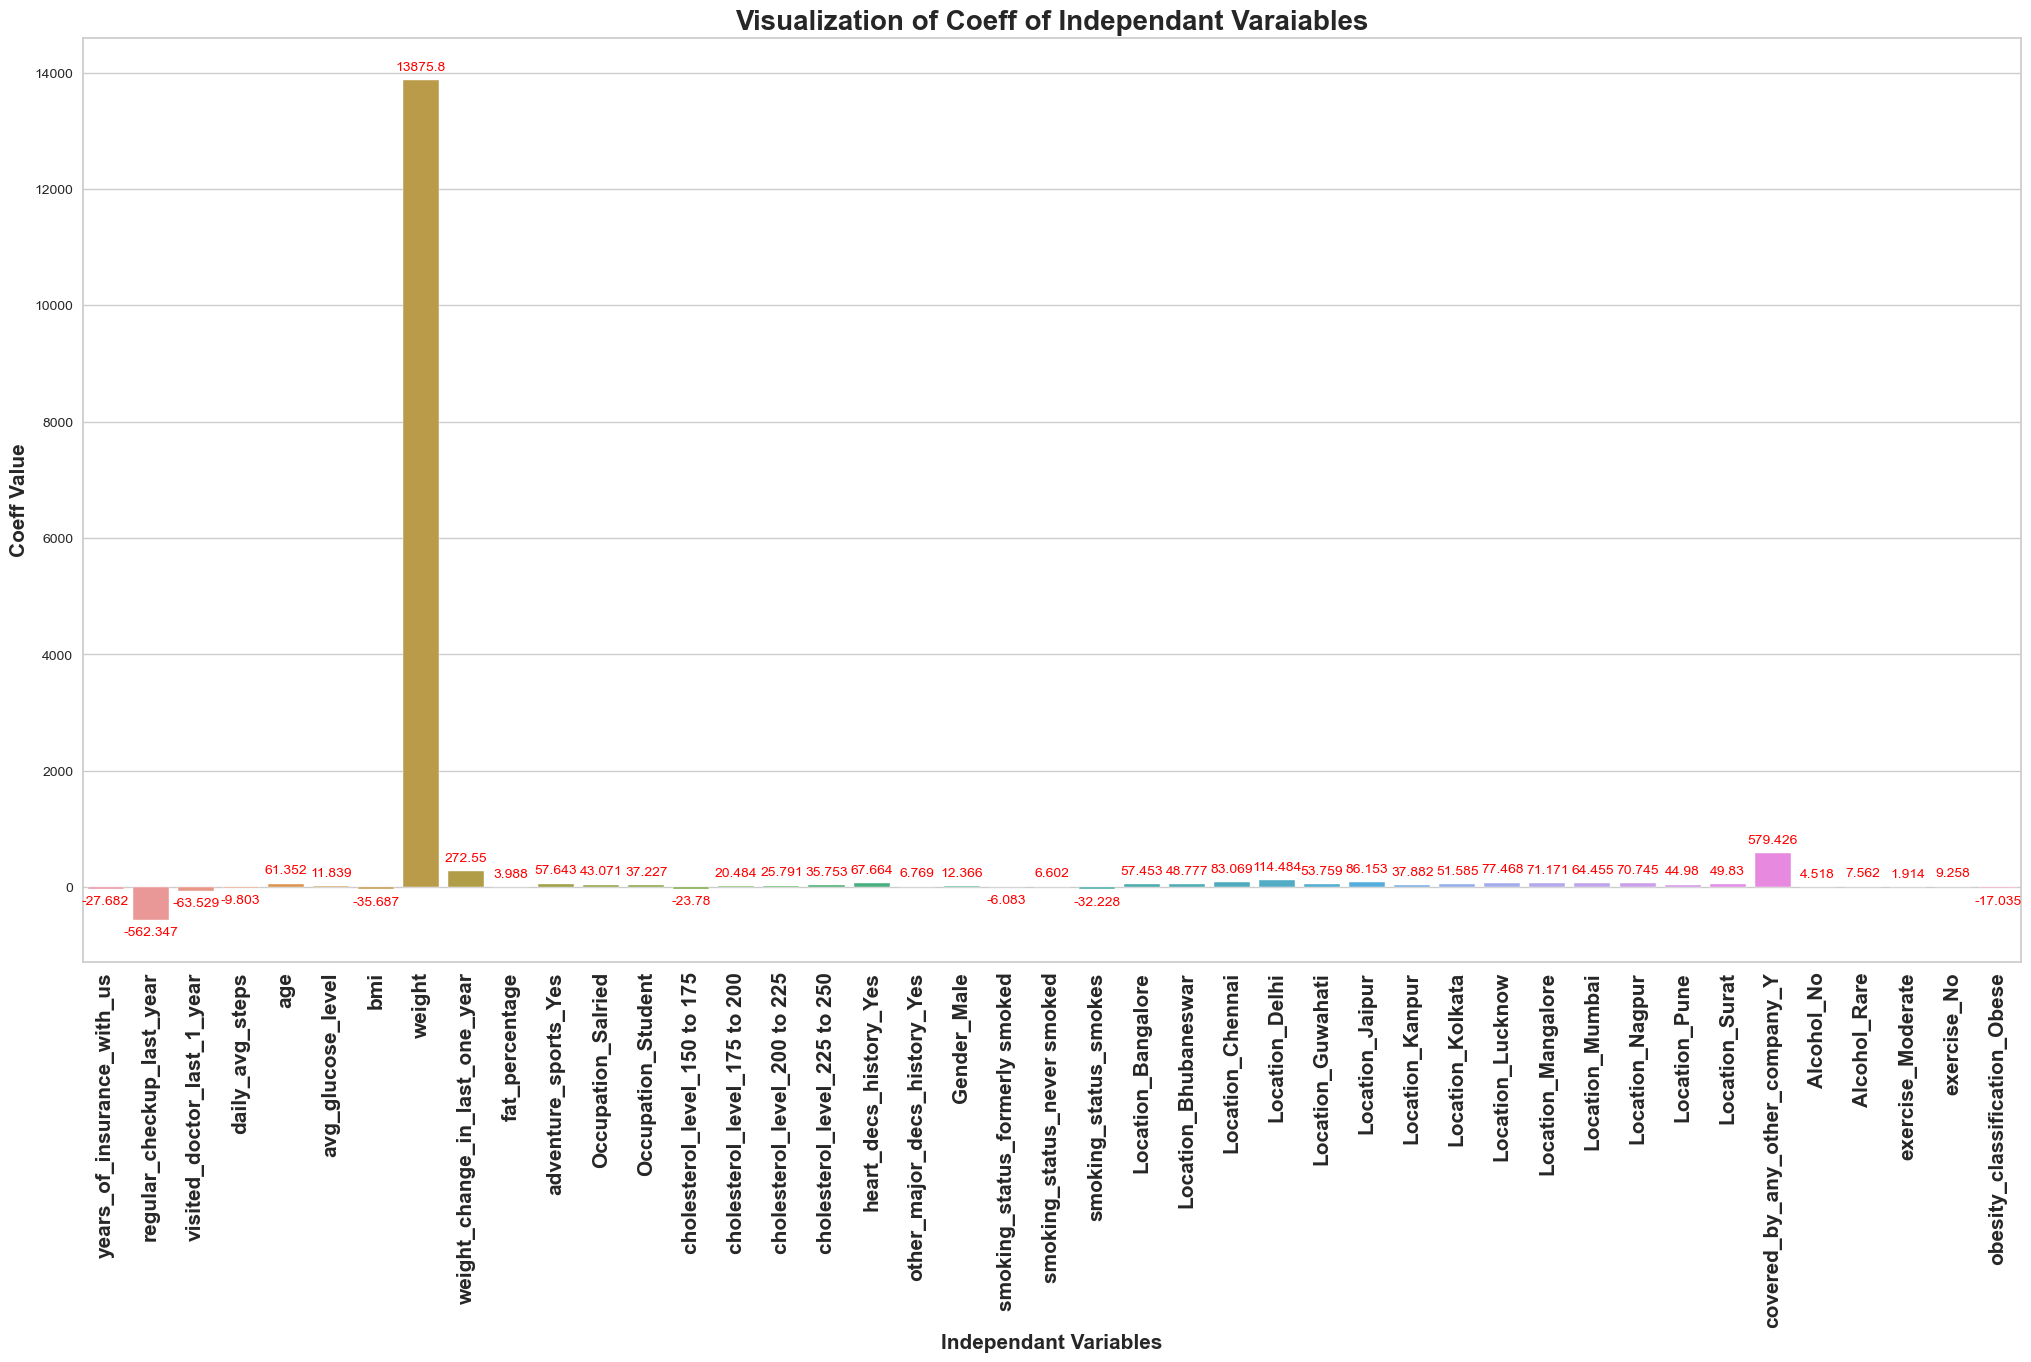

In [80]:
# Visualizing the coefficients
plt.figure(figsize =(25, 12))
plt.title("Visualization of Coeff of Independant Varaiables",fontsize=20, weight="bold")
sns.set_style("whitegrid")
ax=sns.barplot(x = Lin_reg_nosamp_coef.index, y = 'Coeff', data = Lin_reg_nosamp_coef)

#Label the axes and rotate the label of the categories so that it is readable 
plt.xticks(rotation = 90,fontsize=15, weight="bold")
plt.xlabel("Independant Variables",fontsize=15, weight="bold");
plt.ylabel("Coeff Value",fontsize=15, weight="bold");
ax.bar_label(ax.containers[0], label_type='edge', color = 'red',rotation =0, fontsize = 10,padding =5)
plt.show()

In [81]:
# Predict values for train and test sets
y_train_Lin_pred = grid_search.best_estimator_.predict(X_train)
y_test_Lin_pred = grid_search.best_estimator_.predict(X_test)

In [82]:
#RMSE on Training data and Test
# predicted_train=grid_search.best_estimator_.fit(X_train, Y_train).predict(X_train)
Lin_reg_nosamp_train_RMSE = np.sqrt(metrics.mean_squared_error(Y_train,y_train_Lin_pred))

#RMSE on Test data
# predicted_test=grid_search.best_estimator_.fit(X_test, Y_test).predict(X_test)
Lin_reg_nosamp_test_RMSE = np.sqrt(metrics.mean_squared_error(Y_test,y_test_Lin_pred))

In [83]:
# Calculate R-squared for train and test sets
r2_train_nosamp_Lin = r2_score(Y_train, y_train_Lin_pred)
r2_test_nosamp_Lin = r2_score(Y_test, y_test_Lin_pred)

In [84]:
# Calculate Adjusted R-squared for train and test sets
adj_r2_train_nosamp_Lin = 1 - (1-r2_train_nosamp_Lin)*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1)
adj_r2_test_nosamp_Lin = 1 - (1-r2_test_nosamp_Lin)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

In [85]:
# Calculate MAPE for train and test sets
train_linear_nosamp_mape = np.mean(np.abs((Y_train - y_train_Lin_pred) / Y_train)) * 100
test_linear_nosamp_mape = np.mean(np.abs((Y_test - y_test_Lin_pred) / Y_test)) * 100

In [86]:
Reg_RMSE = pd.DataFrame({'Train Set R-sqr': [r2_train_nosamp_Lin], 'Test Set R-sqr': [r2_test_nosamp_Lin],'Train Set R-Adj': [adj_r2_train_nosamp_Lin], 'Test Set R-Adj': [adj_r2_test_nosamp_Lin],'Train Set RMSE': [Lin_reg_nosamp_train_RMSE], 'Test Set RMSE': [Lin_reg_nosamp_test_RMSE],'Train Set MAPE': [train_linear_nosamp_mape[0]], 'Test Set MAPE': [test_linear_nosamp_mape[0]]},index=['Linear Regression'])
Reg_RMSE.round(4)

,Train Set R-sqr,Test Set R-sqr,Train Set R-Adj,Test Set R-Adj,Train Set RMSE,Test Set RMSE,Train Set MAPE,Test Set MAPE
Linear Regression,0.945,0.9444,0.9449,0.9441,3361.9686,3369.6461,15.1483,15.5172


### Polynomial regression
<a id='Polynomial-regression'></a>

In [87]:
# Define pipeline for Polynomial Regression with Ridge regularization
pipeline = Pipeline([("poly_features", PolynomialFeatures(include_bias=False)),
                     ("std_scaler", StandardScaler()),
                     ("ridge_reg", Ridge())])

In [88]:
# Define hyperparameters for grid search
param_grid = {
    "poly_features__degree": [1, 2, 3],
    "ridge_reg__alpha": [0.1, 1, 10, 100]
}

In [89]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error',verbose=2)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ......poly_features__degree=1, ridge_reg__alpha=0.1; total time=   0.0s
[CV] END ......poly_features__degree=1, ridge_reg__alpha=0.1; total time=   0.0s
[CV] END ......poly_features__degree=1, ridge_reg__alpha=0.1; total time=   0.0s
[CV] END ......poly_features__degree=1, ridge_reg__alpha=0.1; total time=   0.0s
[CV] END ......poly_features__degree=1, ridge_reg__alpha=0.1; total time=   0.0s
[CV] END ........poly_features__degree=1, ridge_reg__alpha=1; total time=   0.0s
[CV] END ........poly_features__degree=1, ridge_reg__alpha=1; total time=   0.0s
[CV] END ........poly_features__degree=1, ridge_reg__alpha=1; total time=   0.0s
[CV] END ........poly_features__degree=1, ridge_reg__alpha=1; total time=   0.0s
[CV] END ........poly_features__degree=1, ridge_reg__alpha=1; total time=   0.0s
[CV] END .......poly_features__degree=1, ridge_reg__alpha=10; total time=   0.0s
[CV] END .......poly_features__degree=1, ridge_r

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly_features',
                                        PolynomialFeatures(include_bias=False)),
                                       ('std_scaler', StandardScaler()),
                                       ('ridge_reg', Ridge())]),
             param_grid={'poly_features__degree': [1, 2, 3],
                         'ridge_reg__alpha': [0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error', verbose=2)

In [90]:
# Predict values for train and test sets using the best model
y_train_poly_pred = grid_search.predict(X_train)
y_test_poly_pred = grid_search.predict(X_test)

In [91]:
# Calculate R-squared for train and test sets
r2_train_nosamp_poly = r2_score(Y_train, y_train_poly_pred)
r2_test_nosamp_poly = r2_score(Y_test, y_test_poly_pred)

In [92]:
# Calculate Adjusted R-squared for train and test sets
adj_r2_train_nosamp_poly = 1 - (1-r2_train_nosamp_poly)*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1)
adj_r2_test_nosamp_poly = 1 - (1-r2_test_nosamp_poly)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

In [93]:
# Calculate RMSE values for train and test sets
train_poly_nosamp_rmse = np.sqrt(mean_squared_error(Y_train, y_train_poly_pred))
test_poly_nosamp_rmse = np.sqrt(mean_squared_error(Y_test, y_test_poly_pred))

In [94]:
# Calculate MAPE for train and test sets
train_poly_nosamp_mape = np.mean(np.abs((Y_train - y_train_poly_pred) / Y_train)) * 100
test_poly_nosamp_mape = np.mean(np.abs((Y_test - y_test_poly_pred) / Y_test)) * 100

In [95]:
# Get the best model and extract its coefficients
best_model = grid_search.best_estimator_
best_model

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('std_scaler', StandardScaler()),
                ('ridge_reg', Ridge(alpha=100))])

In [96]:
Reg_RMSE_poly = pd.DataFrame({'Train Set R-sqr': [r2_train_nosamp_poly], 'Test Set R-sqr': [r2_test_nosamp_poly],'Train Set R-Adj': [adj_r2_train_nosamp_poly], 'Test Set R-Adj': [adj_r2_test_nosamp_poly],'Train Set RMSE': [train_poly_nosamp_rmse], 
                              'Test Set RMSE': [test_poly_nosamp_rmse],'Train Set MAPE': [train_poly_nosamp_mape[0]], 'Test Set MAPE': [test_poly_nosamp_mape[0]]},index=['Polynomial Regression'])


Reg_RMSE = pd.concat([Reg_RMSE,Reg_RMSE_poly])
Reg_RMSE.round(4)

,Train Set R-sqr,Test Set R-sqr,Train Set R-Adj,Test Set R-Adj,Train Set RMSE,Test Set RMSE,Train Set MAPE,Test Set MAPE
Linear Regression,0.9450,0.9444,0.9449,0.9441,3361.9686,3369.6461,15.1483,15.5172
Polynomial Regression,0.9522,0.9477,0.9521,0.9474,3133.3756,3269.0469,13.6157,14.3645


### Decision tree Regression
<a id='Decision-tree-regression'></a>

In [97]:
# Fit a Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [98]:
# Predict values for train and test sets
y_train_DT_pred = tree_reg.predict(X_train)
y_test_DT_pred = tree_reg.predict(X_test)

In [99]:
# Calculate R-squared for train and test sets
r2_train_nosamp_DT = r2_score(Y_train, y_train_DT_pred)
r2_test_nosamp_DT = r2_score(Y_test, y_test_DT_pred)

In [100]:
# Calculate Adjusted R-squared for train and test sets
adj_r2_train_nosamp_DT = 1 - (1-r2_train_nosamp_DT)*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1)
adj_r2_test_nosamp_DT = 1 - (1-r2_test_nosamp_DT)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

In [101]:
# Calculate RMSE values for train and test sets
train_DT_nosamp_rmse = np.sqrt(mean_squared_error(Y_train, y_train_DT_pred))
test_DT_nosamp_rmse = np.sqrt(mean_squared_error(Y_test, y_test_DT_pred))

In [102]:
# Calculate MAPE for train and test sets
train_DT_nosamp_mape = np.mean(np.abs((Y_train - y_train_DT_pred.reshape(-1, 1)) / Y_train)) * 100
test_DT_nosamp_mape = np.mean(np.abs((Y_test - y_test_DT_pred.reshape(-1, 1)) / Y_test)) * 100

In [103]:
tree_reg.feature_importances_.reshape(1,-1)

array([[2.97623613e-03, 2.45977692e-03, 1.49556423e-03, 5.85791713e-03,
        5.02488250e-03, 5.32265727e-03, 4.80165208e-03, 9.51484683e-01,
        2.38782422e-03, 2.92666047e-03, 3.93000871e-04, 3.56283128e-04,
        5.53304347e-04, 5.52483701e-04, 3.82759661e-04, 3.76916537e-04,
        2.87583843e-04, 2.55526560e-04, 4.33811220e-04, 5.69333577e-04,
        4.81282484e-04, 7.25341302e-04, 4.96013184e-04, 3.65454453e-04,
        2.77772499e-04, 4.72889520e-04, 3.76484578e-04, 3.68165410e-04,
        3.11314826e-04, 3.35533449e-04, 2.95794694e-04, 2.61553819e-04,
        4.00260356e-04, 3.48372843e-04, 4.01064654e-04, 3.38621521e-04,
        2.79261184e-04, 2.44183111e-03, 4.27151478e-04, 4.57623573e-04,
        5.35271339e-04, 4.69505419e-04, 2.34578869e-04]])

In [104]:
# Create a DataFrame with feature importances
tree_reg_importance = round(pd.DataFrame(tree_reg.feature_importances_.reshape(1, -1), columns=X_train.columns),6).T
tree_reg_importance.rename(columns={0: 'Importance'}, inplace=True)
tree_reg_importance

,Importance
years_of_insurance_with_us,0.002976
regular_checkup_last_year,0.002460
visited_doctor_last_1_year,0.001496
daily_avg_steps,0.005858
age,0.005025
avg_glucose_level,0.005323
bmi,0.004802
weight,0.951485
weight_change_in_last_one_year,0.002388
fat_percentage,0.002927


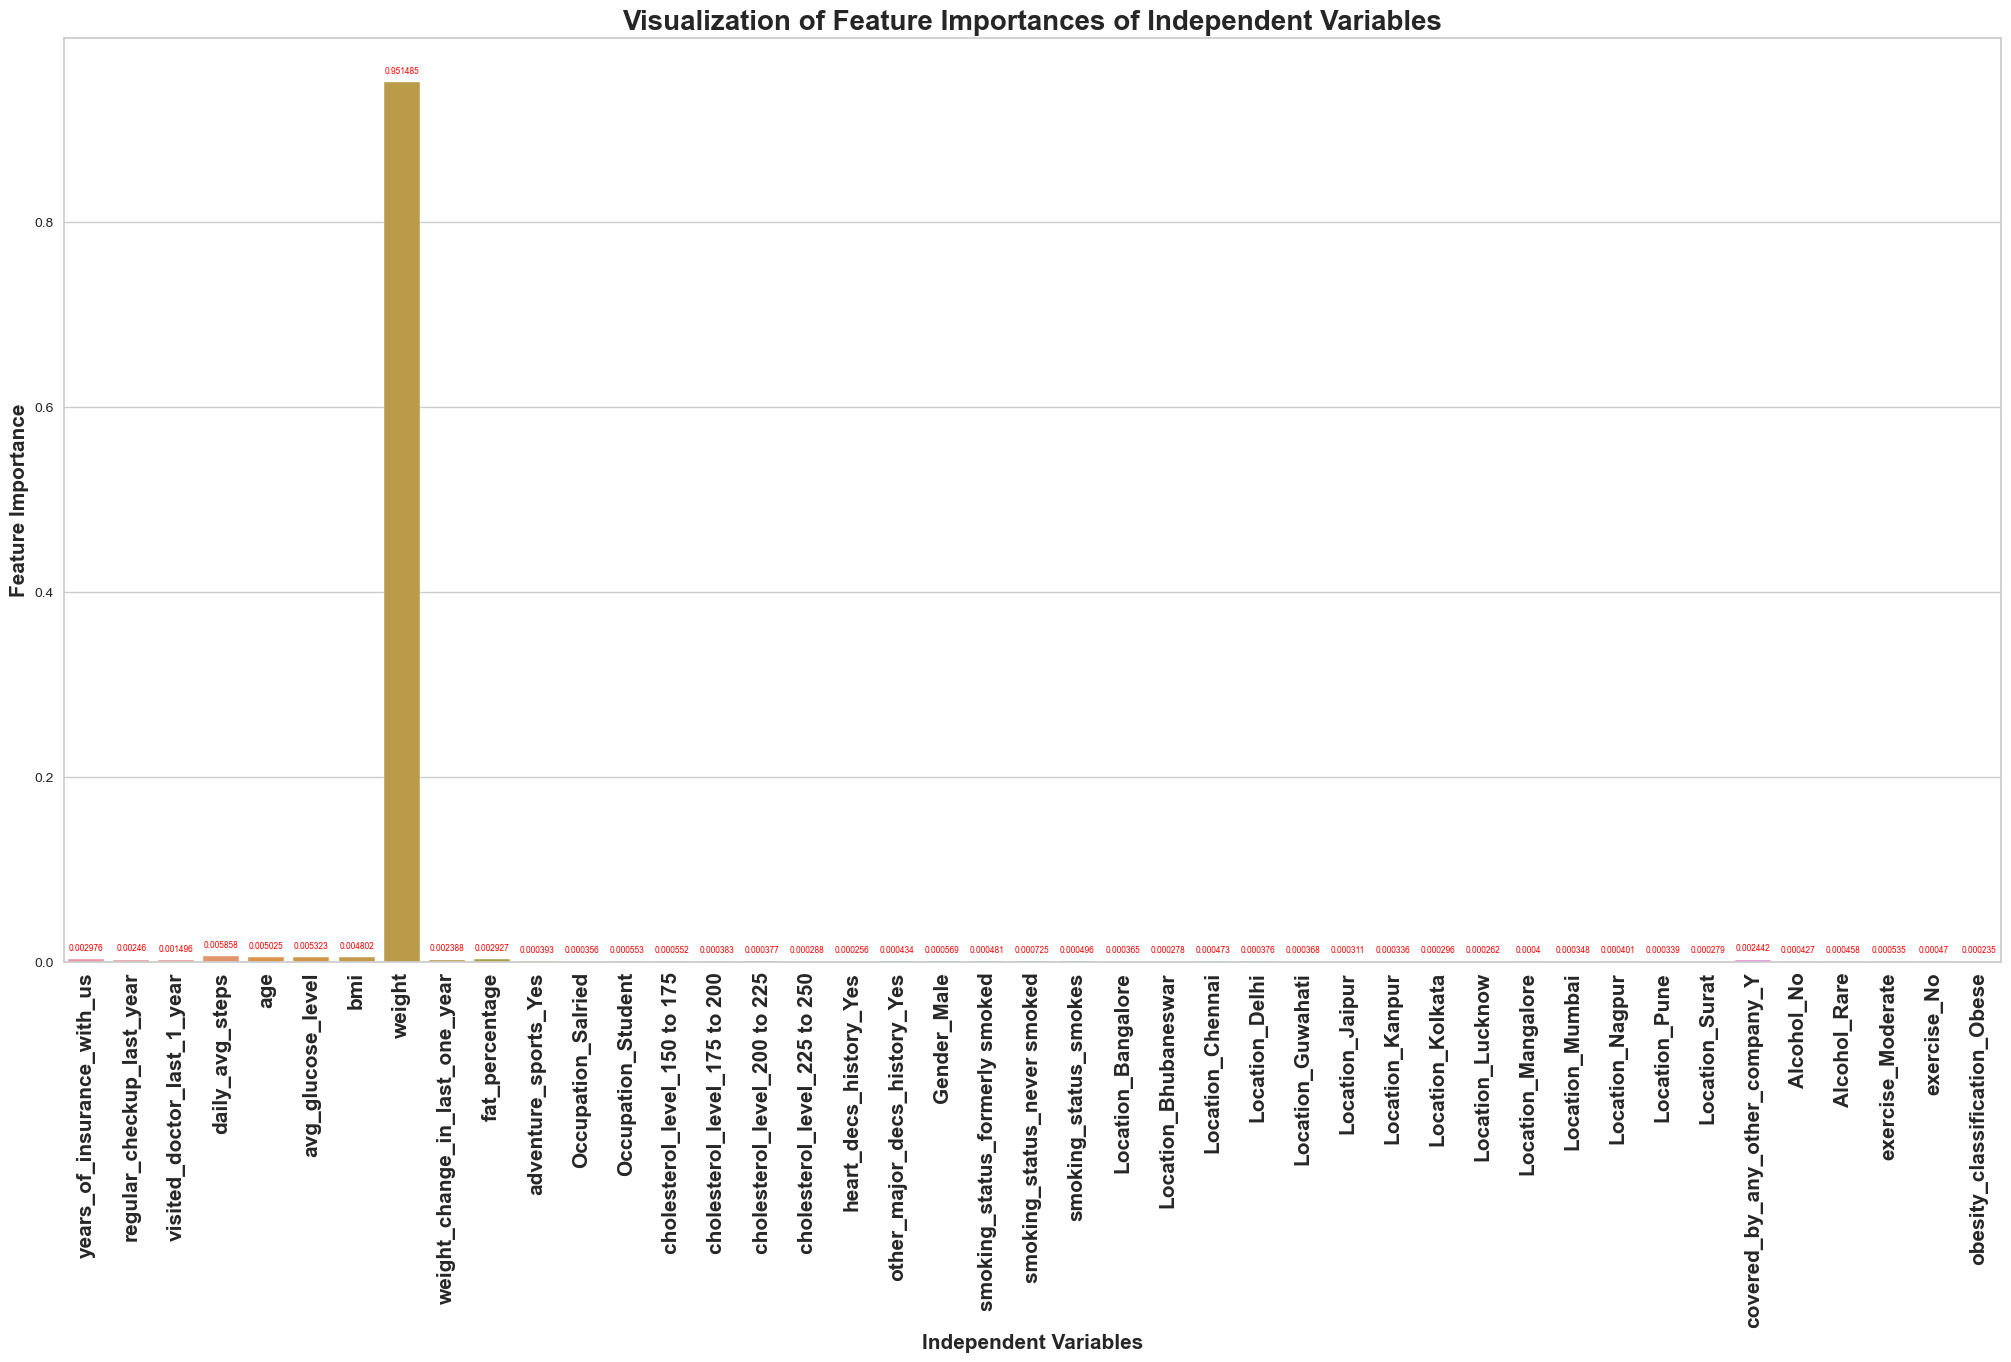

In [105]:
# Visualize the feature importances
plt.figure(figsize=(25, 12))
plt.title("Visualization of Feature Importances of Independent Variables", fontsize=20, weight="bold")
sns.set_style("whitegrid")
ax = sns.barplot(x=tree_reg_importance.index, y='Importance', data=tree_reg_importance)

# Label the axes and rotate the label of the categories so that it is readable
plt.xticks(rotation=90, fontsize=15, weight="bold")
plt.xlabel("Independent Variables", fontsize=15, weight="bold")
plt.ylabel("Feature Importance", fontsize=15, weight="bold")
ax.bar_label(ax.containers[0], label_type='edge', color='red', rotation=0, fontsize=6, padding=5)
plt.show()

In [106]:
Reg_RMSE_DT = pd.DataFrame({'Train Set R-sqr': [r2_train_nosamp_DT], 'Test Set R-sqr': [r2_test_nosamp_DT],'Train Set R-Adj': [adj_r2_train_nosamp_DT], 'Test Set R-Adj': [adj_r2_test_nosamp_DT],
                            'Train Set RMSE': [train_DT_nosamp_rmse], 'Test Set RMSE': [test_DT_nosamp_rmse],'Train Set MAPE': [train_DT_nosamp_mape[0]], 'Test Set MAPE': [test_DT_nosamp_mape[0]]},index=['Decision Tree Regression'])


Reg_RMSE = pd.concat([Reg_RMSE,Reg_RMSE_DT])
Reg_RMSE.round(4)

,Train Set R-sqr,Test Set R-sqr,Train Set R-Adj,Test Set R-Adj,Train Set RMSE,Test Set RMSE,Train Set MAPE,Test Set MAPE
Linear Regression,0.9450,0.9444,0.9449,0.9441,3361.9686,3369.6461,15.1483,15.5172
Polynomial Regression,0.9522,0.9477,0.9521,0.9474,3133.3756,3269.0469,13.6157,14.3645
Decision Tree Regression,1.0000,0.9081,1.0000,0.9076,0.0000,4331.9786,0.0000,16.1633


### XG Boost
<a id='XG-Boost-nosamp'></a>

In [107]:
# Fit an XGBRegressor
xgb_reg = XGBRegressor(random_state=42, objective="reg:squarederror")
xgb_reg.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [108]:
# Predict values for train and test sets
y_train_XG_pred = xgb_reg.predict(X_train)
y_test_XG_pred = xgb_reg.predict(X_test)

In [109]:
# Calculate R-squared for train and test sets
r2_train_nosamp_XG = r2_score(Y_train, y_train_XG_pred)
r2_test_nosamp_XG = r2_score(Y_test, y_test_XG_pred)

In [110]:
# Calculate Adjusted R-squared for train and test sets
adj_r2_train_nosamp_XG = 1 - (1-r2_train_nosamp_XG)*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1)
adj_r2_test_nosamp_XG = 1 - (1-r2_test_nosamp_XG)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

In [111]:
# Calculate RMSE values for train and test sets
train_XG_nosamp_rmse = np.sqrt(mean_squared_error(Y_train, y_train_XG_pred))
test_XG_nosamp_rmse = np.sqrt(mean_squared_error(Y_test, y_test_XG_pred))

In [112]:
# Calculate MAPE for train and test sets
train_XG_nosamp_mape = np.mean(np.abs((Y_train - y_train_XG_pred.reshape(-1, 1)) / Y_train)) * 100
test_XG_nosamp_mape = np.mean(np.abs((Y_test - y_test_XG_pred.reshape(-1, 1)) / Y_test)) * 100

In [113]:
# Create a DataFrame with feature importances
xgb_reg_importance = round(pd.DataFrame(xgb_reg.feature_importances_.reshape(1, -1), columns=X_train.columns), 4).T
xgb_reg_importance.rename(columns={0: 'Importance'}, inplace=True)

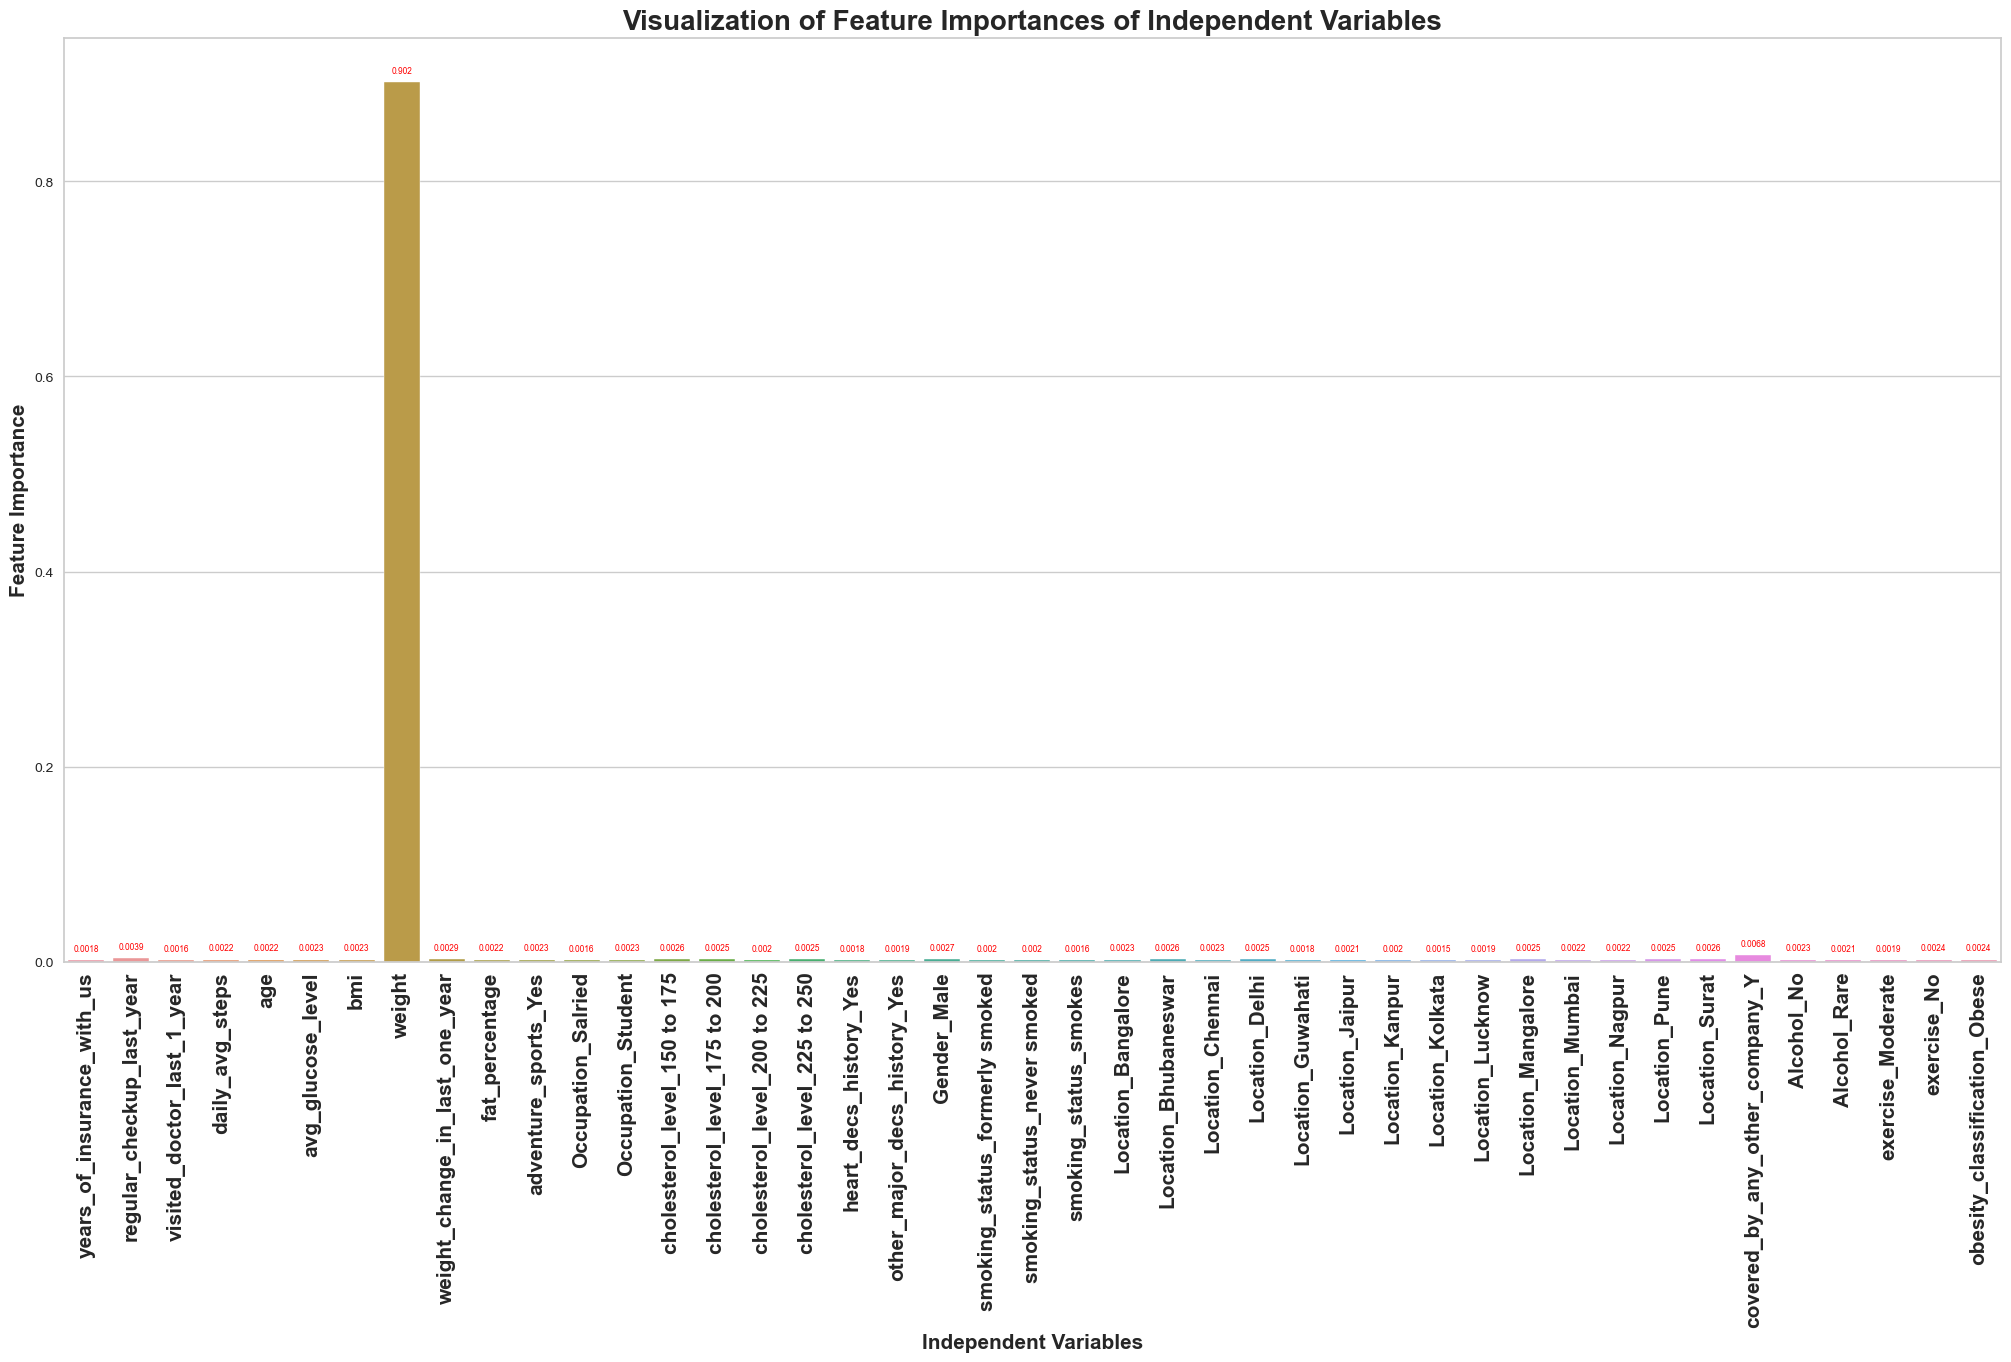

In [114]:
# Visualize the feature importances
plt.figure(figsize=(25, 12))
plt.title("Visualization of Feature Importances of Independent Variables", fontsize=20, weight="bold")
sns.set_style("whitegrid")
ax = sns.barplot(x=xgb_reg_importance.index, y='Importance', data=xgb_reg_importance)

# Label the axes and rotate the label of the categories so that it is readable
plt.xticks(rotation=90, fontsize=15, weight="bold")
plt.xlabel("Independent Variables", fontsize=15, weight="bold")
plt.ylabel("Feature Importance", fontsize=15, weight="bold")
ax.bar_label(ax.containers[0], label_type='edge', color='red', rotation=0, fontsize=6, padding=5)
plt.show()

In [115]:
Reg_RMSE_XG = pd.DataFrame({'Train Set R-sqr': [r2_train_nosamp_XG], 'Test Set R-sqr': [r2_test_nosamp_XG],'Train Set R-Adj': [adj_r2_train_nosamp_XG], 'Test Set R-Adj': [adj_r2_test_nosamp_XG],
                            'Train Set RMSE': [train_XG_nosamp_rmse], 'Test Set RMSE': [test_XG_nosamp_rmse],'Train Set MAPE': [train_XG_nosamp_mape[0]], 'Test Set MAPE': [test_XG_nosamp_mape[0]]},index=['XG Boost Regression'])


Reg_RMSE = pd.concat([Reg_RMSE,Reg_RMSE_XG])
Reg_RMSE.round(4)

,Train Set R-sqr,Test Set R-sqr,Train Set R-Adj,Test Set R-Adj,Train Set RMSE,Test Set RMSE,Train Set MAPE,Test Set MAPE
Linear Regression,0.9450,0.9444,0.9449,0.9441,3361.9686,3369.6461,15.1483,15.5172
Polynomial Regression,0.9522,0.9477,0.9521,0.9474,3133.3756,3269.0469,13.6157,14.3645
Decision Tree Regression,1.0000,0.9081,1.0000,0.9076,0.0000,4331.9786,0.0000,16.1633
XG Boost Regression,0.9771,0.9508,0.9771,0.9505,2168.3358,3168.6030,8.5768,12.6624


## Ensemble Models
<a id='Ensemble-Models'></a>

### Random Forest
<a id='Random-Forest'></a>

In [116]:
# Fit a RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [117]:
# Predict values for train and test sets
y_train_RF_pred = rf_reg.predict(X_train)
y_test_RF_pred = rf_reg.predict(X_test)

In [118]:
# Calculate R-squared for train and test sets
r2_train_nosamp_RF = r2_score(Y_train, y_train_RF_pred)
r2_test_nosamp_RF = r2_score(Y_test, y_test_RF_pred)

In [119]:
# Calculate Adjusted R-squared for train and test sets
adj_r2_train_nosamp_RF = 1 - (1-r2_train_nosamp_RF)*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1)
adj_r2_test_nosamp_RF = 1 - (1-r2_test_nosamp_RF)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

In [120]:
# Calculate RMSE values for train and test sets
train_RF_nosamp_rmse = np.sqrt(mean_squared_error(Y_train, y_train_RF_pred))
test_RF_nosamp_rmse = np.sqrt(mean_squared_error(Y_test, y_test_RF_pred))

In [121]:
# Calculate MAPE for train and test sets
train_RF_nosamp_mape = np.mean(np.abs((Y_train - y_train_RF_pred.reshape(-1, 1)) / Y_train)) * 100
test_RF_nosamp_mape = np.mean(np.abs((Y_test - y_test_RF_pred.reshape(-1, 1)) / Y_test)) * 100

In [122]:
# Create a DataFrame with feature importances
rf_reg_importance = round(pd.DataFrame(rf_reg.feature_importances_.reshape(1, -1), columns=X_train.columns), 4).T
rf_reg_importance.rename(columns={0: 'Importance'}, inplace=True)

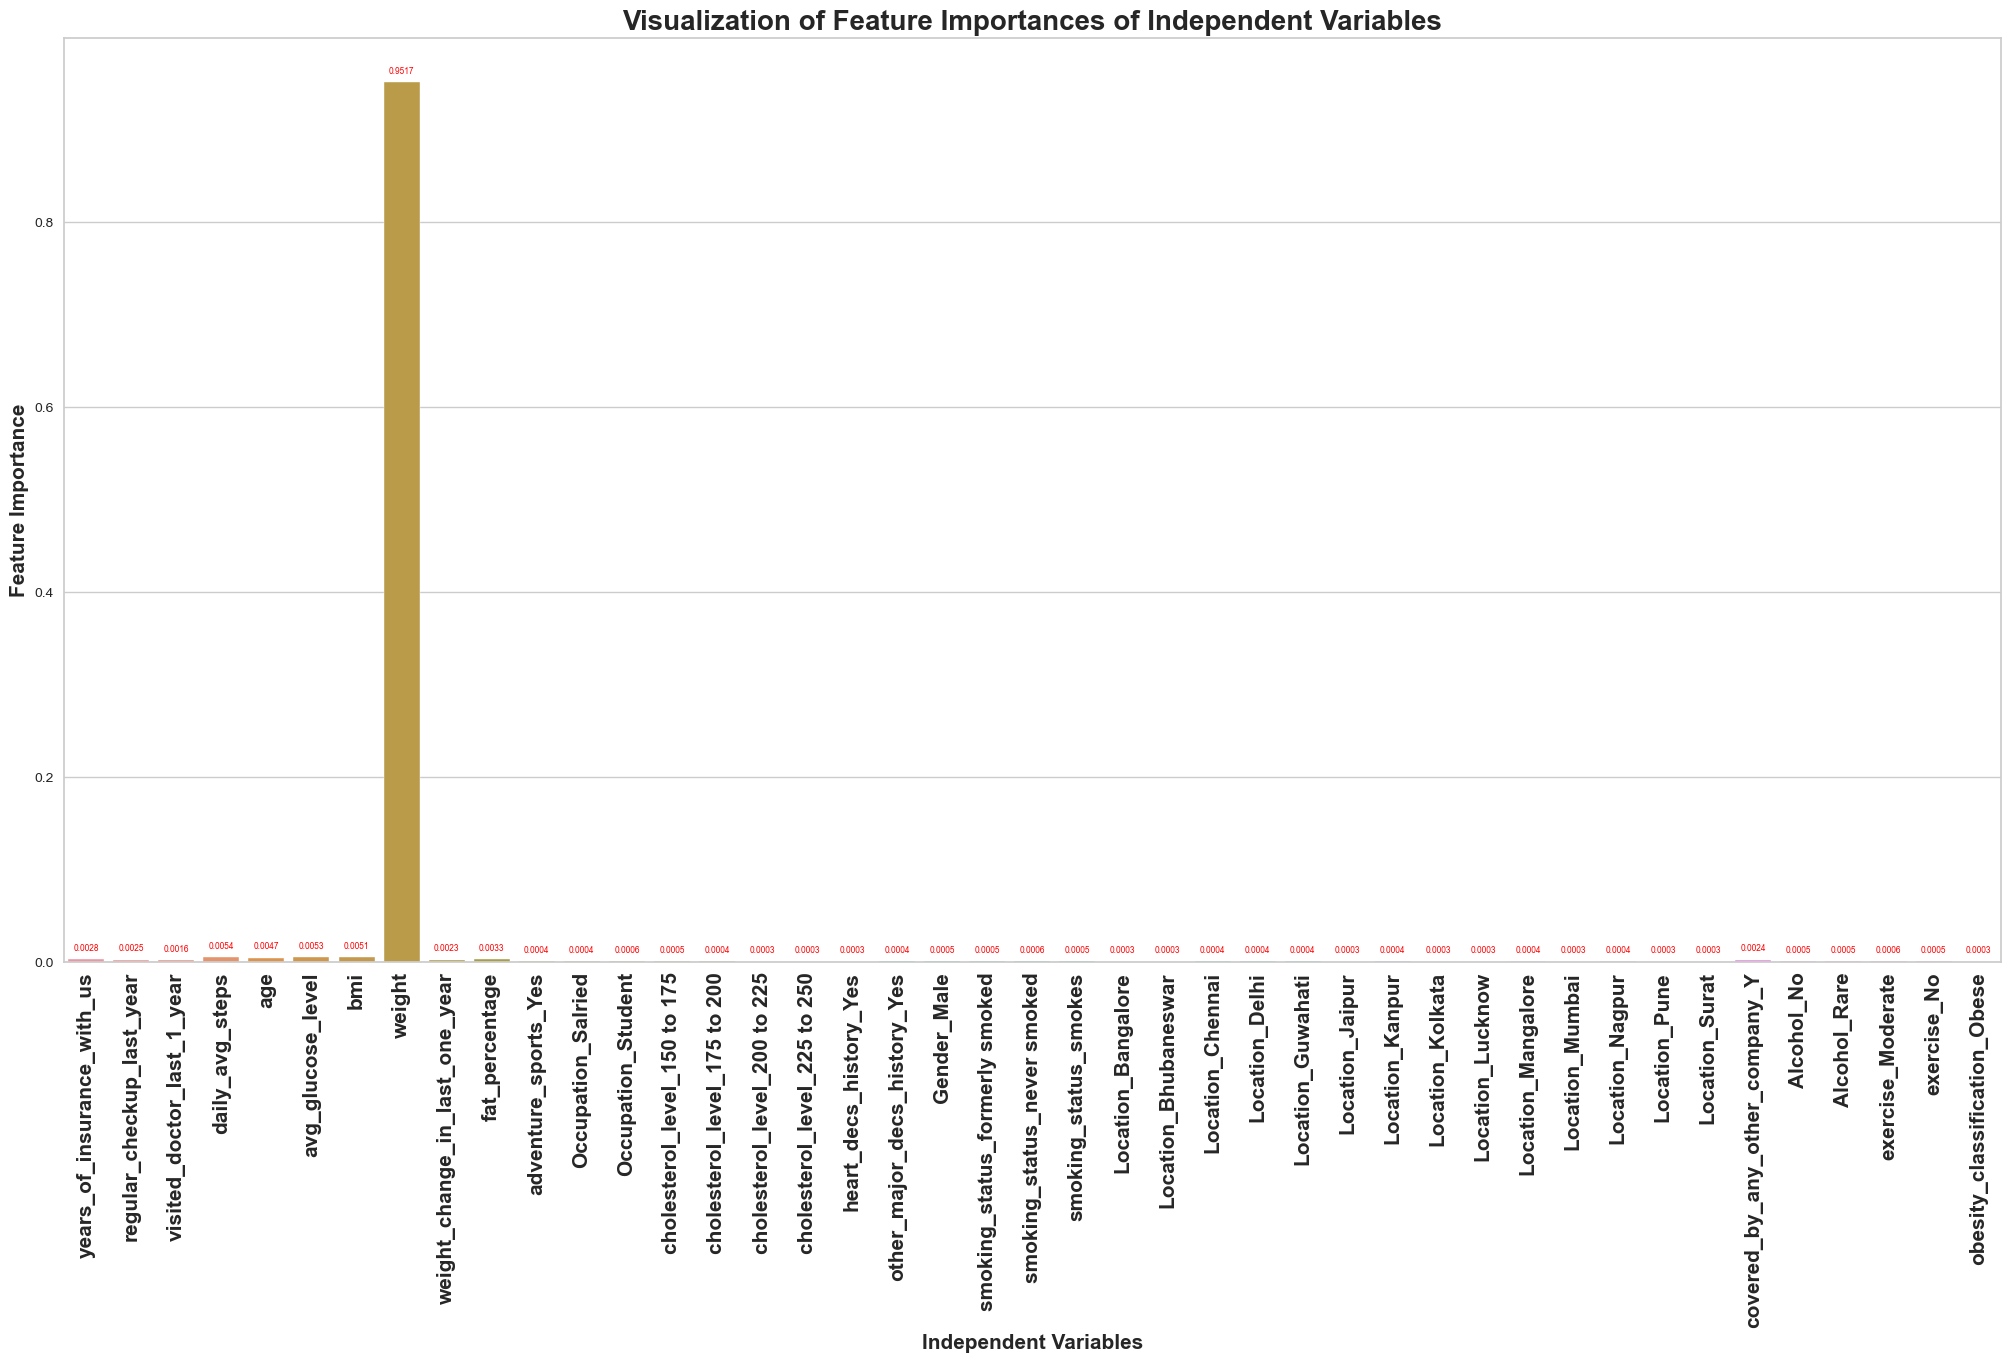

In [123]:
# Visualize the feature importances
plt.figure(figsize=(25, 12))
plt.title("Visualization of Feature Importances of Independent Variables", fontsize=20, weight="bold")
sns.set_style("whitegrid")
ax = sns.barplot(x=rf_reg_importance.index, y='Importance', data=rf_reg_importance)

# Label the axes and rotate the label of the categories so that it is readable
plt.xticks(rotation=90, fontsize=15, weight="bold")
plt.xlabel("Independent Variables", fontsize=15, weight="bold")
plt.ylabel("Feature Importance", fontsize=15, weight="bold")
ax.bar_label(ax.containers[0], label_type='edge', color='red', rotation=0, fontsize=6, padding=5)
plt.show()


In [124]:
# Add it into a dataframe storing all the RMSE and MAPE
Reg_RMSE_RF = pd.DataFrame({'Train Set R-sqr': [r2_train_nosamp_RF], 'Test Set R-sqr': [r2_test_nosamp_RF],'Train Set R-Adj': [adj_r2_train_nosamp_RF], 'Test Set R-Adj': [adj_r2_test_nosamp_RF],
                            'Train Set RMSE': [train_RF_nosamp_rmse], 'Test Set RMSE': [test_RF_nosamp_rmse],'Train Set MAPE': [train_RF_nosamp_mape[0]], 'Test Set MAPE': [test_RF_nosamp_mape[0]]},index=['Random Forest Regression'])

Reg_RMSE = pd.concat([Reg_RMSE, Reg_RMSE_RF])
Reg_RMSE.round(4)

,Train Set R-sqr,Test Set R-sqr,Train Set R-Adj,Test Set R-Adj,Train Set RMSE,Test Set RMSE,Train Set MAPE,Test Set MAPE
Linear Regression,0.9450,0.9444,0.9449,0.9441,3361.9686,3369.6461,15.1483,15.5172
Polynomial Regression,0.9522,0.9477,0.9521,0.9474,3133.3756,3269.0469,13.6157,14.3645
Decision Tree Regression,1.0000,0.9081,1.0000,0.9076,0.0000,4331.9786,0.0000,16.1633
XG Boost Regression,0.9771,0.9508,0.9771,0.9505,2168.3358,3168.6030,8.5768,12.6624
Random Forest Regression,0.9933,0.9528,0.9933,0.9525,1175.9821,3105.8911,4.5825,12.2049


### Gradient Boosting
<a id='Gradient-Boosting'></a>

In [125]:
# Fit a GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train, Y_train)

GradientBoostingRegressor(random_state=42)

In [126]:

# Predict values for train and test sets
y_train_GB_pred = gb_reg.predict(X_train)
y_test_GB_pred = gb_reg.predict(X_test)

In [127]:
# Calculate R-squared for train and test sets
r2_train_nosamp_GB = r2_score(Y_train, y_train_GB_pred)
r2_test_nosamp_GB = r2_score(Y_test, y_test_GB_pred)

In [128]:
# Calculate Adjusted R-squared for train and test sets
adj_r2_train_nosamp_GB = 1 - (1-r2_train_nosamp_GB)*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1)
adj_r2_test_nosamp_GB = 1 - (1-r2_test_nosamp_GB)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

In [129]:
# Calculate RMSE values for train and test sets
train_GB_nosamp_rmse = np.sqrt(mean_squared_error(Y_train, y_train_GB_pred))
test_GB_nosamp_rmse = np.sqrt(mean_squared_error(Y_test, y_test_GB_pred))

In [130]:
# Calculate MAPE for train and test sets
train_GB_nosamp_mape = np.mean(np.abs((Y_train - y_train_GB_pred.reshape(-1, 1)) / Y_train)) * 100
test_GB_nosamp_mape = np.mean(np.abs((Y_test - y_test_GB_pred.reshape(-1, 1)) / Y_test)) * 100

In [131]:
# Create a DataFrame with feature importances
gb_reg_importance = round(pd.DataFrame(gb_reg.feature_importances_.reshape(1, -1), columns=X_train.columns), 4).T
gb_reg_importance.rename(columns={0: 'Importance'}, inplace=True)

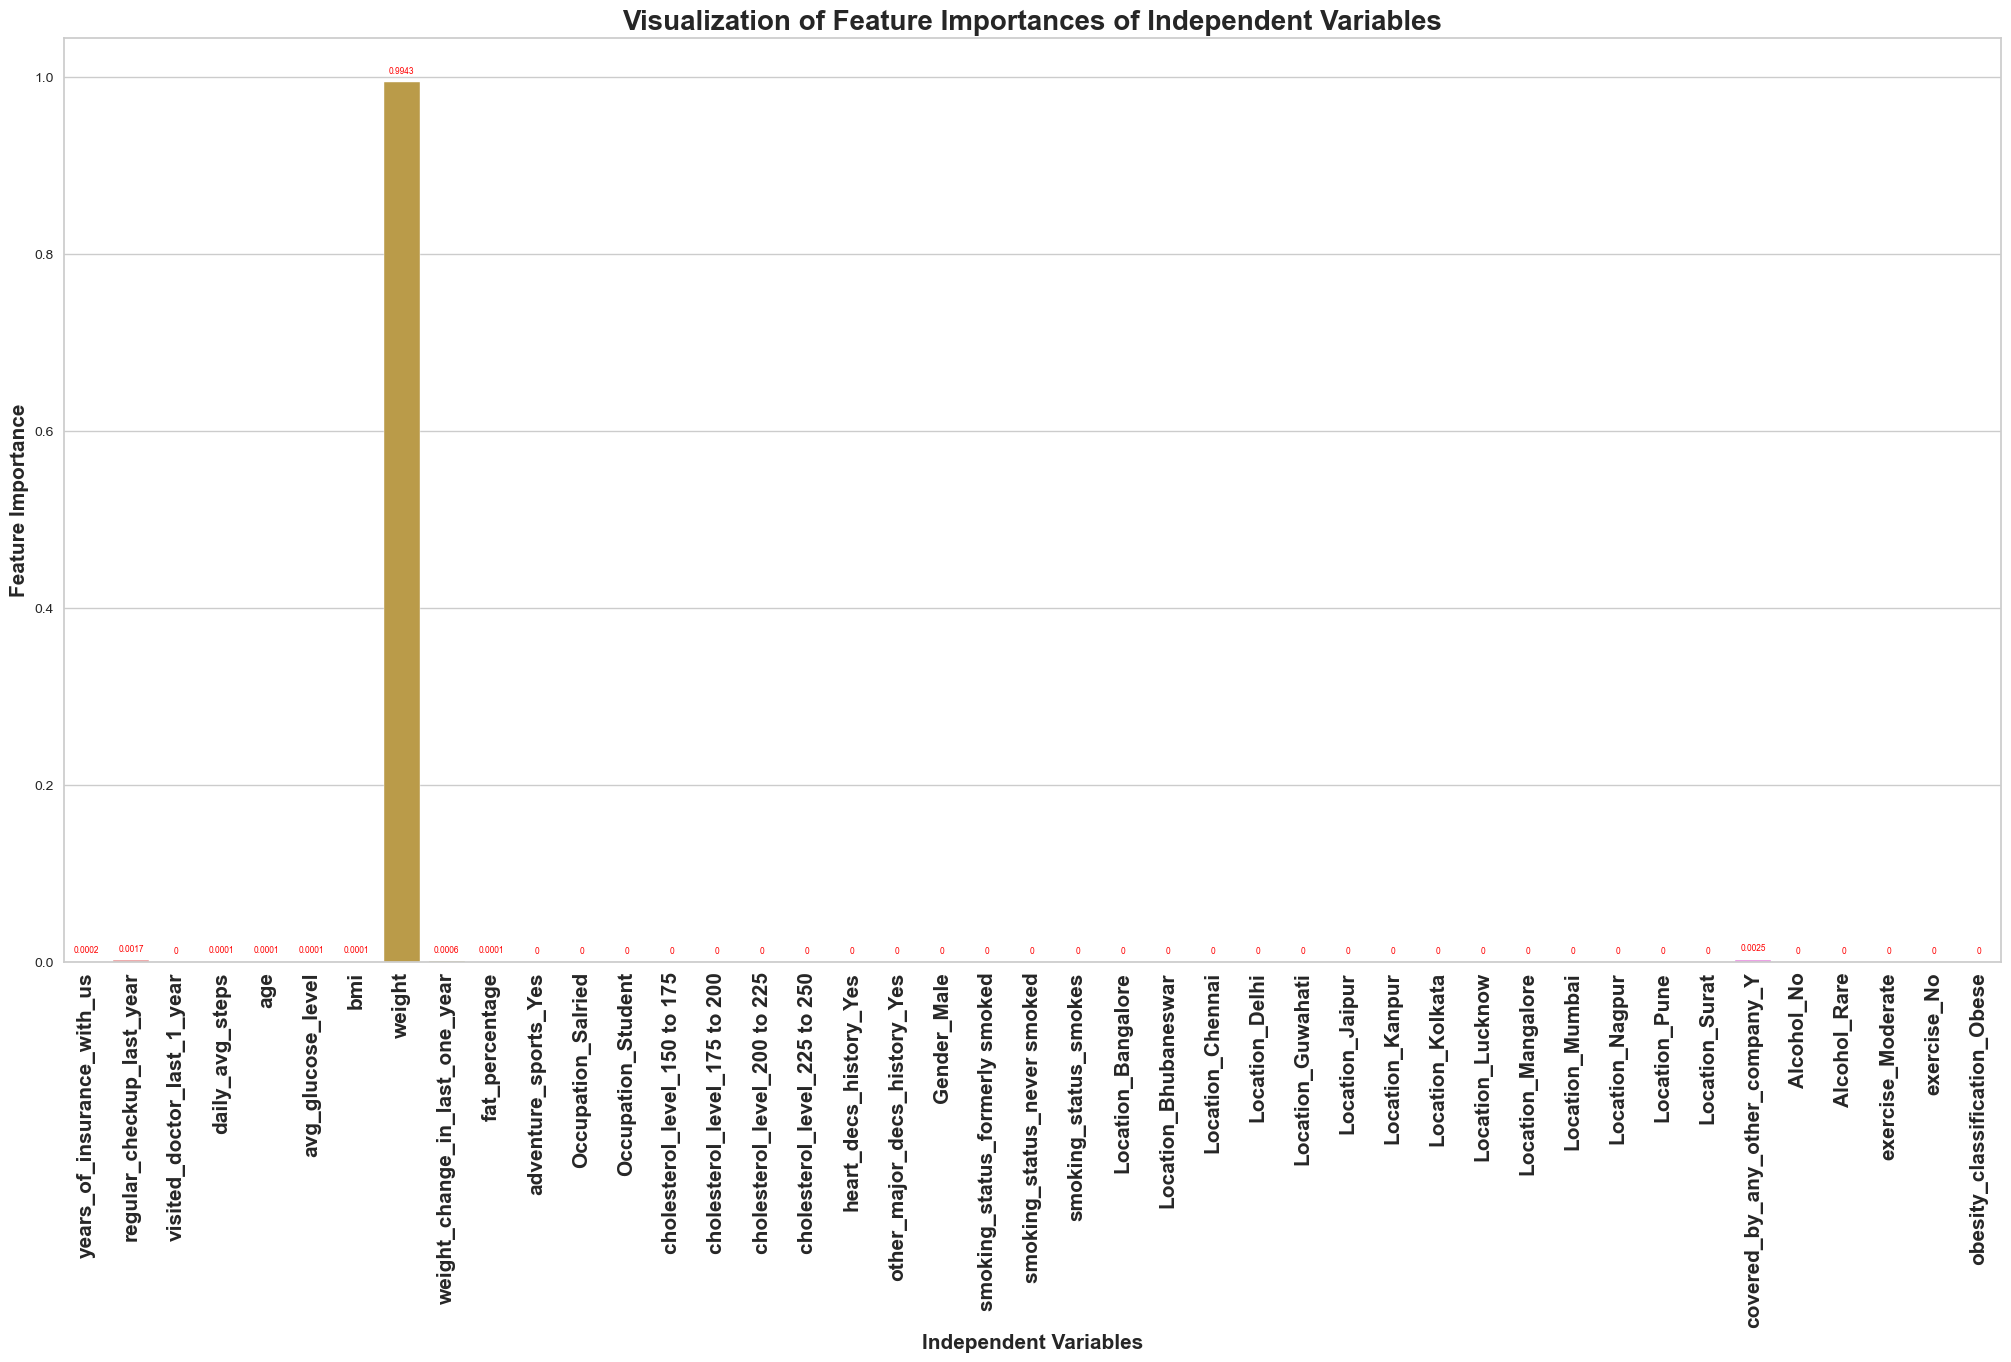

In [132]:
# Visualize the feature importances
plt.figure(figsize=(25, 12))
plt.title("Visualization of Feature Importances of Independent Variables", fontsize=20, weight="bold")
sns.set_style("whitegrid")
ax = sns.barplot(x=gb_reg_importance.index, y='Importance', data=gb_reg_importance)

# Label the axes and rotate the label of the categories so that it is readable
plt.xticks(rotation=90, fontsize=15, weight="bold")
plt.xlabel("Independent Variables", fontsize=15, weight="bold")
plt.ylabel("Feature Importance", fontsize=15, weight="bold")
ax.bar_label(ax.containers[0], label_type='edge', color='red', rotation=0, fontsize=6, padding=5)
plt.show()

In [133]:
# Add it into a dataframe storing all the RMSE and MAPE
Reg_RMSE_GB = pd.DataFrame({'Train Set R-sqr': [r2_train_nosamp_GB], 'Test Set R-sqr': [r2_test_nosamp_GB],'Train Set R-Adj': [adj_r2_train_nosamp_GB], 'Test Set R-Adj': [adj_r2_test_nosamp_GB],
                            'Train Set RMSE': [train_GB_nosamp_rmse], 'Test Set RMSE': [test_GB_nosamp_rmse],'Train Set MAPE': [train_GB_nosamp_mape[0]], 'Test Set MAPE': [test_GB_nosamp_mape[0]]},index=['Gradient Boosting Regression'])

Reg_RMSE = pd.concat([Reg_RMSE, Reg_RMSE_GB])
Reg_RMSE.round(4)

,Train Set R-sqr,Test Set R-sqr,Train Set R-Adj,Test Set R-Adj,Train Set RMSE,Test Set RMSE,Train Set MAPE,Test Set MAPE
Linear Regression,0.9450,0.9444,0.9449,0.9441,3361.9686,3369.6461,15.1483,15.5172
Polynomial Regression,0.9522,0.9477,0.9521,0.9474,3133.3756,3269.0469,13.6157,14.3645
Decision Tree Regression,1.0000,0.9081,1.0000,0.9076,0.0000,4331.9786,0.0000,16.1633
XG Boost Regression,0.9771,0.9508,0.9771,0.9505,2168.3358,3168.6030,8.5768,12.6624
Random Forest Regression,0.9933,0.9528,0.9933,0.9525,1175.9821,3105.8911,4.5825,12.2049
Gradient Boosting Regression,0.9565,0.9555,0.9564,0.9553,2990.6918,3013.7010,11.9569,12.1023


### Ada Boost
<a id='Ada-Boost'></a>

In [134]:
# Fit an AdaBoostRegressor
ada_reg = AdaBoostRegressor(random_state=42)
ada_reg.fit(X_train, Y_train)

AdaBoostRegressor(random_state=42)

In [135]:
# Predict values for train and test sets
y_train_ADA_pred = ada_reg.predict(X_train)
y_test_ADA_pred = ada_reg.predict(X_test)

In [136]:
# Calculate R-squared for train and test sets
r2_train_nosamp_ADA = r2_score(Y_train, y_train_ADA_pred)
r2_test_nosamp_ADA = r2_score(Y_test, y_test_ADA_pred)

In [137]:
# Calculate Adjusted R-squared for train and test sets
adj_r2_train_nosamp_ADA = 1 - (1-r2_train_nosamp_ADA)*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1)
adj_r2_test_nosamp_ADA = 1 - (1-r2_test_nosamp_ADA)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

In [138]:
# Calculate RMSE values for train and test sets
train_ADA_nosamp_rmse = np.sqrt(mean_squared_error(Y_train, y_train_ADA_pred))
test_ADA_nosamp_rmse = np.sqrt(mean_squared_error(Y_test, y_test_ADA_pred))

In [139]:
# Calculate MAPE for train and test sets
train_ADA_nosamp_mape = np.mean(np.abs((Y_train - y_train_ADA_pred.reshape(-1, 1)) / Y_train)) * 100
test_ADA_nosamp_mape = np.mean(np.abs((Y_test - y_test_ADA_pred.reshape(-1, 1)) / Y_test)) * 100

In [140]:
# Create a DataFrame with feature importances
ada_reg_importance = round(pd.DataFrame(ada_reg.feature_importances_.reshape(1, -1), columns=X_train.columns), 4).T
ada_reg_importance.rename(columns={0: 'Importance'}, inplace=True)

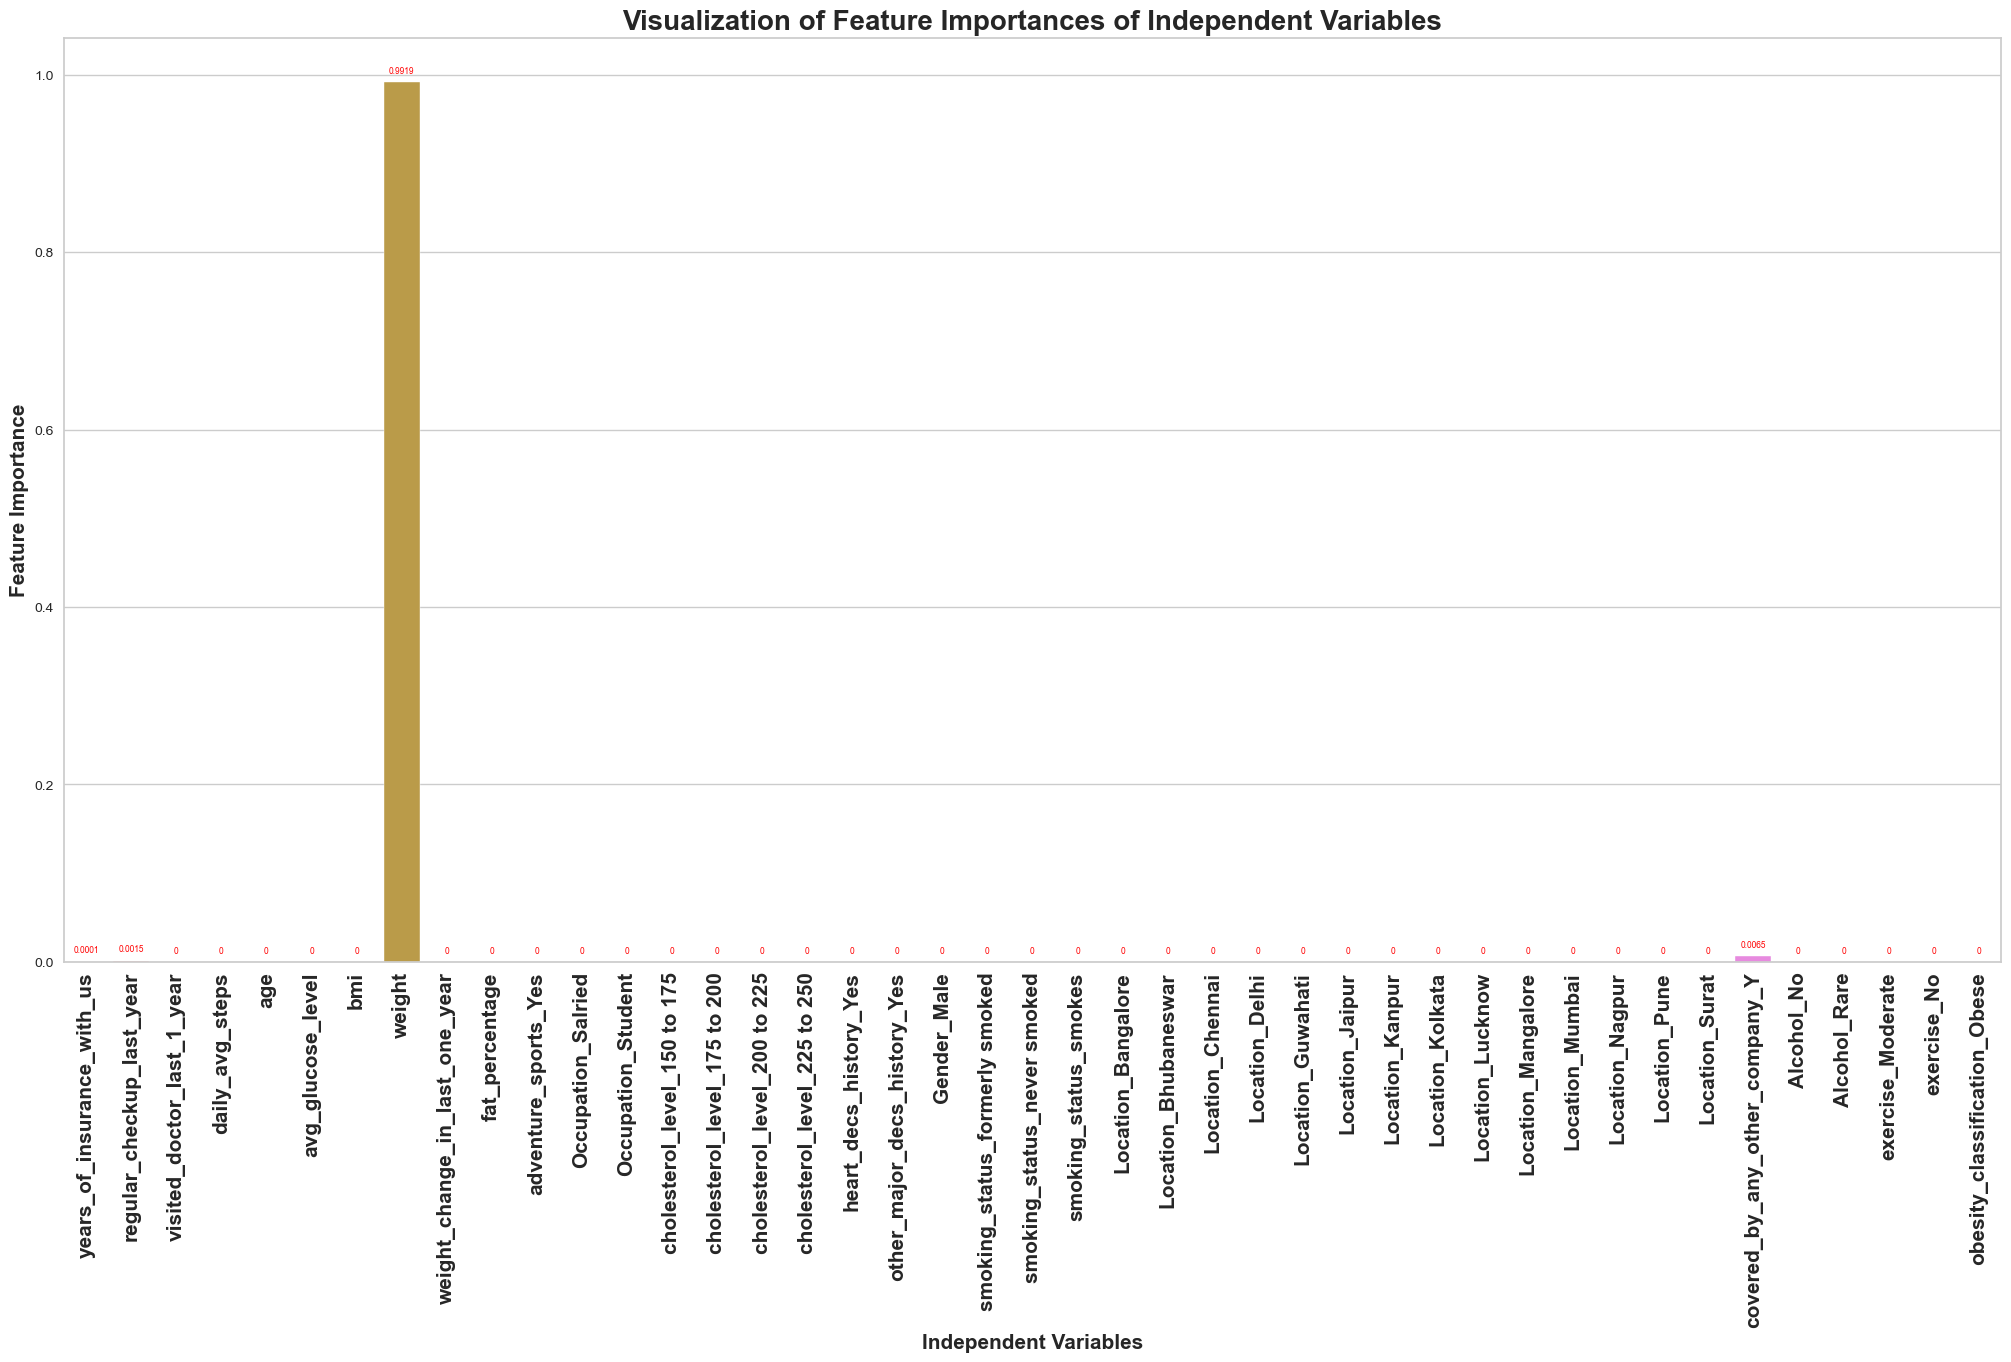

In [141]:
# Visualize the feature importances
plt.figure(figsize=(25, 12))
plt.title("Visualization of Feature Importances of Independent Variables", fontsize=20, weight="bold")
sns.set_style("whitegrid")
ax = sns.barplot(x=ada_reg_importance.index, y='Importance', data=ada_reg_importance)

# Label the axes and rotate the label of the categories so that it is readable
plt.xticks(rotation=90, fontsize=15, weight="bold")
plt.xlabel("Independent Variables", fontsize=15, weight="bold")
plt.ylabel("Feature Importance", fontsize=15, weight="bold")
ax.bar_label(ax.containers[0], label_type='edge', color='red', rotation=0, fontsize=6, padding=5)
plt.show()

In [142]:
# Add it into a dataframe storing all the RMSE and MAPE
Reg_RMSE_ADA = pd.DataFrame({'Train Set R-sqr': [r2_train_nosamp_ADA], 'Test Set R-sqr': [r2_test_nosamp_ADA],'Train Set R-Adj': [adj_r2_train_nosamp_ADA], 'Test Set R-Adj': [adj_r2_test_nosamp_ADA],
                             'Train Set RMSE': [train_ADA_nosamp_rmse], 'Test Set RMSE': [test_ADA_nosamp_rmse],'Train Set MAPE': [train_ADA_nosamp_mape[0]], 'Test Set MAPE': [test_ADA_nosamp_mape[0]]},index=['AdaBoost Regression'])

Reg_RMSE = pd.concat([Reg_RMSE, Reg_RMSE_ADA])
Reg_RMSE.round(4)

,Train Set R-sqr,Test Set R-sqr,Train Set R-Adj,Test Set R-Adj,Train Set RMSE,Test Set RMSE,Train Set MAPE,Test Set MAPE
Linear Regression,0.9450,0.9444,0.9449,0.9441,3361.9686,3369.6461,15.1483,15.5172
Polynomial Regression,0.9522,0.9477,0.9521,0.9474,3133.3756,3269.0469,13.6157,14.3645
Decision Tree Regression,1.0000,0.9081,1.0000,0.9076,0.0000,4331.9786,0.0000,16.1633
XG Boost Regression,0.9771,0.9508,0.9771,0.9505,2168.3358,3168.6030,8.5768,12.6624
Random Forest Regression,0.9933,0.9528,0.9933,0.9525,1175.9821,3105.8911,4.5825,12.2049
Gradient Boosting Regression,0.9565,0.9555,0.9564,0.9553,2990.6918,3013.7010,11.9569,12.1023
AdaBoost Regression,0.9465,0.9468,0.9464,0.9465,3315.3725,3294.6775,15.8996,15.9012


### Bagging Regressor
<a id='Bagging-Regressor'></a>

In [143]:
# Fit a BaggingRegressor
bag_reg = BaggingRegressor(random_state=42)
bag_reg.fit(X_train, Y_train)

BaggingRegressor(random_state=42)

In [144]:
# Predict values for train and test sets
y_train_BAG_pred = bag_reg.predict(X_train)
y_test_BAG_pred = bag_reg.predict(X_test)

In [145]:
# Calculate R-squared for train and test sets
r2_train_nosamp_BAG = r2_score(Y_train, y_train_BAG_pred)
r2_test_nosamp_BAG = r2_score(Y_test, y_test_BAG_pred)

In [146]:
# Calculate Adjusted R-squared for train and test sets
adj_r2_train_nosamp_BAG = 1 - (1-r2_train_nosamp_BAG)*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1)
adj_r2_test_nosamp_BAG = 1 - (1-r2_test_nosamp_BAG)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

In [147]:
# Calculate RMSE values for train and test sets
train_BAG_nosamp_rmse = np.sqrt(mean_squared_error(Y_train, y_train_BAG_pred))
test_BAG_nosamp_rmse = np.sqrt(mean_squared_error(Y_test, y_test_BAG_pred))

In [148]:
# Calculate MAPE for train and test sets
train_BAG_nosamp_mape = np.mean(np.abs((Y_train - y_train_BAG_pred.reshape(-1, 1)) / Y_train)) * 100
test_BAG_nosamp_mape = np.mean(np.abs((Y_test - y_test_BAG_pred.reshape(-1, 1)) / Y_test)) * 100

In [149]:
# Add it into a dataframe storing all the RMSE and MAPE
Reg_RMSE_BAG = pd.DataFrame({'Train Set R-sqr': [r2_train_nosamp_BAG], 'Test Set R-sqr': [r2_test_nosamp_BAG],'Train Set R-Adj': [adj_r2_train_nosamp_BAG], 'Test Set R-Adj': [adj_r2_test_nosamp_BAG],'Train Set RMSE': [train_BAG_nosamp_rmse], 'Test Set RMSE': [test_BAG_nosamp_rmse],
                             'Train Set MAPE': [train_BAG_nosamp_mape[0]], 'Test Set MAPE': [test_BAG_nosamp_mape[0]]},index=['Bagging Regression'])

Reg_RMSE = pd.concat([Reg_RMSE, Reg_RMSE_BAG])
Reg_RMSE.round(4)


,Train Set R-sqr,Test Set R-sqr,Train Set R-Adj,Test Set R-Adj,Train Set RMSE,Test Set RMSE,Train Set MAPE,Test Set MAPE
Linear Regression,0.9450,0.9444,0.9449,0.9441,3361.9686,3369.6461,15.1483,15.5172
Polynomial Regression,0.9522,0.9477,0.9521,0.9474,3133.3756,3269.0469,13.6157,14.3645
Decision Tree Regression,1.0000,0.9081,1.0000,0.9076,0.0000,4331.9786,0.0000,16.1633
XG Boost Regression,0.9771,0.9508,0.9771,0.9505,2168.3358,3168.6030,8.5768,12.6624
Random Forest Regression,0.9933,0.9528,0.9933,0.9525,1175.9821,3105.8911,4.5825,12.2049
Gradient Boosting Regression,0.9565,0.9555,0.9564,0.9553,2990.6918,3013.7010,11.9569,12.1023
AdaBoost Regression,0.9465,0.9468,0.9464,0.9465,3315.3725,3294.6775,15.8996,15.9012
Bagging Regression,0.9908,0.9481,0.9908,0.9478,1376.1181,3253.8515,4.9338,12.7436
